In [1]:
import numpy as np
import random as rd
import tensorflow as tf

from keras.layers import Dense, Embedding, Flatten, Input
from keras.models import Model
from keras.optimizers import Adagrad

#Import another jupyter notebook
import import_ipynb
from Productive_CrossValidation_inclTest import *
from Productive_Data_GetTrainTest import samEval

from gensim.models import Word2Vec

C:\Users\Anja Tetzner\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


importing Jupyter notebook from Productive_CrossValidation_inclTest.ipynb
importing Jupyter notebook from Productive_TimeHistory.ipynb
importing Jupyter notebook from AttentionLayer.ipynb
importing Jupyter notebook from Productive_Data_GetTrainTest.ipynb


In [2]:
#for reproducability of the results
seed = 7
np.random.seed(seed)
tf.set_random_seed(seed)
rd.seed(seed)

In [3]:
path = 'data/'
outputpath ='outputs/03_EmbeddingsOnData_samEval2018/'

In [4]:
#Load necessary data
train_data, train_labels, test_data, test_labels, word_index, MAX_SEQUENCE_LENGTH = samEval()

## Load an restore textdate to create word embeddings from them

In [5]:
def create_restore_text(index_file, data_file, MAXLEN):
   
    loaded_word_index = {}
    with open(index_file, 'r', encoding='utf-8') as word_index: #Decoding utf-8, else exception
        for line in word_index:
            line = line.rstrip().split("\t")
            loaded_word_index[line[0]] = line[1]  
            
    loaded_data =[]
    with open(data_file, 'r', encoding='utf-8') as data: #Decoding utf-8, else exception
        for line in data:
            line = line.rstrip().split('\n')
            loaded_data.append(line) 
            
    recunstructed_data = []
    for line in loaded_data:
        for string in line:
            tweet = []
            string = string.rstrip().split(',')
            for item in string:
                if item is not ('0'):
                    for key, value in loaded_word_index.items():
                        if value == item:
                            tweet.append(key)
            recunstructed_data.append(tweet)
    return recunstructed_data

In [6]:
words_train = create_restore_text('output_trainTestData/SamEval_word_index.csv','output_trainTestData/SamEval_train_data.csv', MAX_SEQUENCE_LENGTH)

In [7]:
words_test = create_restore_text('output_trainTestData/SamEval_word_index.csv','output_trainTestData/SamEval_test_data.csv', MAX_SEQUENCE_LENGTH)

In [8]:
embeddingbasis = words_train

for entry in words_test:
    embeddingbasis.append(entry)

In [9]:
len(embeddingbasis)

4618

## Create embeddings

In [10]:
cbowmodel_50_3= Word2Vec(embeddingbasis, min_count = 1, size = 50, window = 3)

In [11]:
cbowmodel_100_3= Word2Vec(embeddingbasis, min_count = 1, size = 100, window = 3)

In [9]:
cbowmodel_300_3= Word2Vec(embeddingbasis, min_count = 1, size = 300, window = 3)

In [13]:
cbowmodel_50_5= Word2Vec(embeddingbasis, min_count = 1, size = 50, window = 5)

In [30]:
cbowmodel_100_5= Word2Vec(embeddingbasis, min_count = 1, size = 100, window = 5)

In [10]:
cbowmodel_300_5= Word2Vec(embeddingbasis, min_count = 1, size = 300, window = 5)

In [16]:
skipmodel_50_3= Word2Vec(embeddingbasis, min_count = 1, size = 50, window = 3, sg = 1)

In [17]:
skipmodel_100_3= Word2Vec(embeddingbasis, min_count = 1, size = 100, window = 3, sg = 1)

In [11]:
skipmodel_300_3= Word2Vec(embeddingbasis, min_count = 1, size = 300, window = 3, sg = 1)

In [19]:
skipmodel_50_5= Word2Vec(embeddingbasis, min_count = 1, size = 50, window = 5, sg = 1)

In [20]:
skipmodel_100_5= Word2Vec(embeddingbasis, min_count = 1, size = 100, window = 5, sg = 1)

In [12]:
skipmodel_300_5= Word2Vec(embeddingbasis, min_count = 1, size = 300, window = 5, sg = 1)

# Train the model

In [13]:
NUM_EPOCHS = 30
BATCH_SIZE = 64
optimizer = Adagrad(lr=0.001)
lossfunction = 'binary_crossentropy'
softmax = True

## CBOW Dim 50, window 3

In [23]:
EMBEDDING_DIM=50

word_vectors_1 = cbowmodel_50_3.wv

embedding_matrix_1 = np.zeros((len(word_index)+1, EMBEDDING_DIM))

for word, i in word_index.items():
    try:
        embedding_vector = word_vectors_1[word]
        embedding_matrix_1[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

In [24]:
wv_layer = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix_1],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)
#Input Layer
comment_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float32')

#Embedding Layer
embedded_sequences = wv_layer(comment_input)

#First Dense Layer
x = Dense(600, activation='relu')(embedded_sequences)

x = Flatten()(x)

#Output (Dense) Layer
preds = Dense(2, activation='softmax')(x)

# build the model
model = Model(inputs=[comment_input], outputs=preds)


-----Fold 1--------


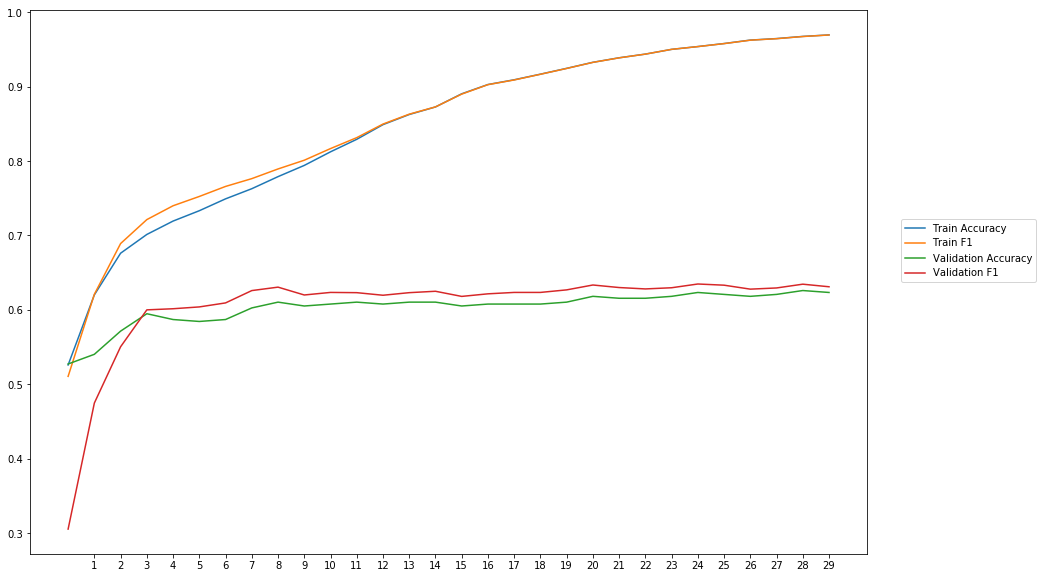

Average Accuracy: 60.32%
Average Precision: 59.73%
Average Recall: 62.15%
Average F1: 60.54%

-----Fold 2--------


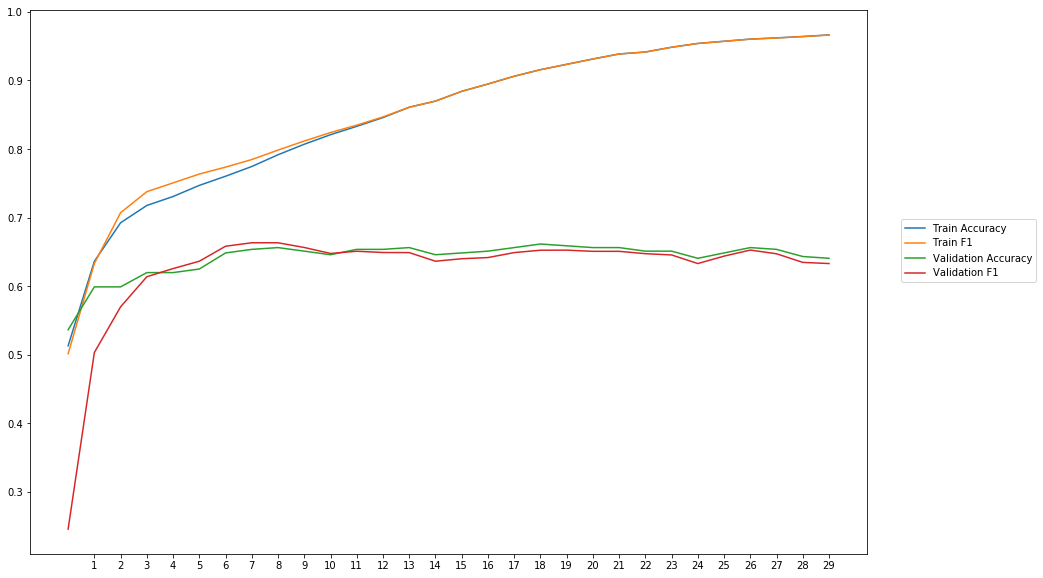

Average Accuracy: 64.12%
Average Precision: 64.65%
Average Recall: 61.57%
Average F1: 62.48%

-----Fold 3--------


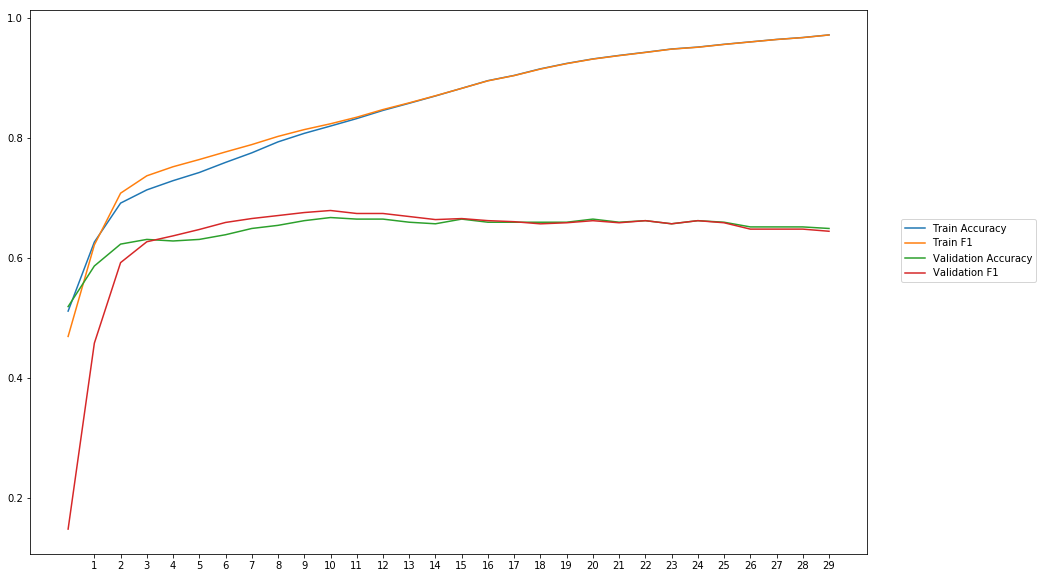

Average Accuracy: 64.63%
Average Precision: 64.63%
Average Recall: 63.63%
Average F1: 63.25%

-----Fold 4--------


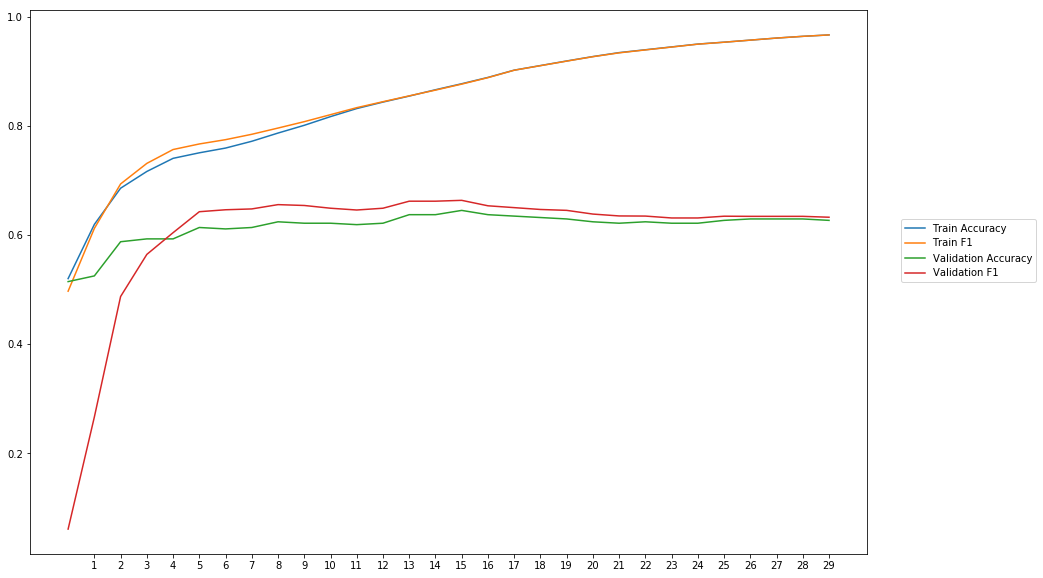

Average Accuracy: 61.54%
Average Precision: 61.98%
Average Recall: 62.50%
Average F1: 60.30%

-----Fold 5--------


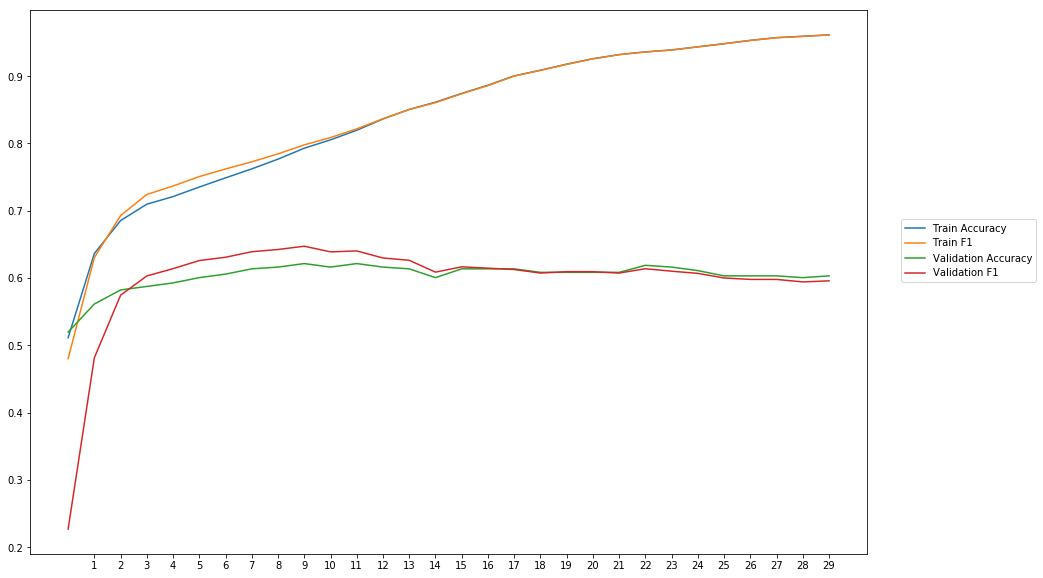

Average Accuracy: 60.34%
Average Precision: 60.12%
Average Recall: 60.51%
Average F1: 59.74%

-----Fold 6--------


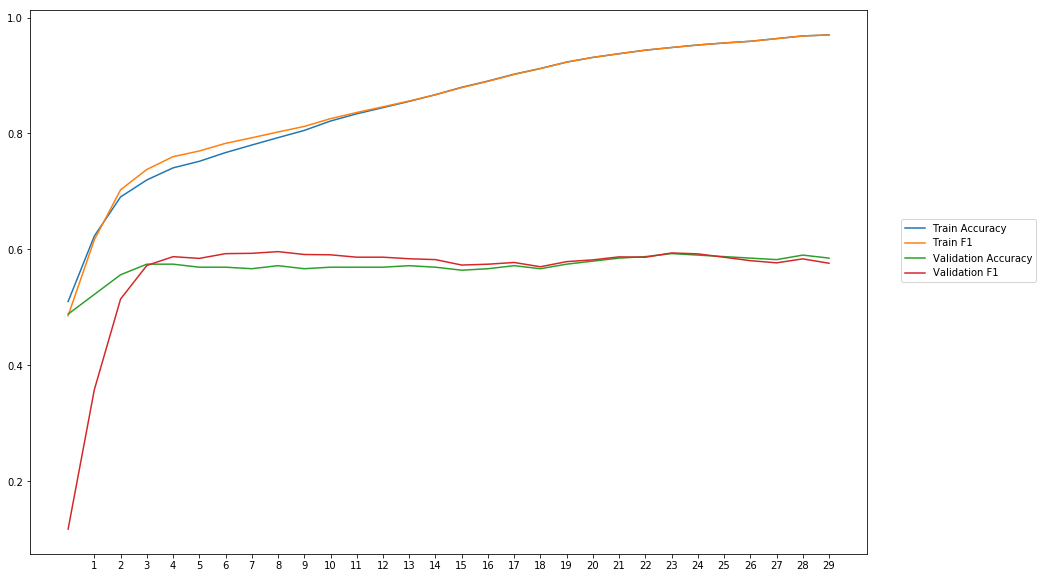

Average Accuracy: 57.05%
Average Precision: 56.58%
Average Recall: 56.40%
Average F1: 55.84%

-----Fold 7--------


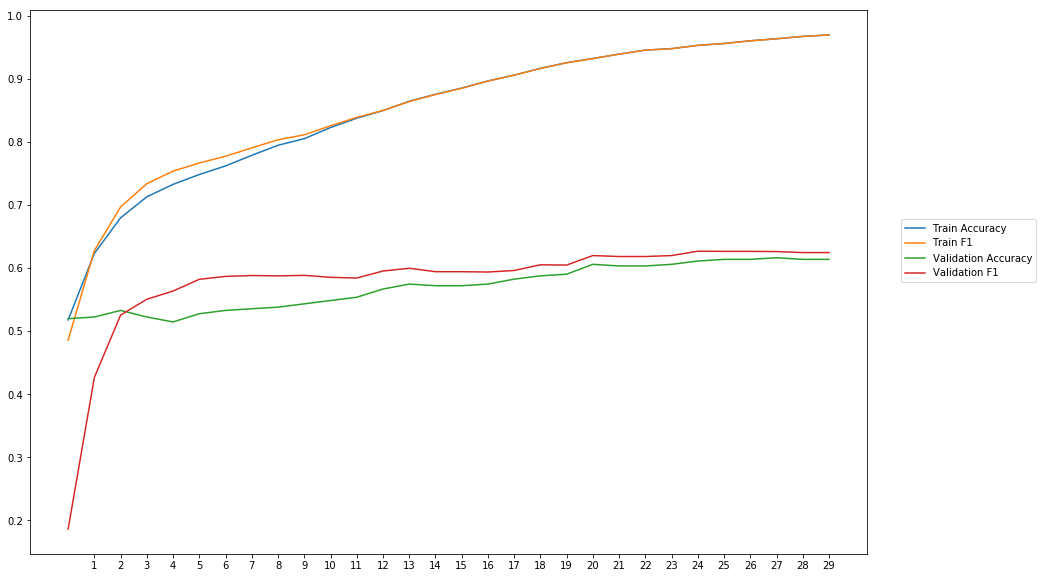

Average Accuracy: 57.02%
Average Precision: 56.60%
Average Recall: 60.89%
Average F1: 57.88%

-----Fold 8--------


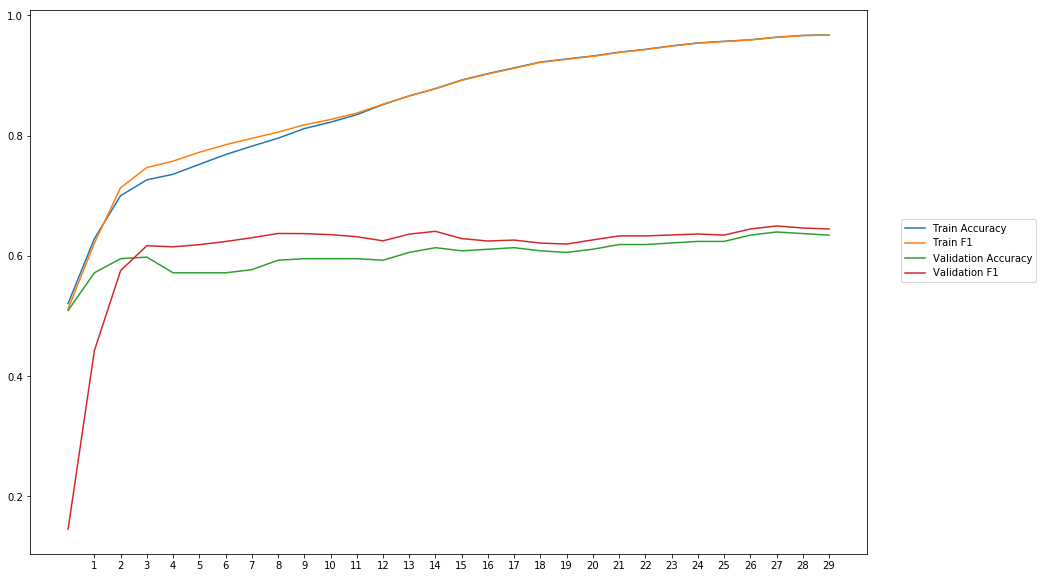

Average Accuracy: 60.23%
Average Precision: 59.47%
Average Recall: 64.00%
Average F1: 60.72%

-----Fold 9--------


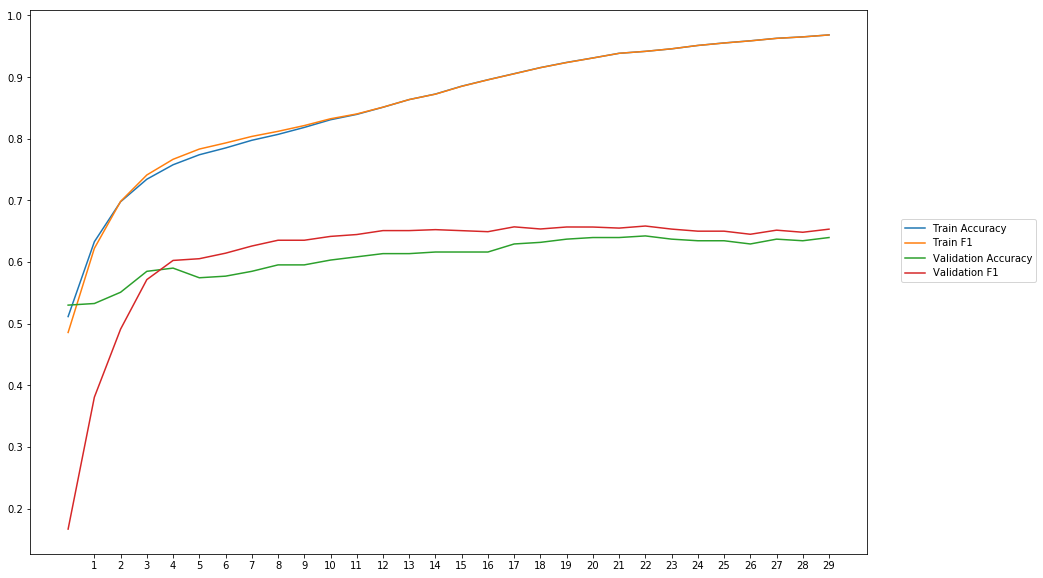

Average Accuracy: 60.90%
Average Precision: 60.33%
Average Recall: 64.62%
Average F1: 61.19%

-----Fold 10--------


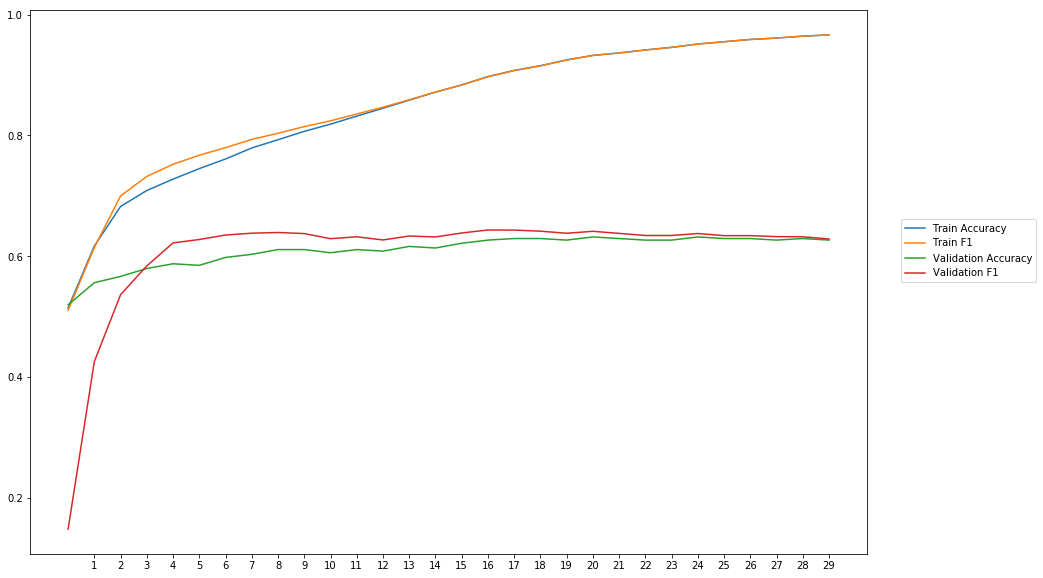

Average Accuracy: 60.97%
Average Precision: 60.64%
Average Recall: 62.69%
Average F1: 60.66%

-------Overallresults-------


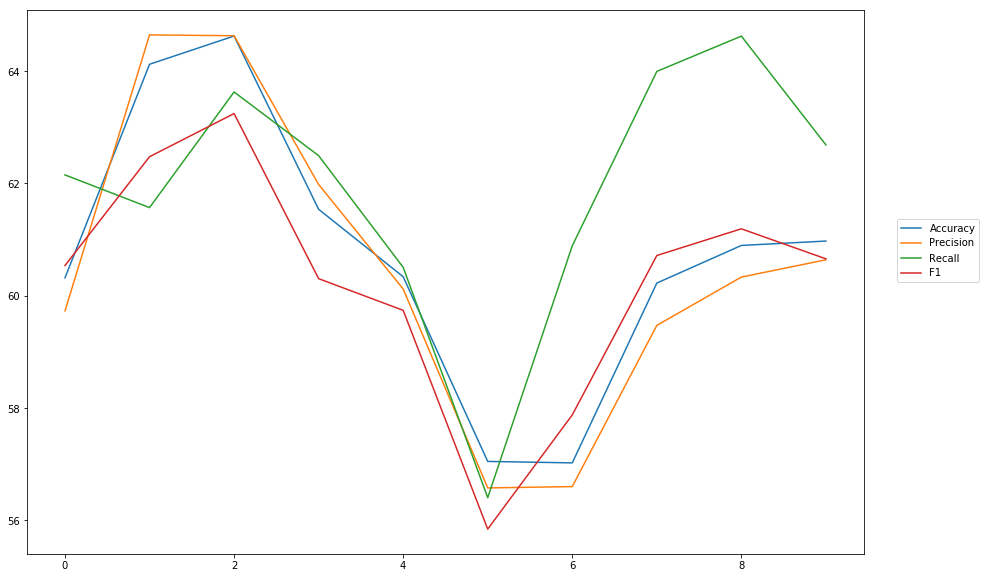

Accuracy: Mean = 60.71% (+/- 2.35%), Max = 64.63%, Min =  57.02%
Precision: Mean = 60.47% (+/- 2.62%), Max = 64.65%, Min =  56.58%
Recall: Mean = 61.90% (+/- 2.22%), Max = 64.62%, Min =  56.40%
F1: Mean = 60.26% (+/- 2.01%), Max = 63.25%, Min =  55.84%


In [25]:
cross_val(model, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'EmbeddingOnData')

## CBOW Dim 100, window 3

In [26]:
EMBEDDING_DIM=100

word_vectors_2 = cbowmodel_100_3.wv

embedding_matrix_2 = np.zeros((len(word_index)+1, EMBEDDING_DIM))

for word, i in word_index.items():
    try:
        embedding_vector = word_vectors_2[word]
        embedding_matrix_2[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

In [27]:
wv_layer_2 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix_2],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)
#Input Layer
comment_input_2 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float32')

#Embedding Layer
embedded_sequences_2 = wv_layer_2(comment_input_2)

#First Dense Layer
x_2 = Dense(600, activation='relu')(embedded_sequences_2)

x_2 = Flatten()(x_2)

#Output (Dense) Layer
preds_2 = Dense(2, activation='softmax')(x_2)

# build the model
model_2 = Model(inputs=[comment_input_2], outputs=preds_2)


-----Fold 1--------


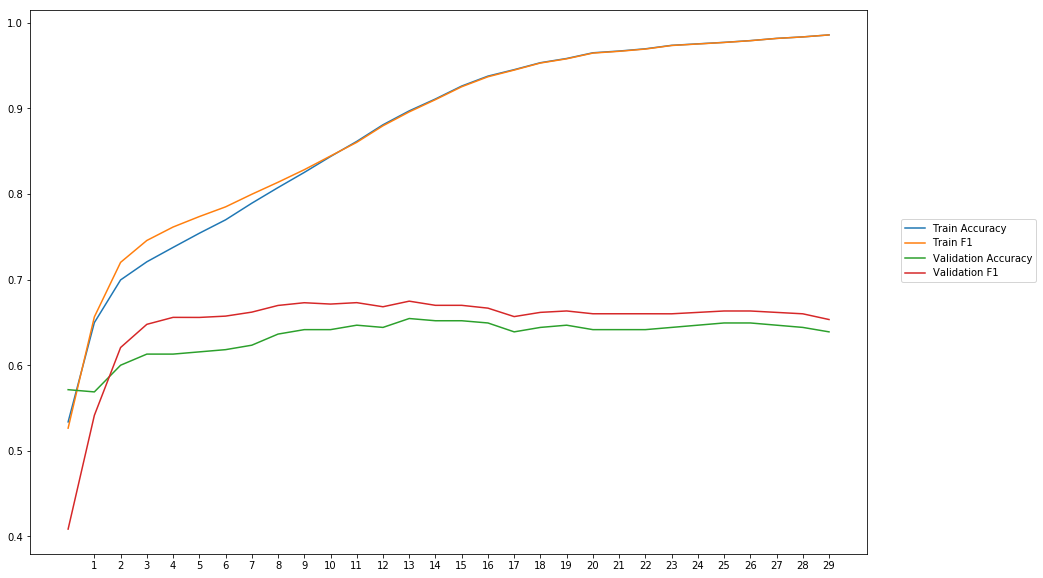

Average Accuracy: 63.39%
Average Precision: 62.06%
Average Recall: 68.82%
Average F1: 64.91%

-----Fold 2--------


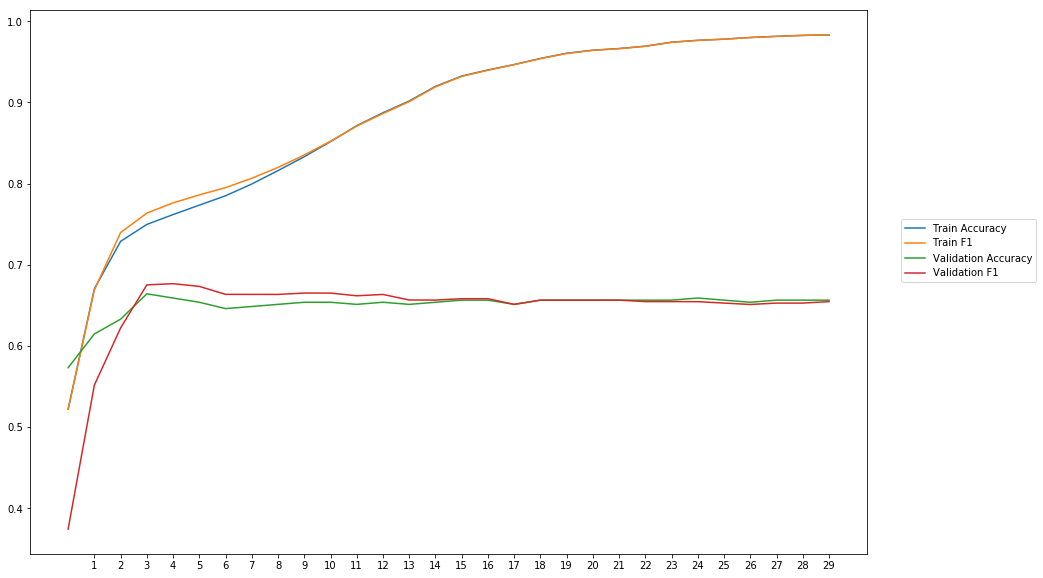

Average Accuracy: 64.99%
Average Precision: 64.89%
Average Recall: 64.96%
Average F1: 64.50%

-----Fold 3--------


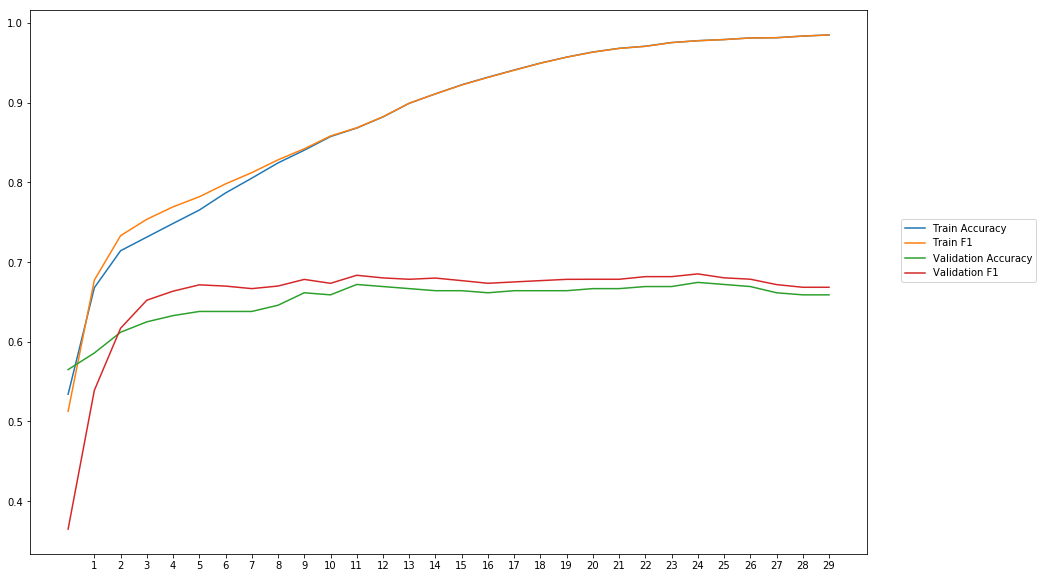

Average Accuracy: 65.19%
Average Precision: 64.10%
Average Recall: 68.53%
Average F1: 65.80%

-----Fold 4--------


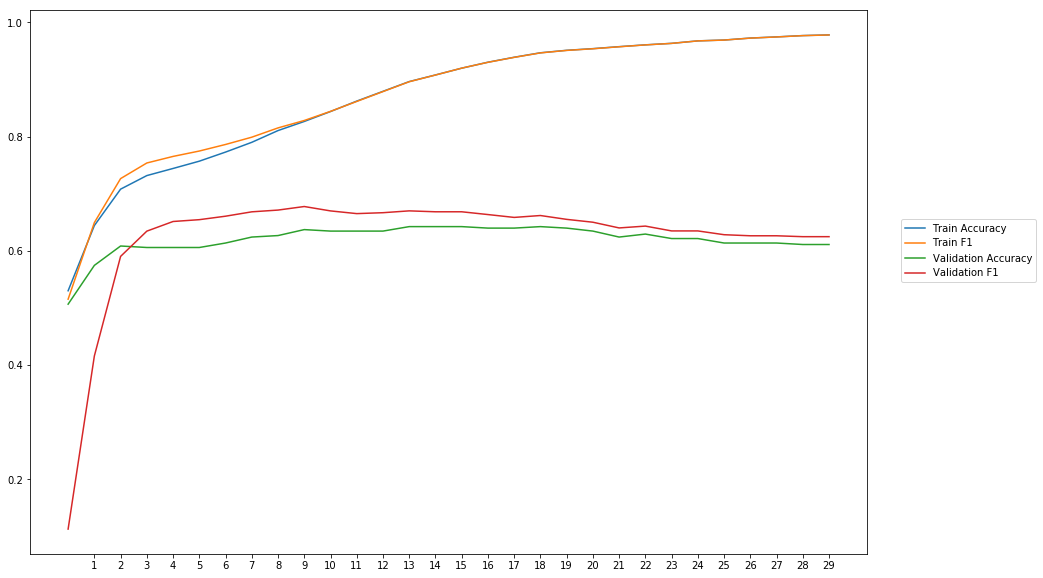

Average Accuracy: 61.98%
Average Precision: 60.85%
Average Recall: 66.37%
Average F1: 62.39%

-----Fold 5--------


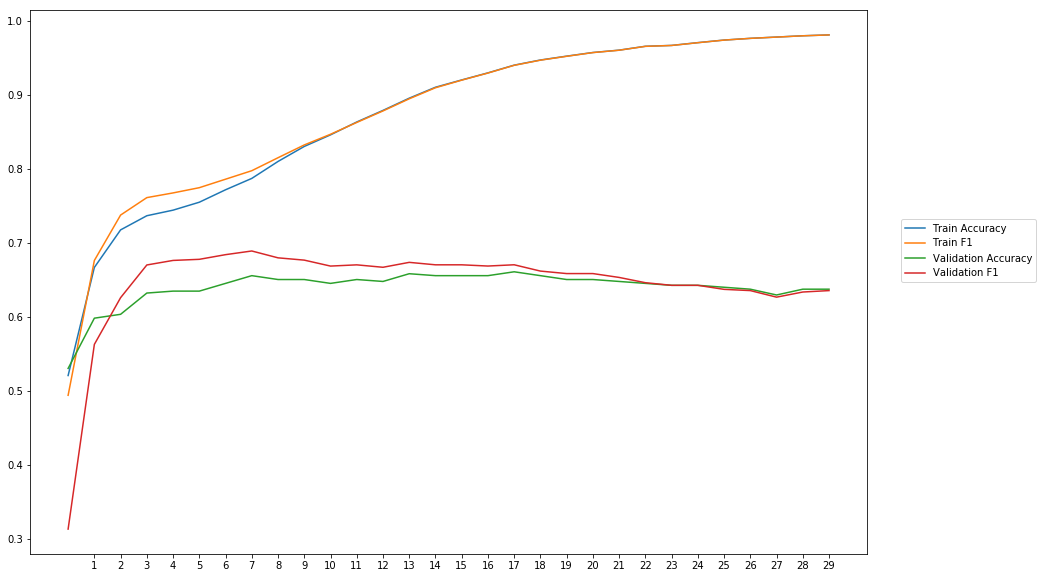

Average Accuracy: 63.91%
Average Precision: 62.93%
Average Recall: 67.02%
Average F1: 64.46%

-----Fold 6--------


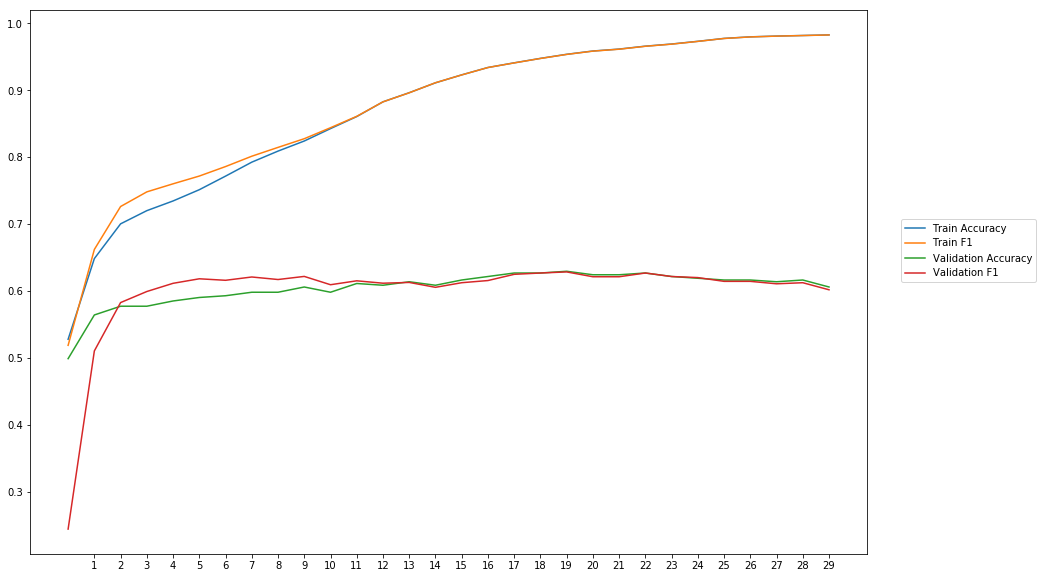

Average Accuracy: 60.43%
Average Precision: 60.13%
Average Recall: 60.33%
Average F1: 59.88%

-----Fold 7--------


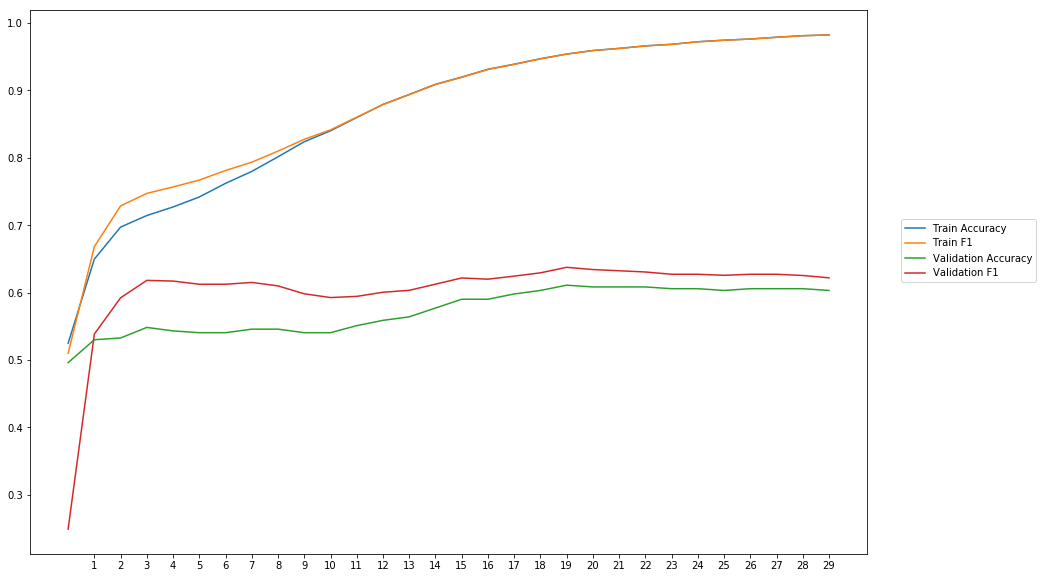

Average Accuracy: 57.35%
Average Precision: 56.15%
Average Recall: 66.07%
Average F1: 60.26%

-----Fold 8--------


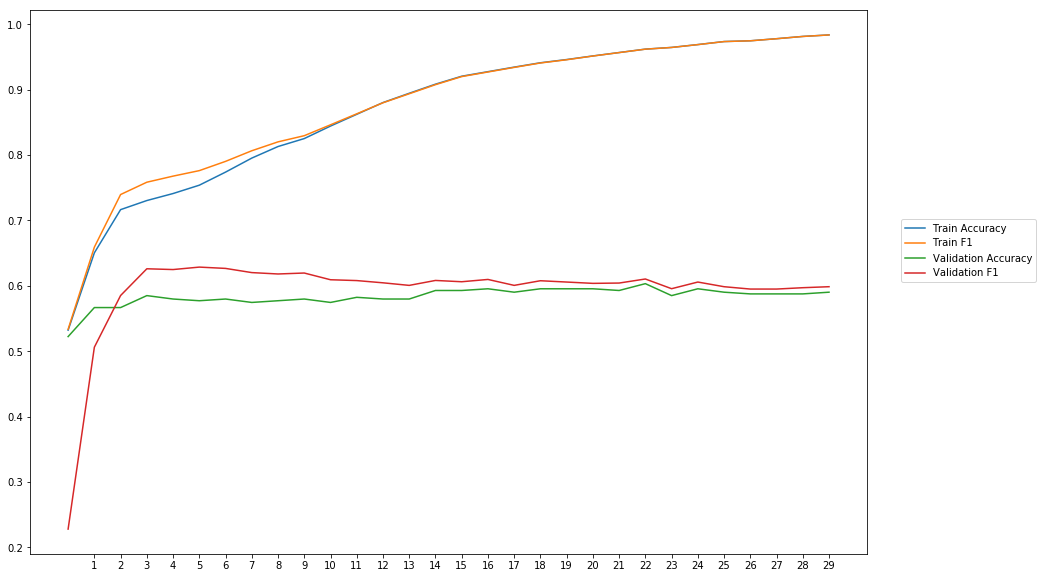

Average Accuracy: 58.33%
Average Precision: 57.75%
Average Recall: 61.99%
Average F1: 59.14%

-----Fold 9--------


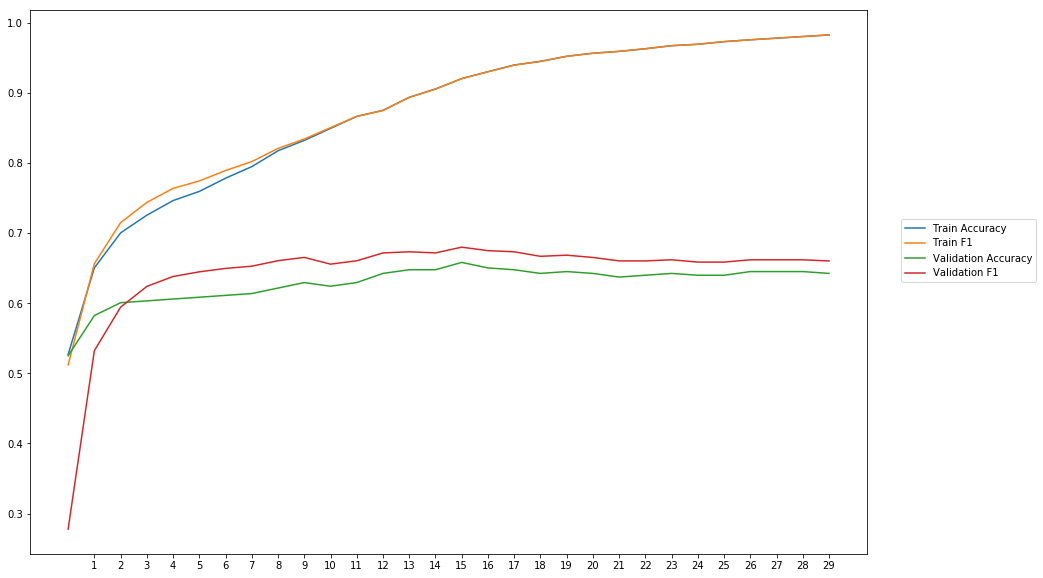

Average Accuracy: 62.84%
Average Precision: 61.39%
Average Recall: 68.27%
Average F1: 64.14%

-----Fold 10--------


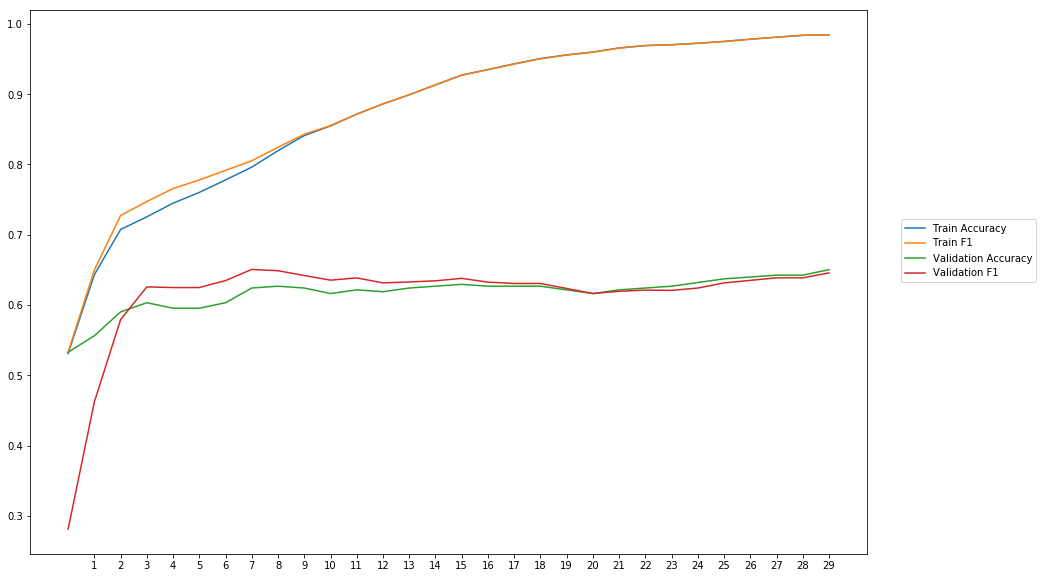

Average Accuracy: 61.73%
Average Precision: 61.54%
Average Recall: 62.13%
Average F1: 61.30%

-------Overallresults-------


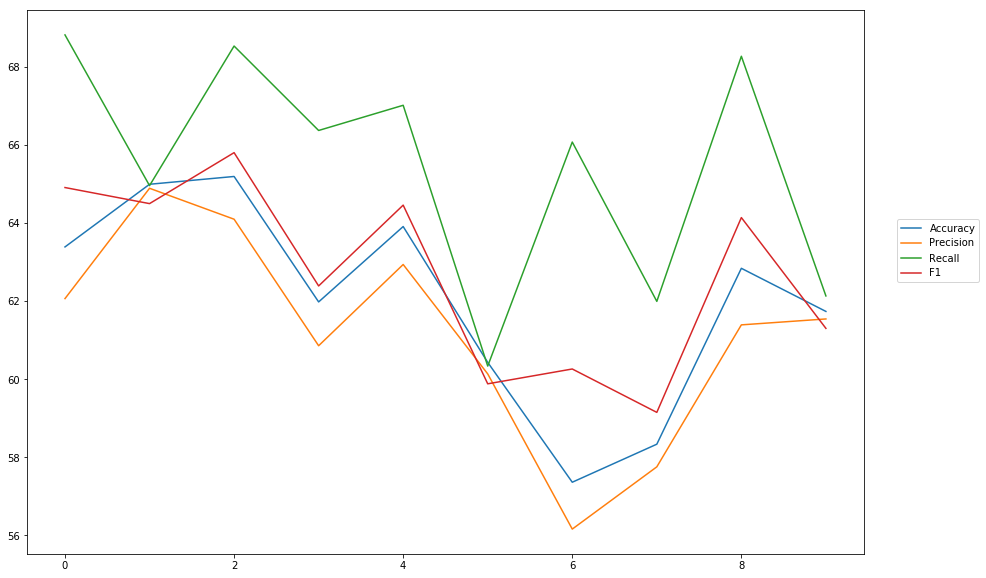

Accuracy: Mean = 62.01% (+/- 2.51%), Max = 65.19%, Min =  57.35%
Precision: Mean = 61.18% (+/- 2.54%), Max = 64.89%, Min =  56.15%
Recall: Mean = 65.45% (+/- 2.86%), Max = 68.82%, Min =  60.33%
F1: Mean = 62.68% (+/- 2.27%), Max = 65.80%, Min =  59.14%


In [28]:
cross_val(model_2, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'EmbeddingOnData_CBWO_100_3')

## CBOW Dim 300, window 3

In [14]:
EMBEDDING_DIM=300

word_vectors_3 = cbowmodel_300_3.wv

embedding_matrix_3 = np.zeros((len(word_index)+1, EMBEDDING_DIM))

for word, i in word_index.items():
    try:
        embedding_vector = word_vectors_3[word]
        embedding_matrix_3[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

In [15]:
wv_layer_3 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix_3],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)
#Input Layer
comment_input_3 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float32')

#Embedding Layer
embedded_sequences_3 = wv_layer_3(comment_input_3)

#First Dense Layer
x_3 = Dense(600, activation='relu')(embedded_sequences_3)

x_3 = Flatten()(x_3)

#Output (Dense) Layer
preds_3 = Dense(2, activation='softmax')(x_3)

# build the model
model_3 = Model(inputs=[comment_input_3], outputs=preds_3)


-----Fold 1--------


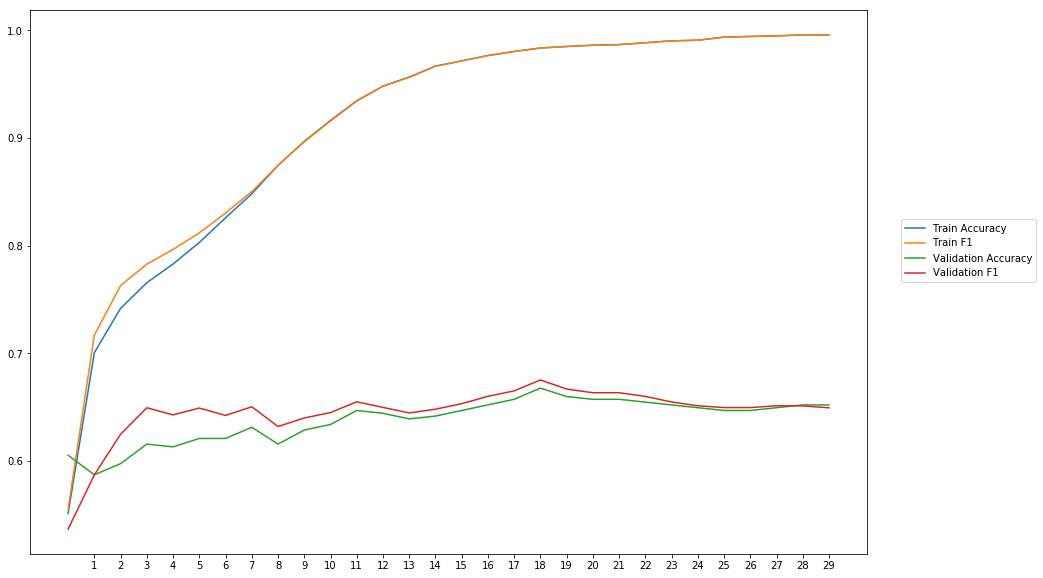

Average Accuracy: 63.80%
Average Precision: 63.16%
Average Recall: 66.18%
Average F1: 64.52%

-----Fold 2--------


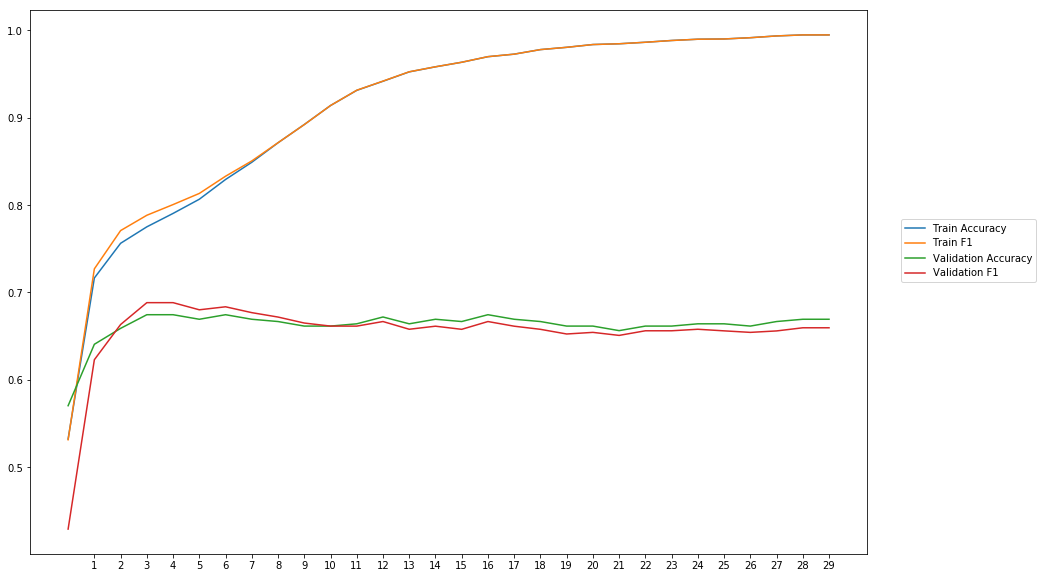

Average Accuracy: 66.22%
Average Precision: 66.38%
Average Recall: 64.92%
Average F1: 65.45%

-----Fold 3--------


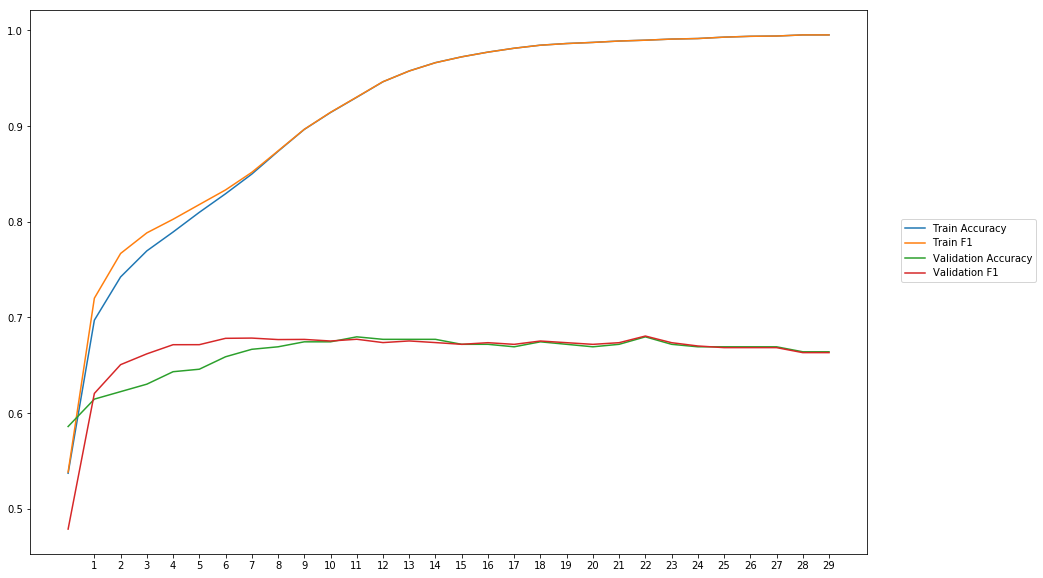

Average Accuracy: 66.18%
Average Precision: 65.64%
Average Recall: 67.45%
Average F1: 66.36%

-----Fold 4--------


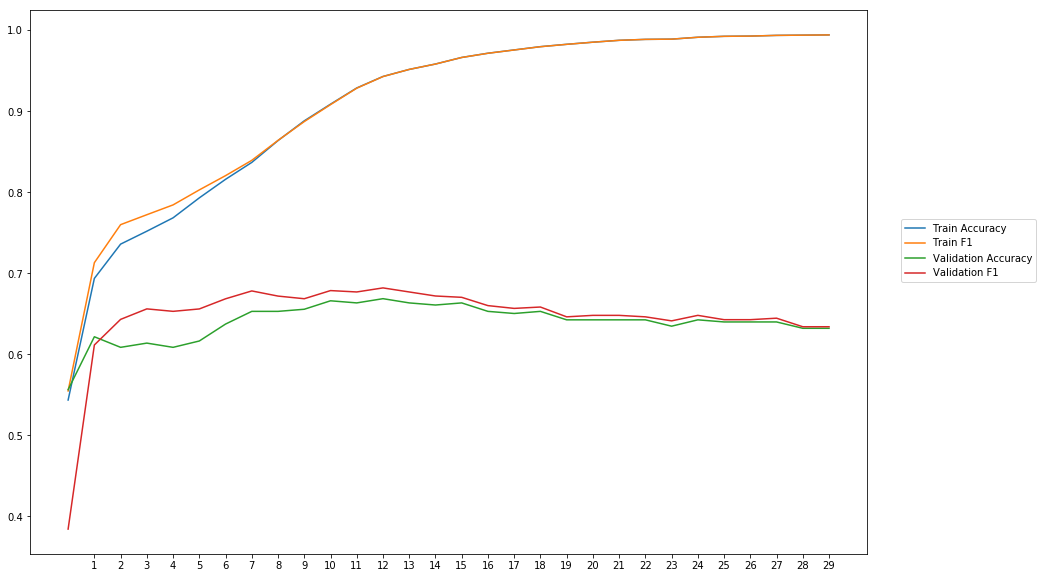

Average Accuracy: 63.97%
Average Precision: 63.17%
Average Recall: 66.89%
Average F1: 64.64%

-----Fold 5--------


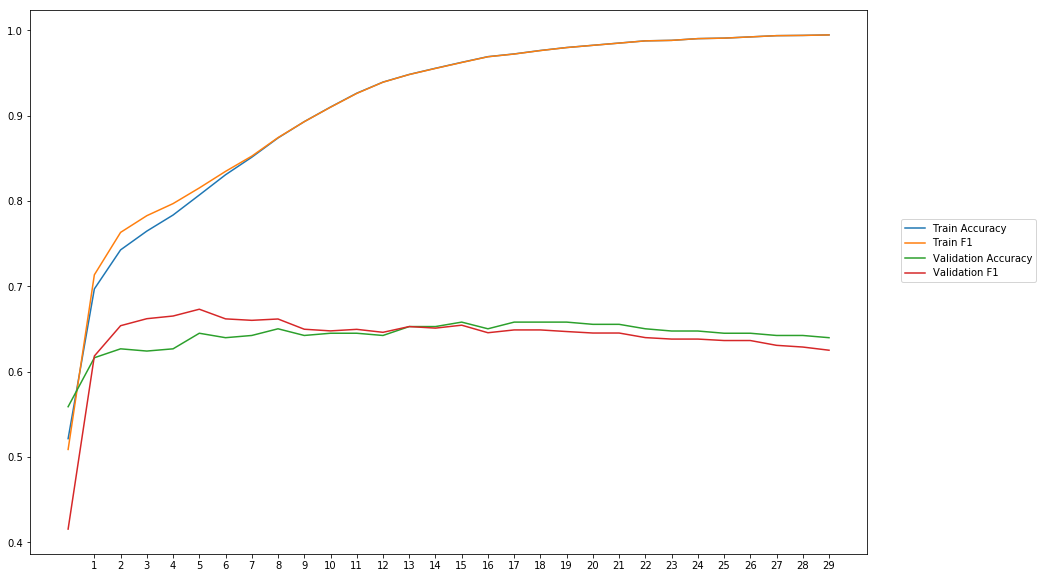

Average Accuracy: 64.20%
Average Precision: 64.18%
Average Recall: 64.21%
Average F1: 63.92%

-----Fold 6--------


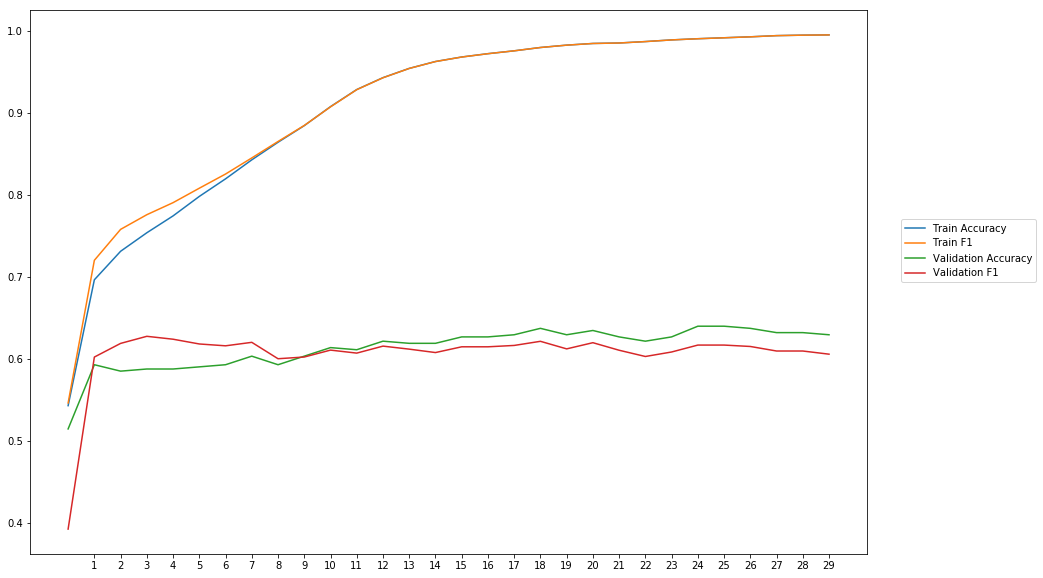

Average Accuracy: 61.33%
Average Precision: 61.69%
Average Recall: 59.88%
Average F1: 60.55%

-----Fold 7--------


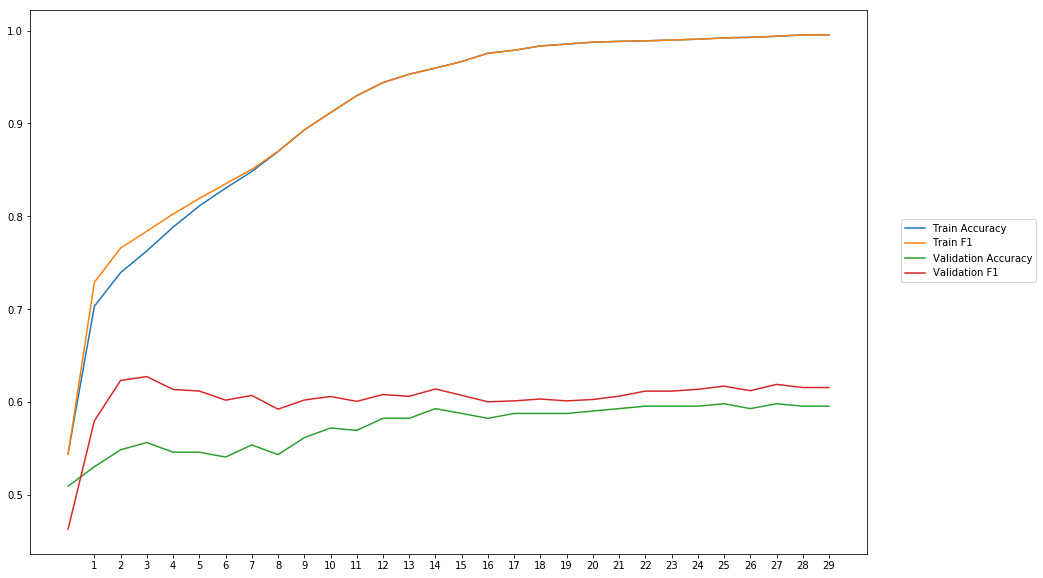

Average Accuracy: 57.37%
Average Precision: 56.39%
Average Recall: 65.13%
Average F1: 60.30%

-----Fold 8--------


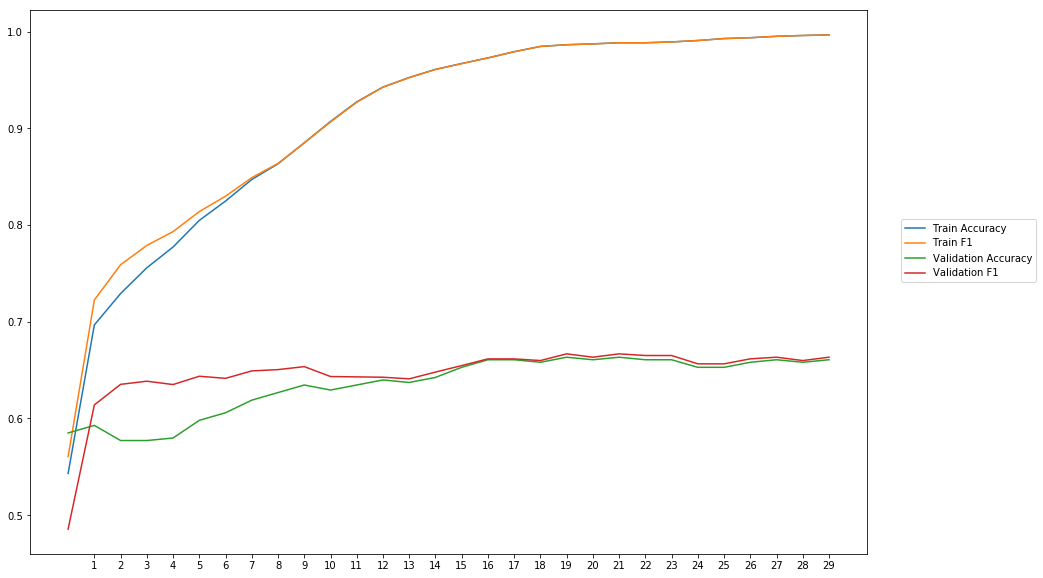

Average Accuracy: 63.53%
Average Precision: 62.85%
Average Recall: 67.03%
Average F1: 64.62%

-----Fold 9--------


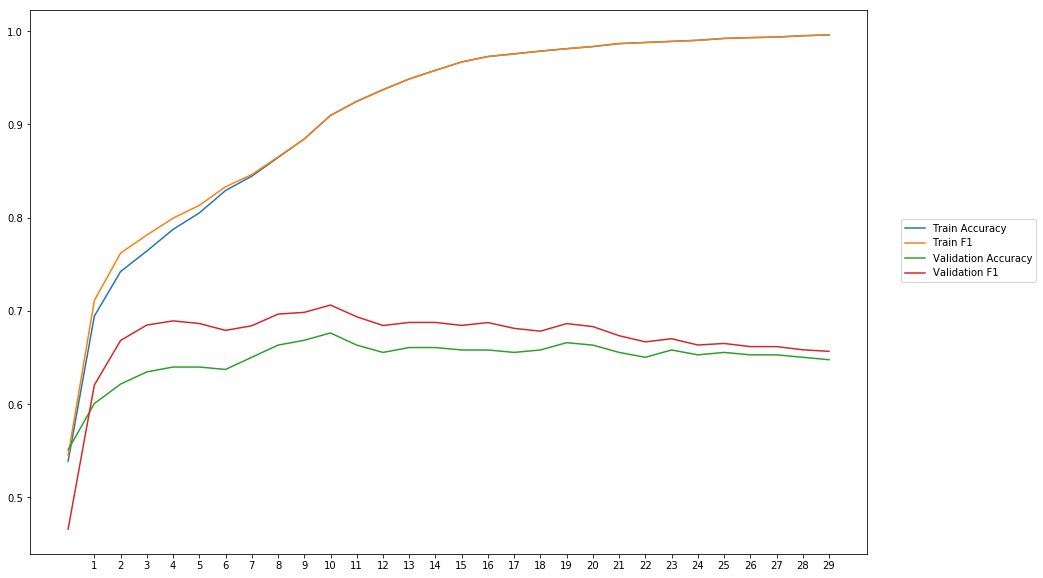

Average Accuracy: 64.85%
Average Precision: 62.83%
Average Recall: 72.25%
Average F1: 67.03%

-----Fold 10--------


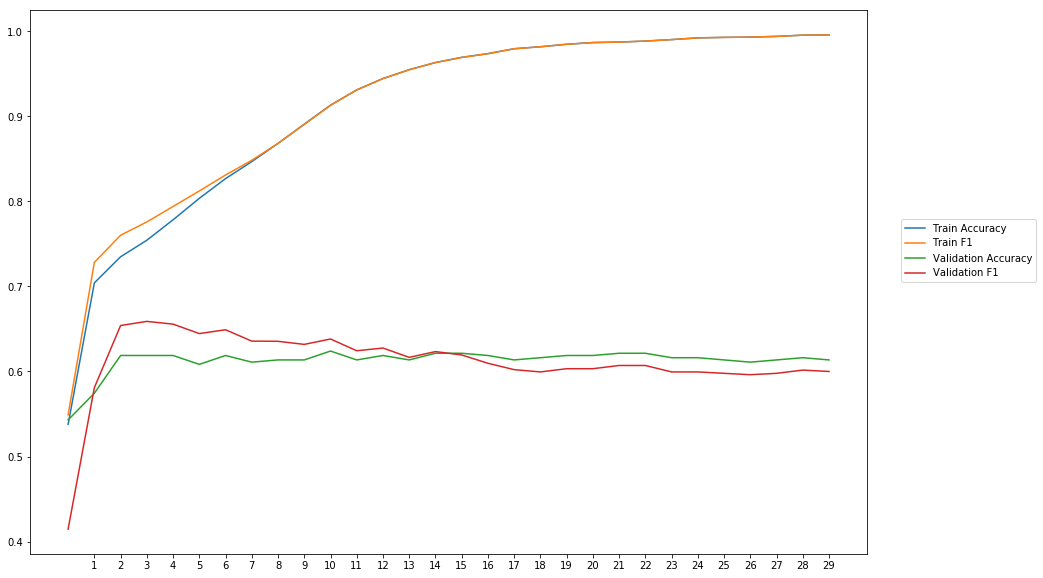

Average Accuracy: 61.27%
Average Precision: 61.12%
Average Recall: 61.68%
Average F1: 61.12%

-------Overallresults-------


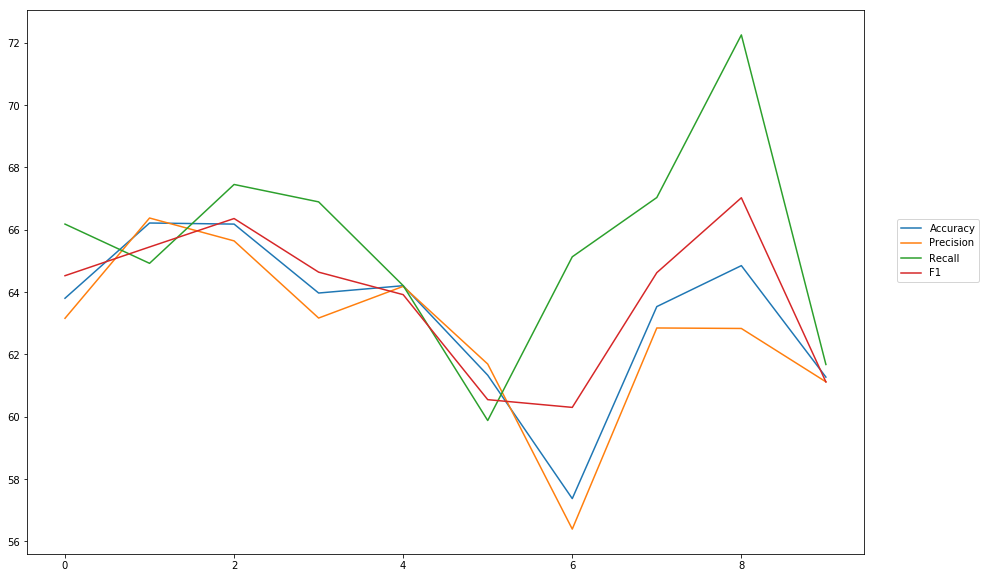

Accuracy: Mean = 63.27% (+/- 2.53%), Max = 66.22%, Min =  57.37%
Precision: Mean = 62.74% (+/- 2.61%), Max = 66.38%, Min =  56.39%
Recall: Mean = 65.56% (+/- 3.20%), Max = 72.25%, Min =  59.88%
F1: Mean = 63.85% (+/- 2.27%), Max = 67.03%, Min =  60.30%


In [31]:
cross_val(model_3, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'EmbeddingOnData_CBWO_300_3')

### CBOW Dim 50, window 5

In [32]:
EMBEDDING_DIM=50

word_vectors_4 = cbowmodel_50_5.wv

embedding_matrix_4 = np.zeros((len(word_index)+1, EMBEDDING_DIM))

for word, i in word_index.items():
    try:
        embedding_vector = word_vectors_4[word]
        embedding_matrix_4[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

In [33]:
wv_layer_4 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix_4],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)
#Input Layer
comment_input_4 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float32')

#Embedding Layer
embedded_sequences_4 = wv_layer_4(comment_input_4)

#First Dense Layer
x_4 = Dense(600, activation='relu')(embedded_sequences_4)

x_4 = Flatten()(x_4)

#Output (Dense) Layer
preds_4 = Dense(2, activation='softmax')(x_4)

# build the model
model_4 = Model(inputs=[comment_input_4], outputs=preds_4)


-----Fold 1--------


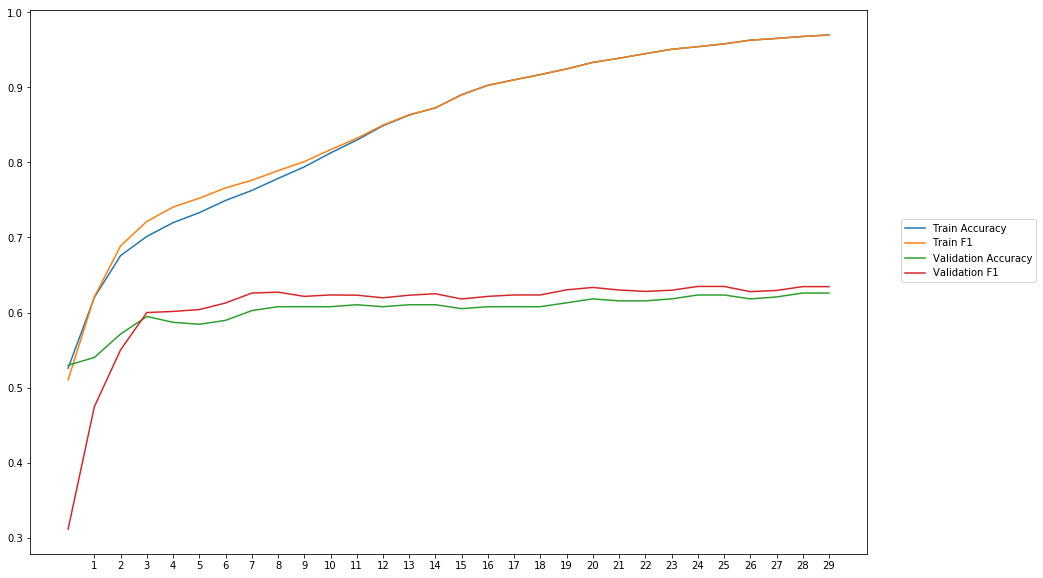

Average Accuracy: 60.36%
Average Precision: 59.78%
Average Recall: 62.20%
Average F1: 60.59%

-----Fold 2--------


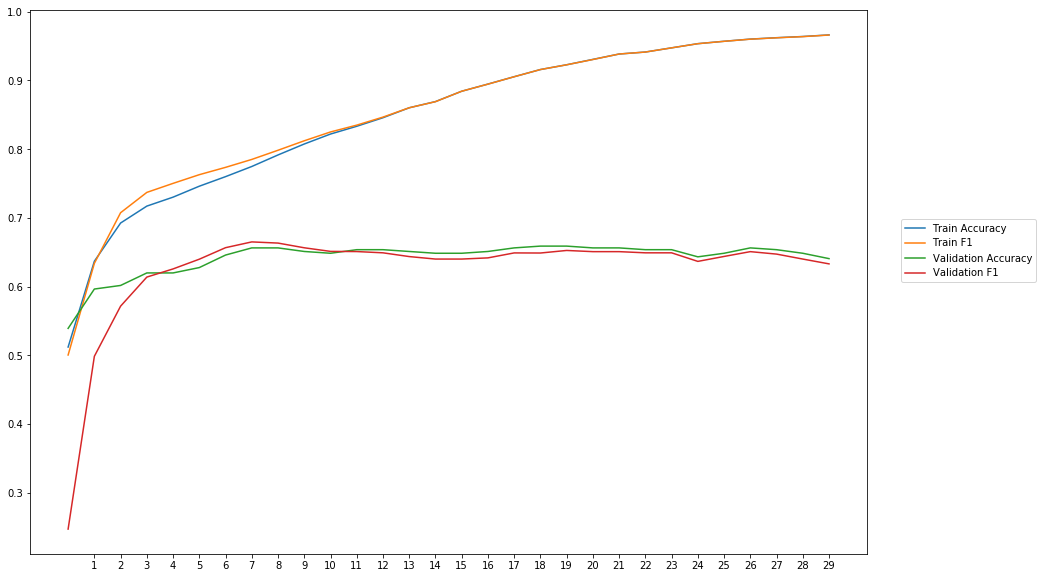

Average Accuracy: 64.18%
Average Precision: 64.74%
Average Recall: 61.61%
Average F1: 62.52%

-----Fold 3--------


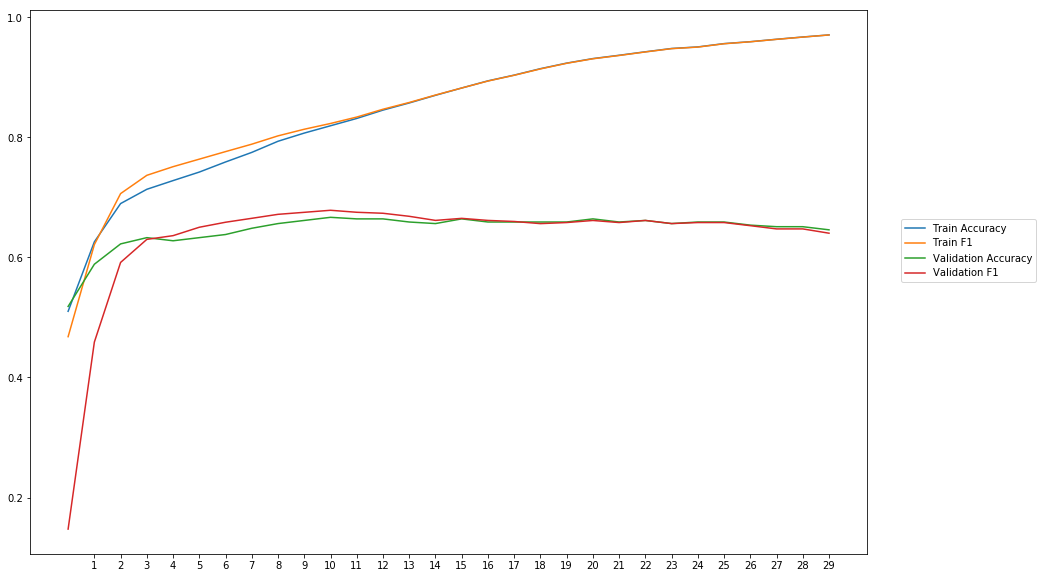

Average Accuracy: 64.65%
Average Precision: 64.67%
Average Recall: 63.66%
Average F1: 63.27%

-----Fold 4--------


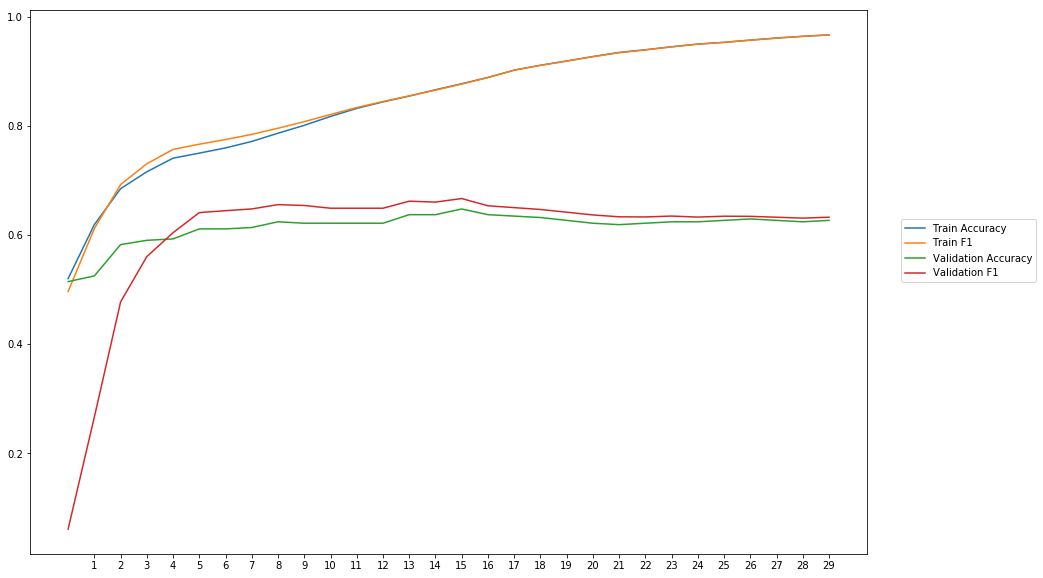

Average Accuracy: 61.48%
Average Precision: 61.91%
Average Recall: 62.44%
Average F1: 60.24%

-----Fold 5--------


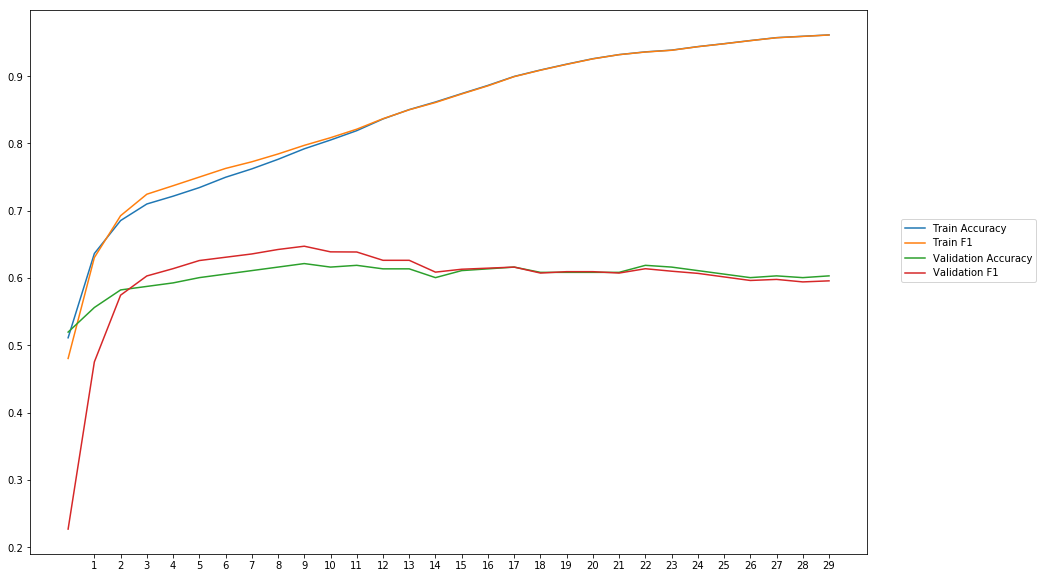

Average Accuracy: 60.30%
Average Precision: 60.07%
Average Recall: 60.45%
Average F1: 59.69%

-----Fold 6--------


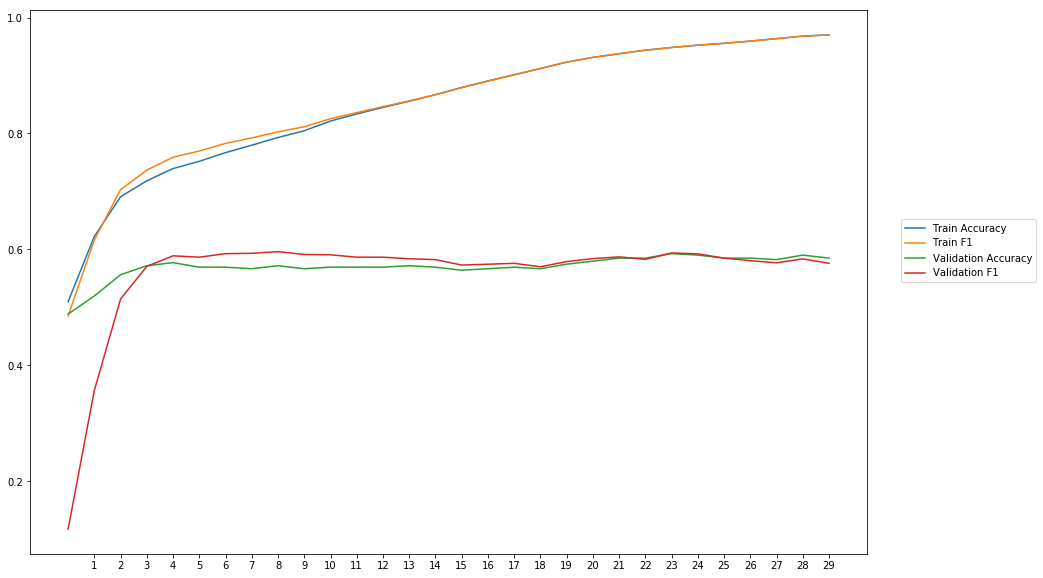

Average Accuracy: 57.01%
Average Precision: 56.53%
Average Recall: 56.42%
Average F1: 55.83%

-----Fold 7--------


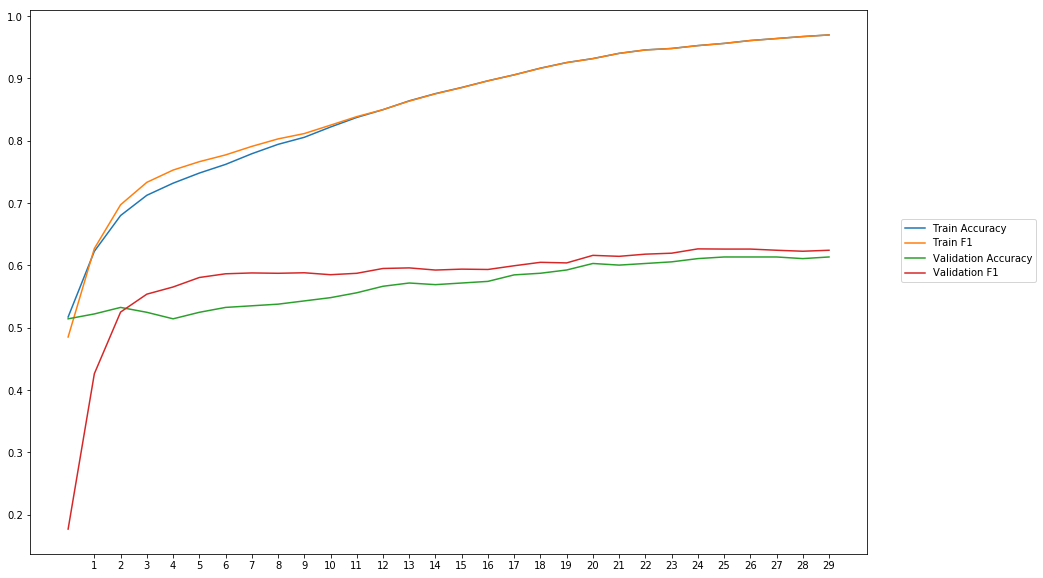

Average Accuracy: 56.98%
Average Precision: 56.48%
Average Recall: 60.87%
Average F1: 57.83%

-----Fold 8--------


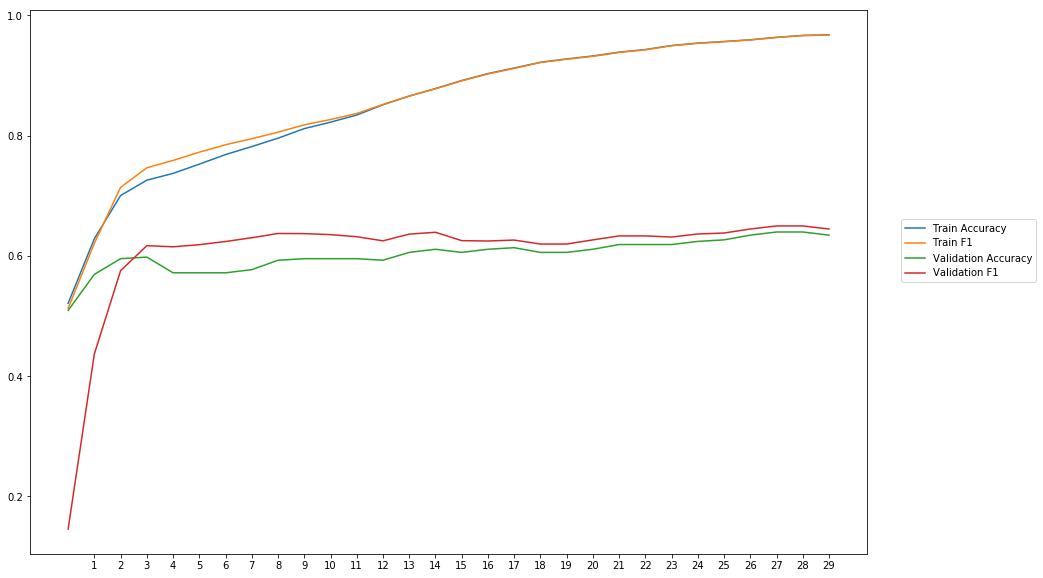

Average Accuracy: 60.20%
Average Precision: 59.44%
Average Recall: 63.98%
Average F1: 60.69%

-----Fold 9--------


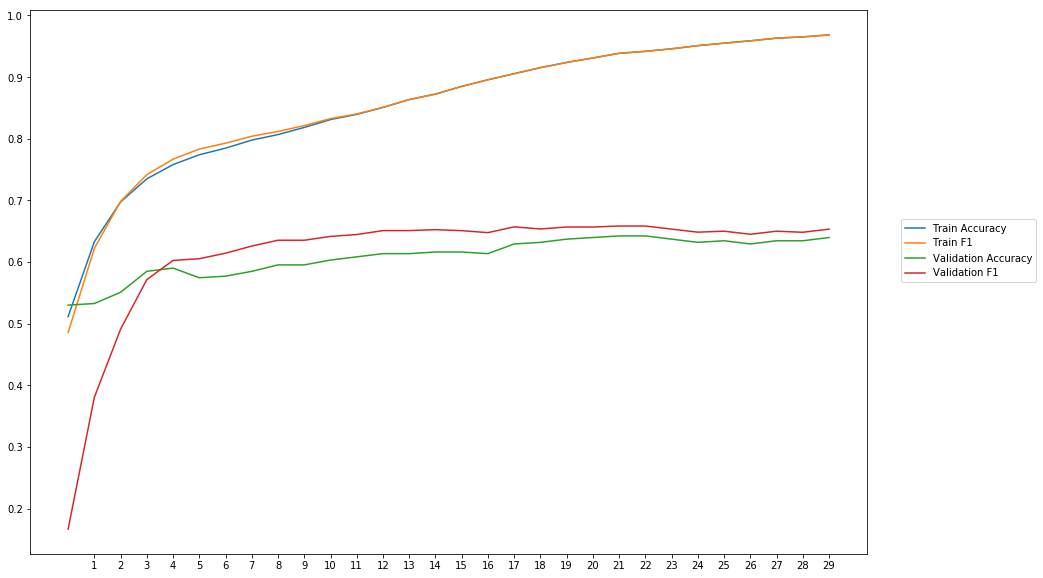

Average Accuracy: 60.88%
Average Precision: 60.31%
Average Recall: 64.64%
Average F1: 61.19%

-----Fold 10--------


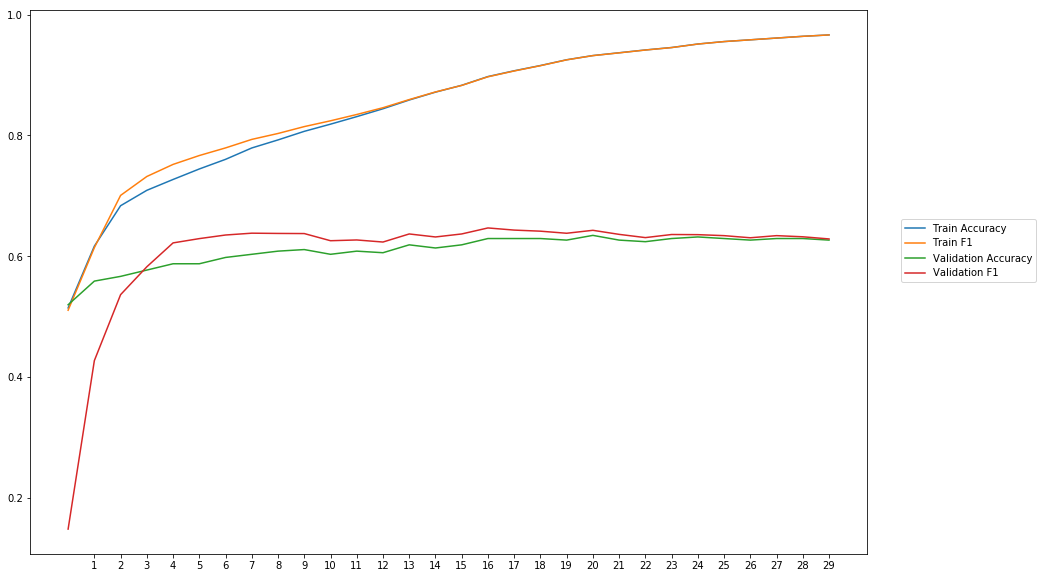

Average Accuracy: 60.96%
Average Precision: 60.65%
Average Recall: 62.60%
Average F1: 60.62%

-------Overallresults-------


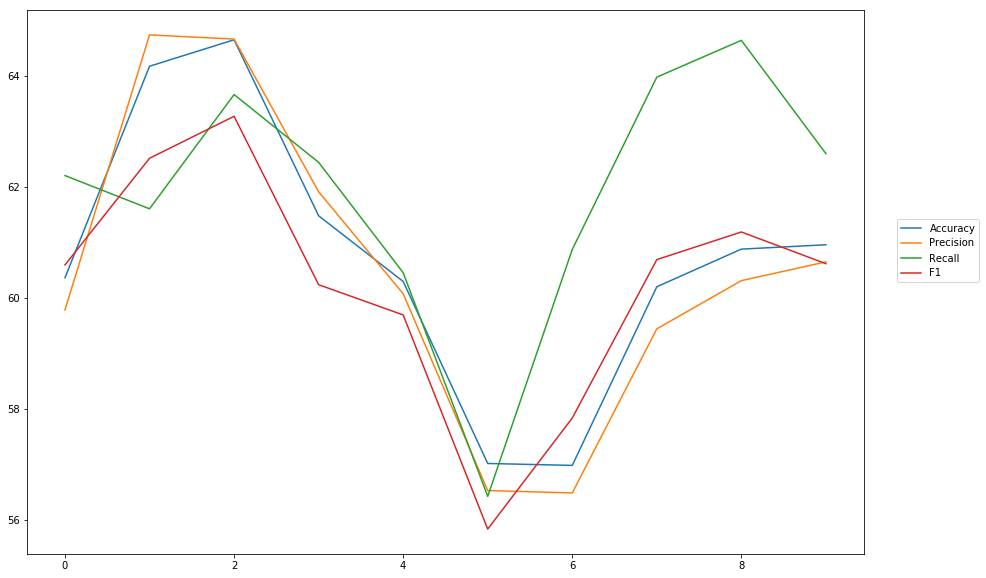

Accuracy: Mean = 60.70% (+/- 2.37%), Max = 64.65%, Min =  56.98%
Precision: Mean = 60.46% (+/- 2.67%), Max = 64.74%, Min =  56.48%
Recall: Mean = 61.89% (+/- 2.22%), Max = 64.64%, Min =  56.42%
F1: Mean = 60.25% (+/- 2.03%), Max = 63.27%, Min =  55.83%


In [34]:
cross_val(model_4, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'EmbeddingOnData_CBWO_50_5')

## CBOW Dim 100, window 5

In [31]:
EMBEDDING_DIM=100

word_vectors_5 = cbowmodel_100_5.wv

embedding_matrix_5 = np.zeros((len(word_index)+1, EMBEDDING_DIM))

for word, i in word_index.items():
    try:
        embedding_vector = word_vectors_5[word]
        embedding_matrix_5[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

In [32]:
wv_layer_5 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix_5],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)
#Input Layer
comment_input_5 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float32')

#Embedding Layer
embedded_sequences_5 = wv_layer_5(comment_input_5)

#First Dense Layer
x_5 = Dense(600, activation='relu')(embedded_sequences_5)

x_5 = Flatten()(x_5)

#Output (Dense) Layer
preds_5 = Dense(2, activation='softmax')(x_5)

# build the model
model_5 = Model(inputs=[comment_input_5], outputs=preds_5)


-----Fold 1--------


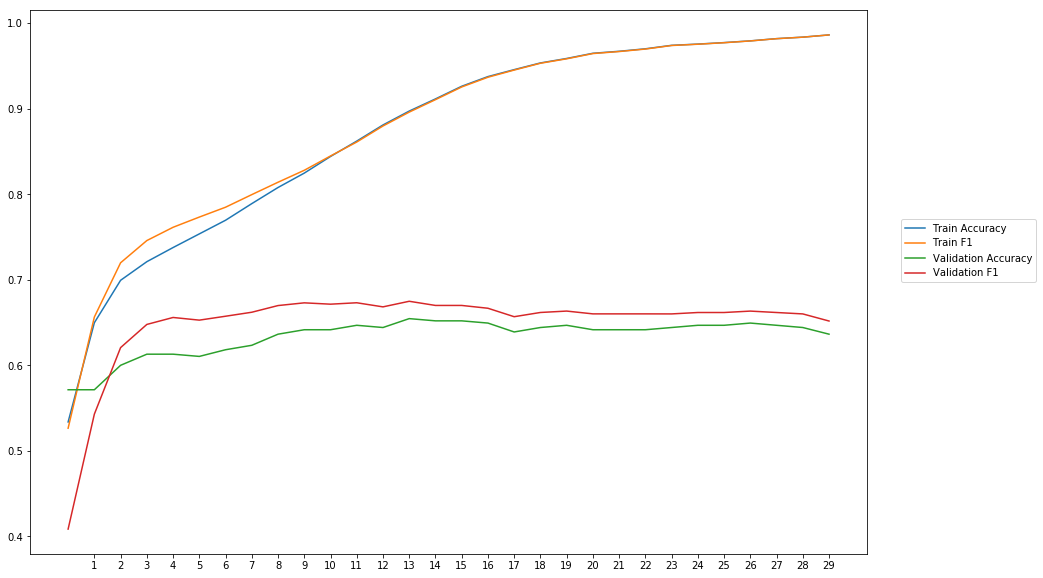

Average Accuracy: 63.36%
Average Precision: 62.04%
Average Recall: 68.82%
Average F1: 64.89%

-----Fold 2--------


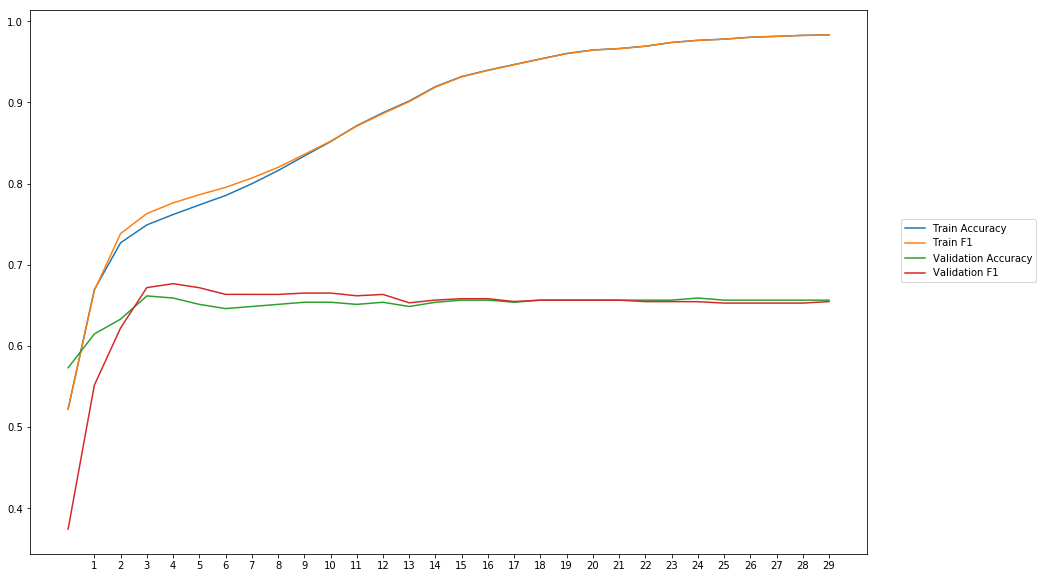

Average Accuracy: 64.98%
Average Precision: 64.88%
Average Recall: 64.94%
Average F1: 64.48%

-----Fold 3--------


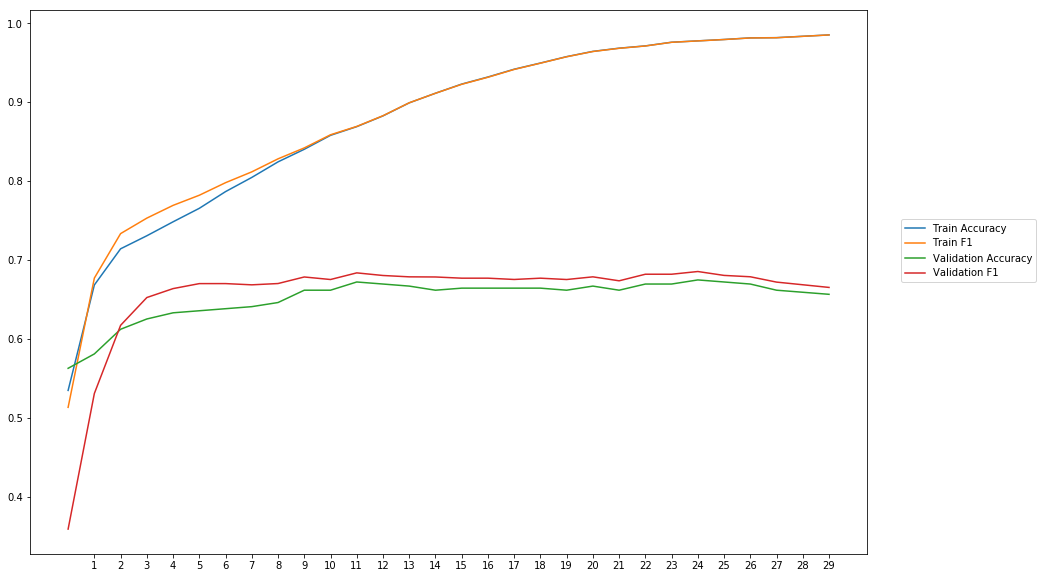

Average Accuracy: 65.14%
Average Precision: 64.04%
Average Recall: 68.45%
Average F1: 65.72%

-----Fold 4--------


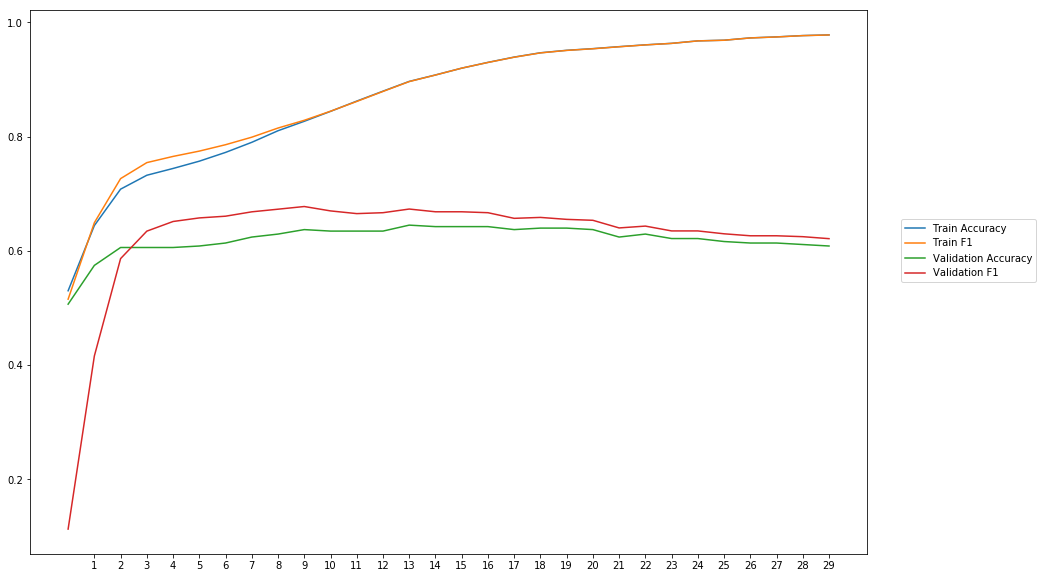

Average Accuracy: 61.99%
Average Precision: 60.86%
Average Recall: 66.39%
Average F1: 62.40%

-----Fold 5--------


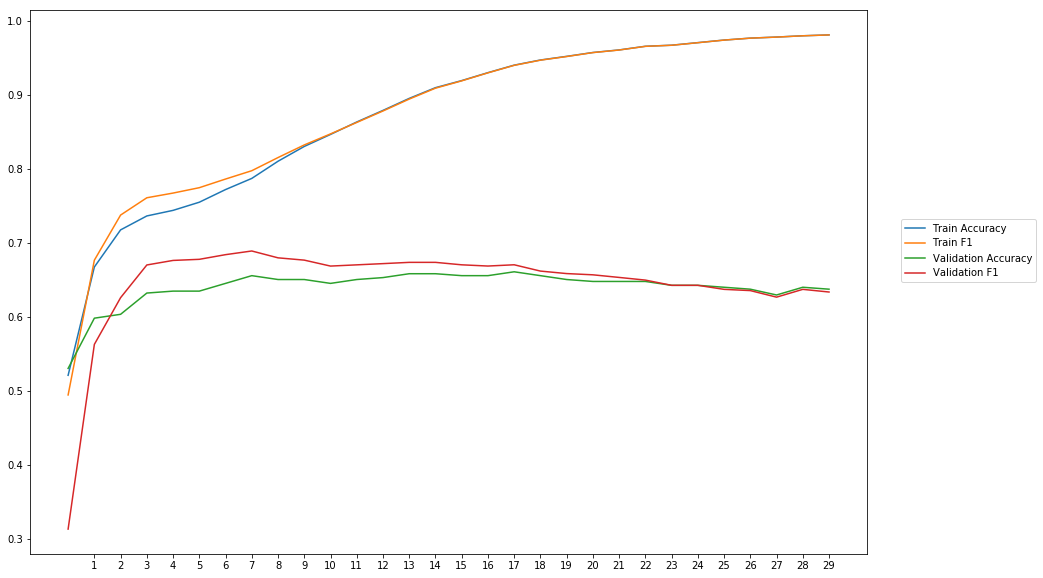

Average Accuracy: 63.94%
Average Precision: 62.96%
Average Recall: 67.07%
Average F1: 64.50%

-----Fold 6--------


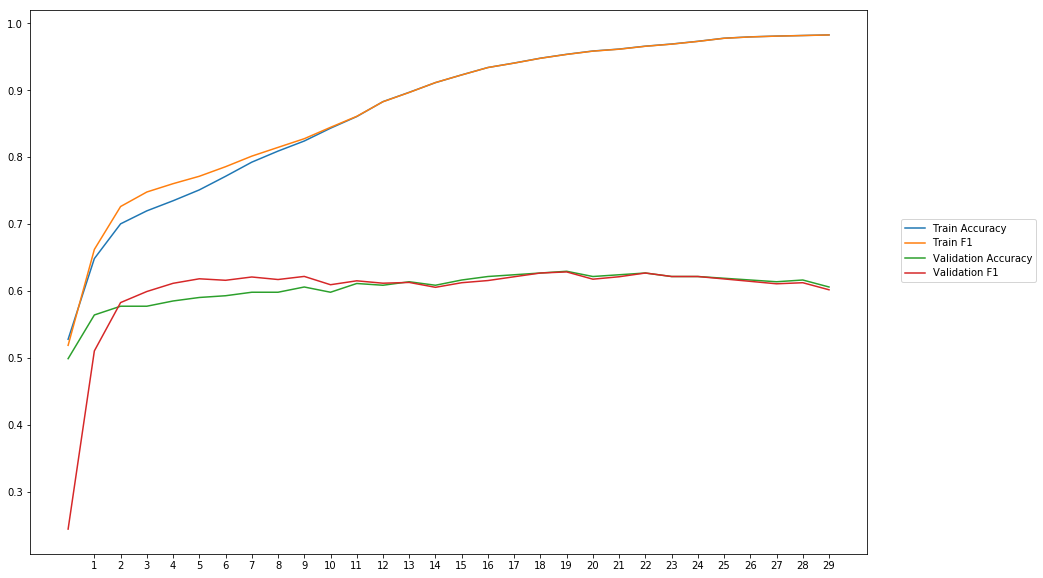

Average Accuracy: 60.43%
Average Precision: 60.13%
Average Recall: 60.31%
Average F1: 59.87%

-----Fold 7--------


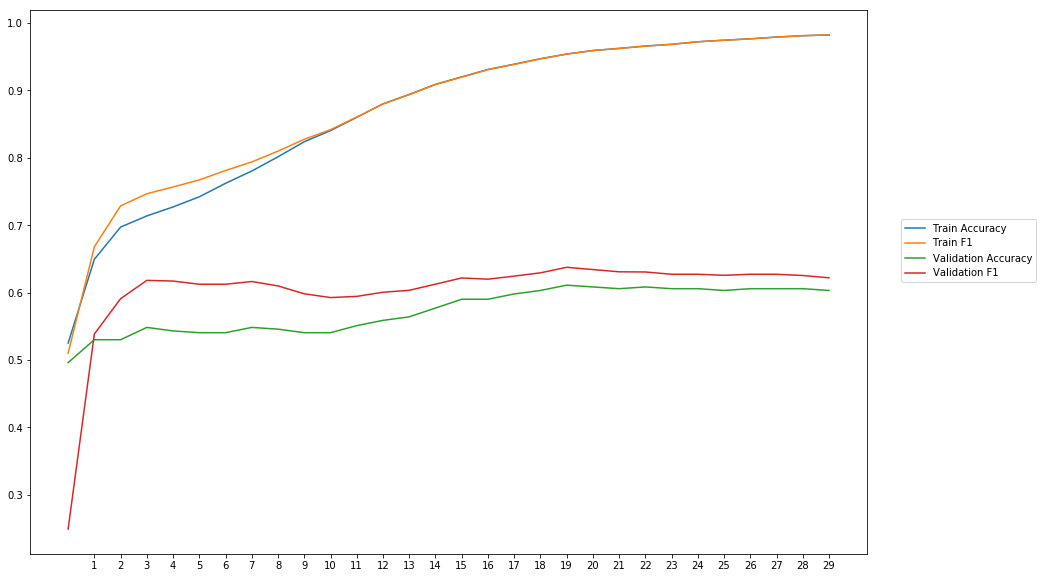

Average Accuracy: 57.35%
Average Precision: 56.14%
Average Recall: 66.07%
Average F1: 60.25%

-----Fold 8--------


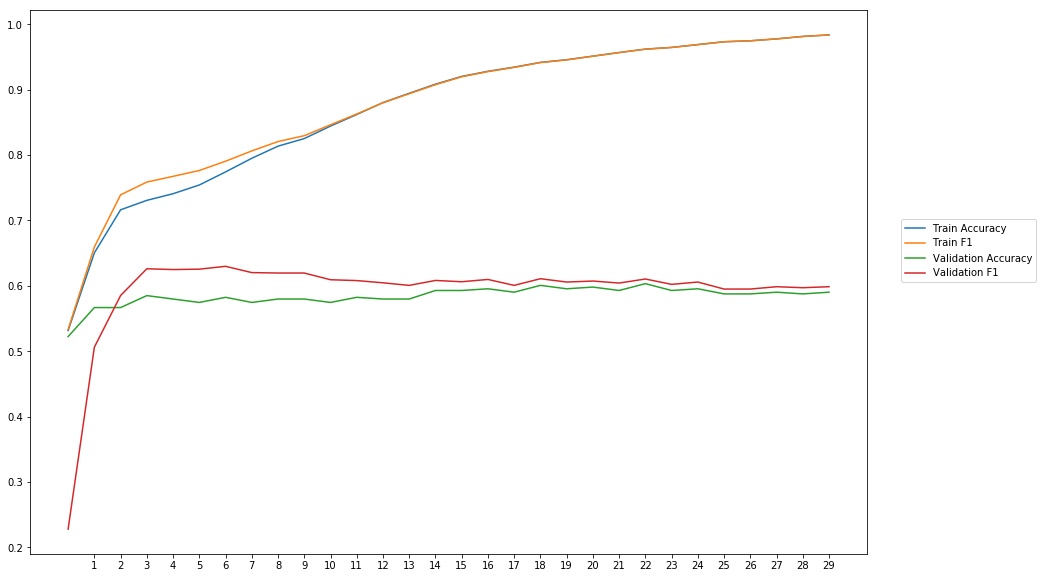

Average Accuracy: 58.39%
Average Precision: 57.81%
Average Recall: 62.02%
Average F1: 59.19%

-----Fold 9--------


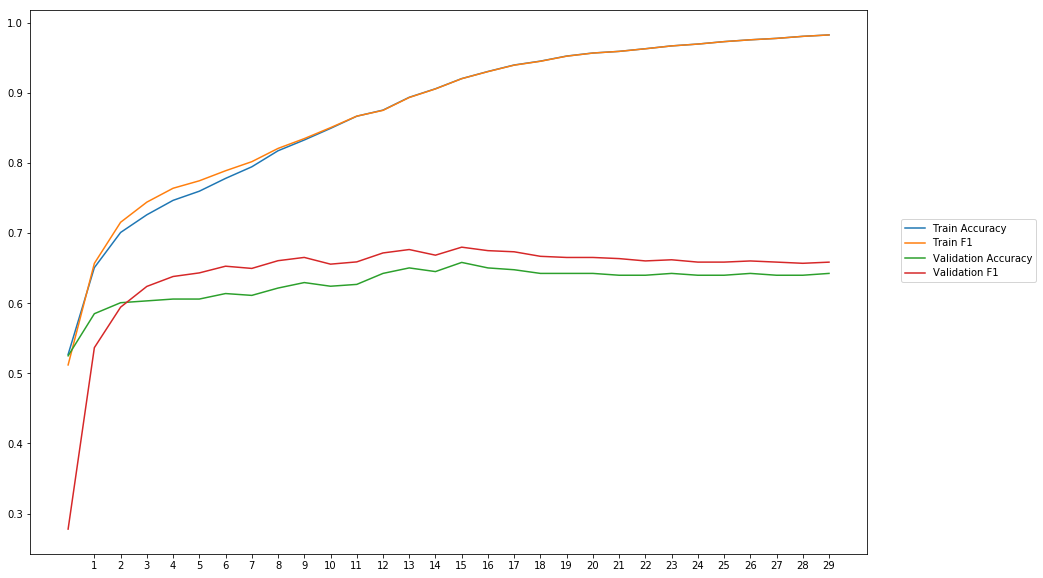

Average Accuracy: 62.79%
Average Precision: 61.34%
Average Recall: 68.25%
Average F1: 64.10%

-----Fold 10--------


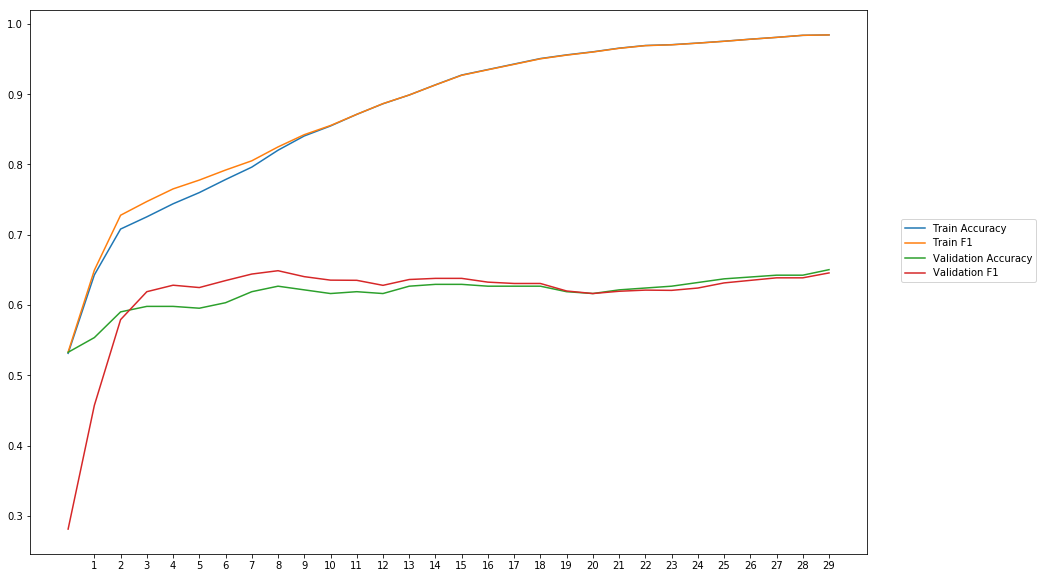

Average Accuracy: 61.68%
Average Precision: 61.49%
Average Recall: 62.04%
Average F1: 61.23%

-------Overallresults-------


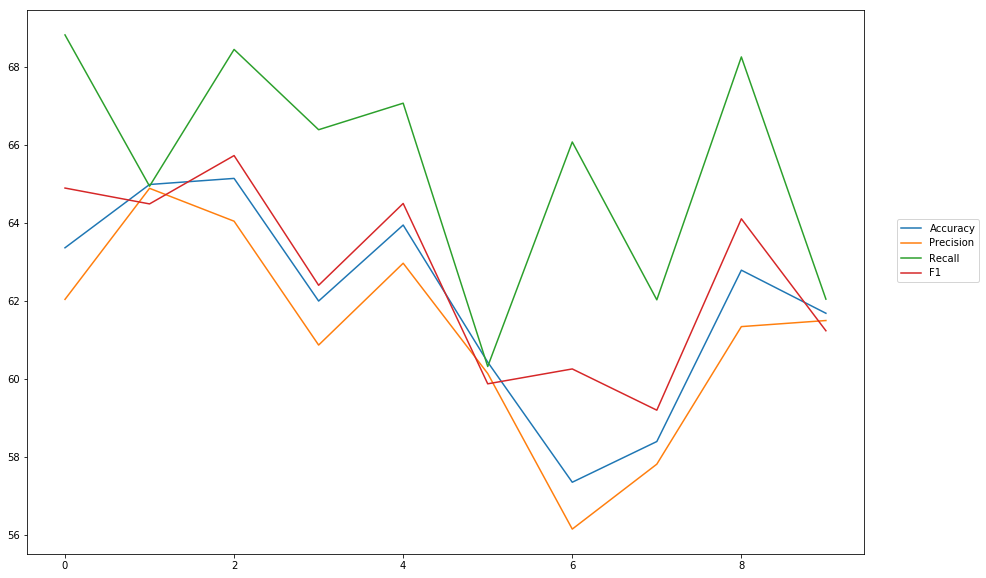

Accuracy: Mean = 62.00% (+/- 2.50%), Max = 65.14%, Min =  57.35%
Precision: Mean = 61.17% (+/- 2.53%), Max = 64.88%, Min =  56.14%
Recall: Mean = 65.44% (+/- 2.86%), Max = 68.82%, Min =  60.31%
F1: Mean = 62.66% (+/- 2.26%), Max = 65.72%, Min =  59.19%


In [37]:
cross_val(model_5, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'EmbeddingOnData_CBWO_100_5')

## CBOW Dim 300, window 5

In [16]:
EMBEDDING_DIM=300

word_vectors_6 = cbowmodel_300_5.wv

embedding_matrix_6 = np.zeros((len(word_index)+1, EMBEDDING_DIM))

for word, i in word_index.items():
    try:
        embedding_vector = word_vectors_6[word]
        embedding_matrix_6[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

In [17]:
wv_layer_6 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix_6],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)
#Input Layer
comment_input_6 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float32')

#Embedding Layer
embedded_sequences_6 = wv_layer_6(comment_input_6)

#First Dense Layer
x_6 = Dense(600, activation='relu')(embedded_sequences_6)

x_6 = Flatten()(x_6)

#Output (Dense) Layer
preds_6 = Dense(2, activation='softmax')(x_6)

# build the model
model_6 = Model(inputs=[comment_input_6], outputs=preds_6)


-----Fold 1--------


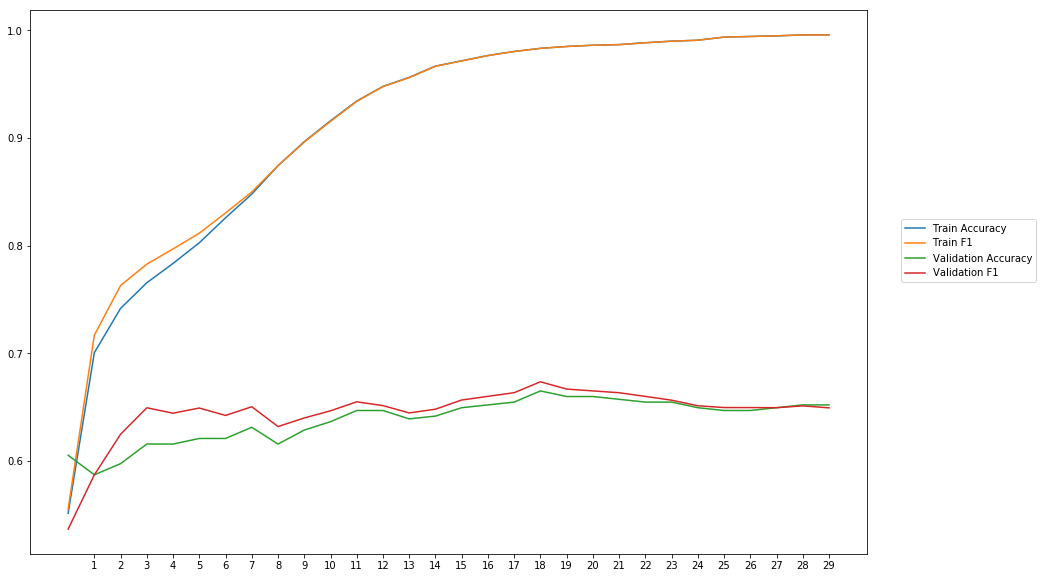

Average Accuracy: 63.84%
Average Precision: 63.20%
Average Recall: 66.18%
Average F1: 64.55%

-----Fold 2--------


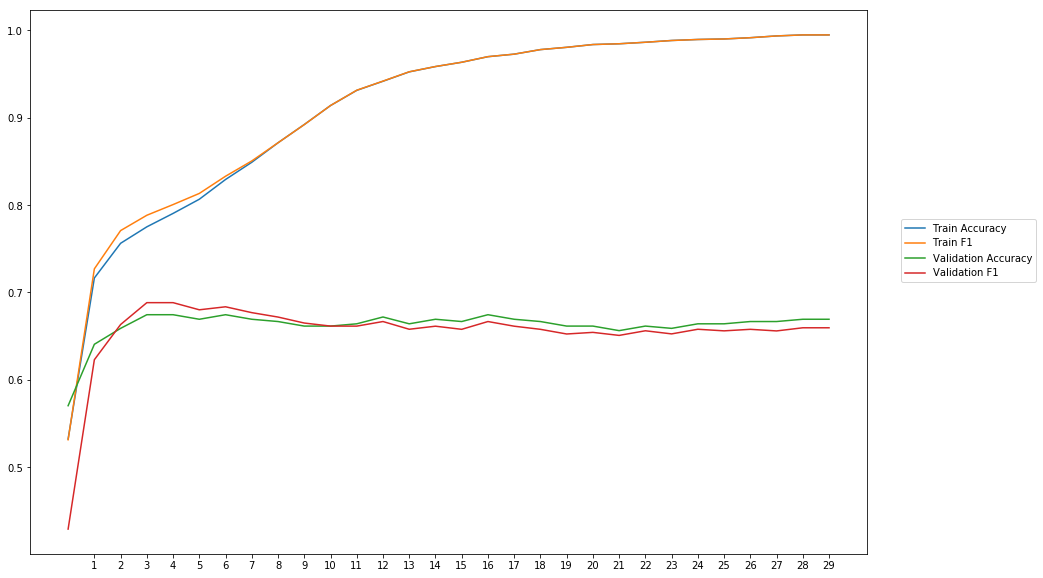

Average Accuracy: 66.22%
Average Precision: 66.39%
Average Recall: 64.90%
Average F1: 65.45%

-----Fold 3--------


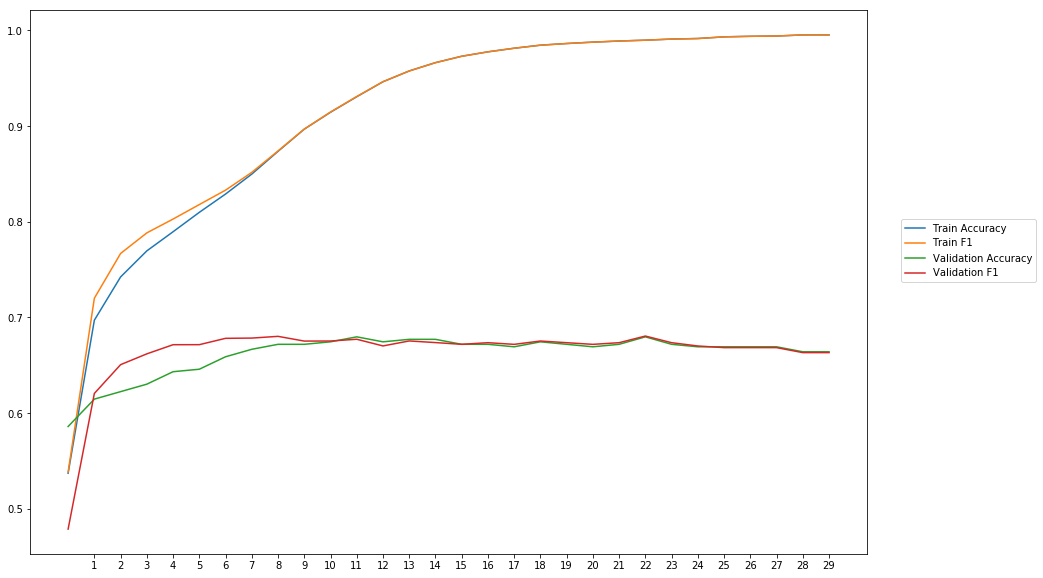

Average Accuracy: 66.17%
Average Precision: 65.63%
Average Recall: 67.45%
Average F1: 66.35%

-----Fold 4--------


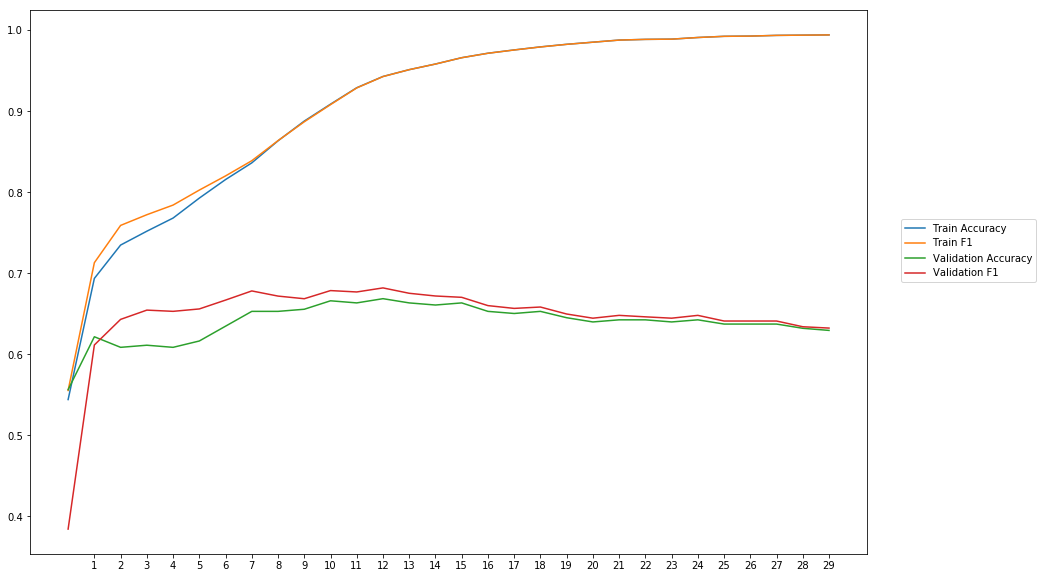

Average Accuracy: 63.93%
Average Precision: 63.14%
Average Recall: 66.86%
Average F1: 64.61%

-----Fold 5--------


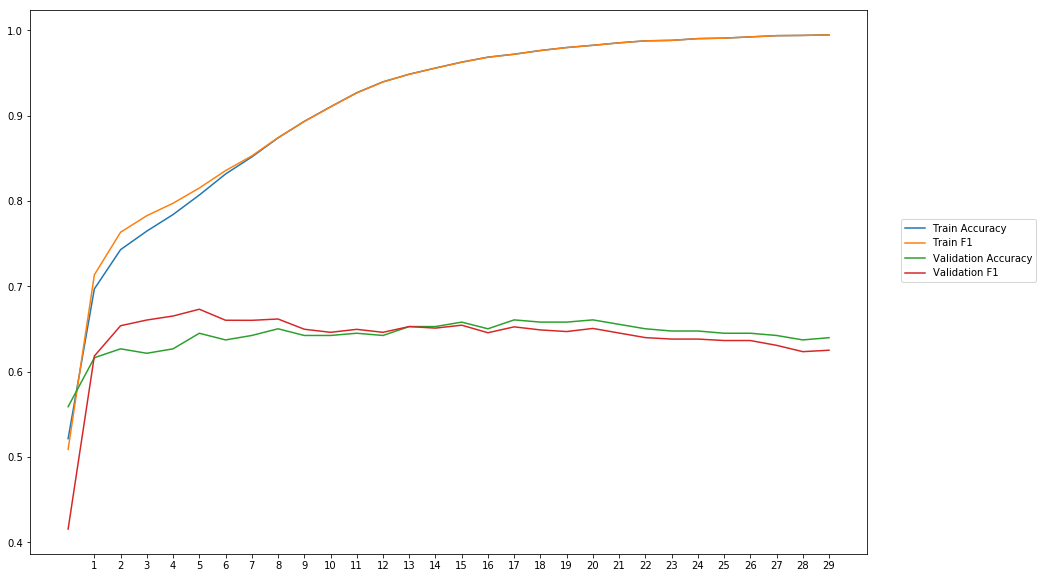

Average Accuracy: 64.19%
Average Precision: 64.16%
Average Recall: 64.22%
Average F1: 63.91%

-----Fold 6--------


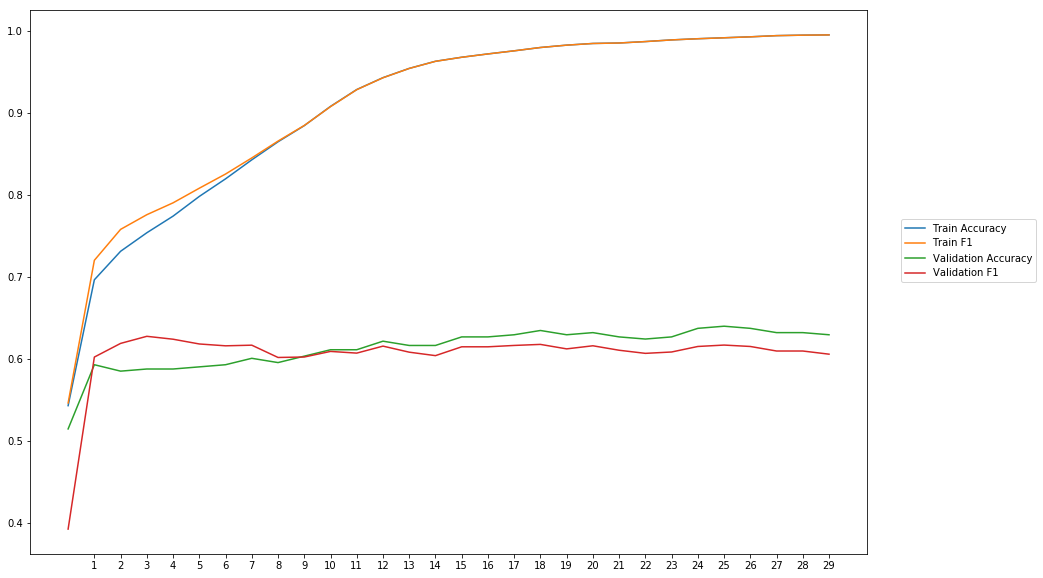

Average Accuracy: 61.29%
Average Precision: 61.65%
Average Recall: 59.81%
Average F1: 60.49%

-----Fold 7--------


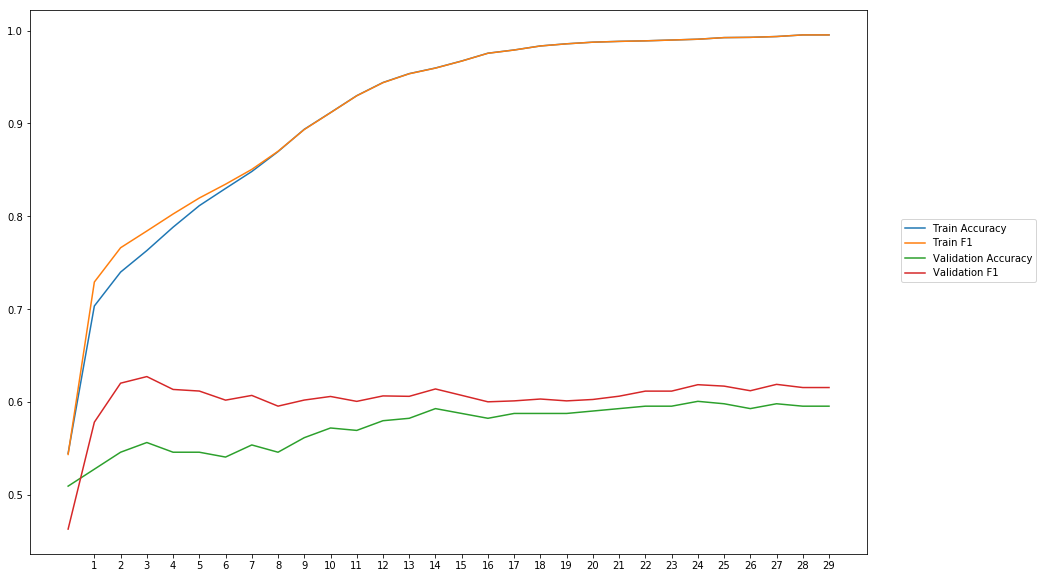

Average Accuracy: 57.37%
Average Precision: 56.39%
Average Recall: 65.15%
Average F1: 60.31%

-----Fold 8--------


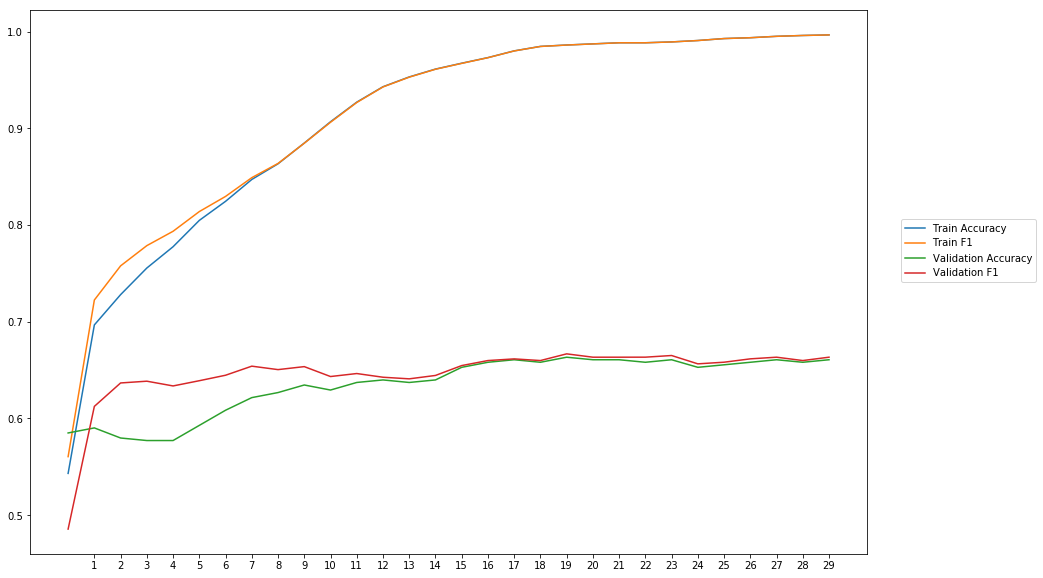

Average Accuracy: 63.51%
Average Precision: 62.82%
Average Recall: 67.05%
Average F1: 64.61%

-----Fold 9--------


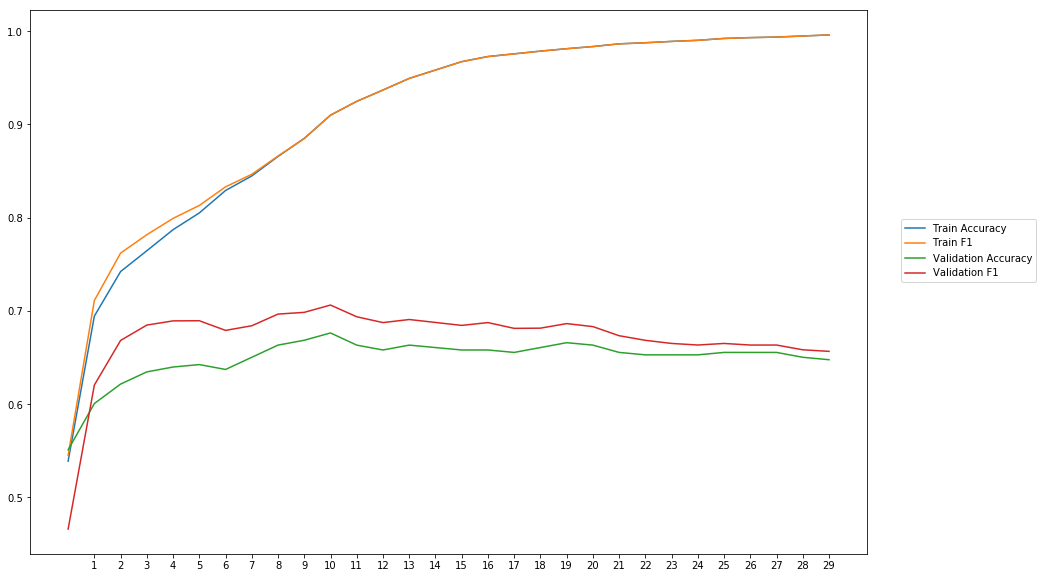

Average Accuracy: 64.89%
Average Precision: 62.87%
Average Recall: 72.30%
Average F1: 67.07%

-----Fold 10--------


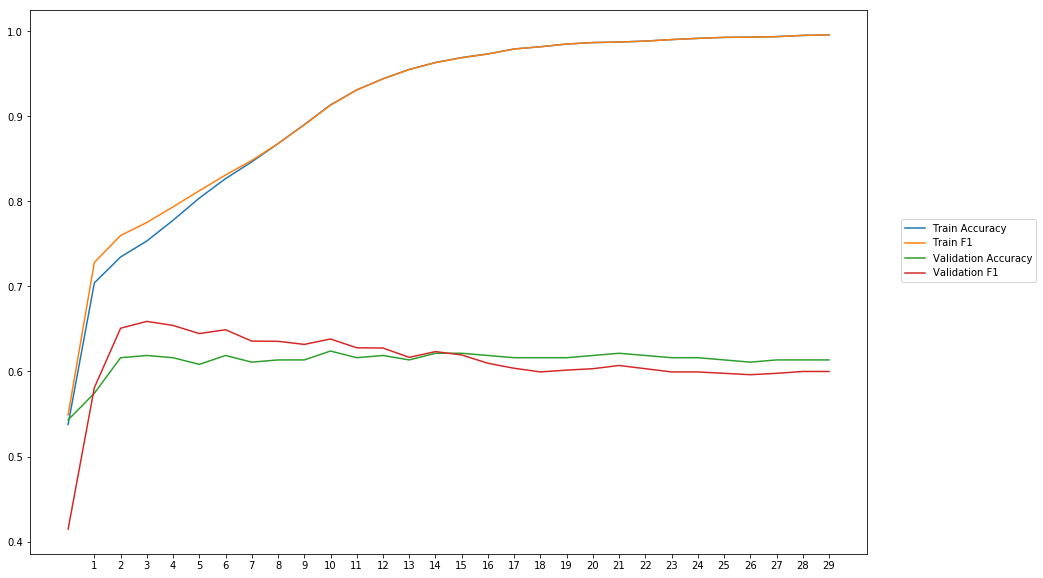

Average Accuracy: 61.24%
Average Precision: 61.09%
Average Recall: 61.66%
Average F1: 61.09%

-------Overallresults-------


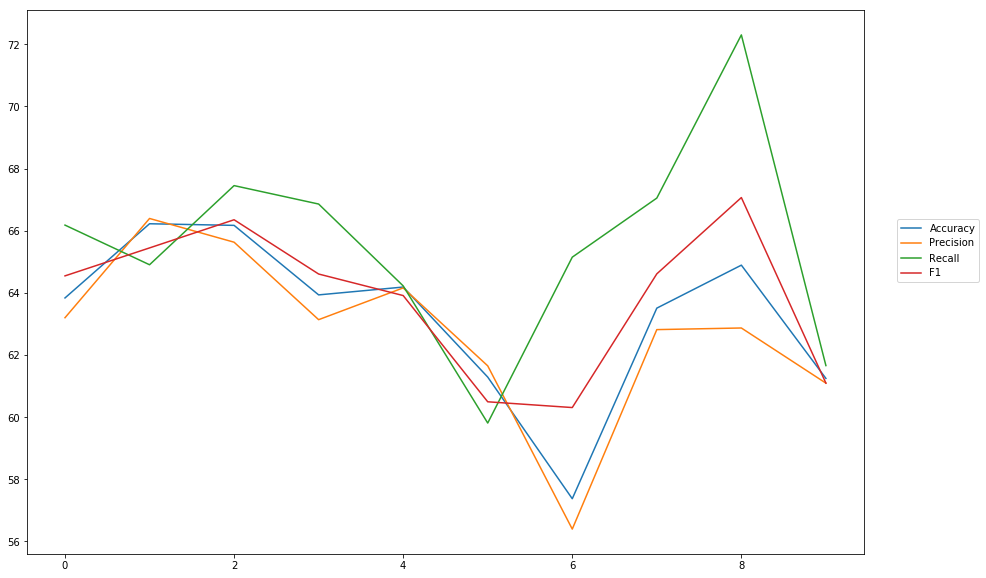

Accuracy: Mean = 63.27% (+/- 2.53%), Max = 66.22%, Min =  57.37%
Precision: Mean = 62.73% (+/- 2.61%), Max = 66.39%, Min =  56.39%
Recall: Mean = 65.56% (+/- 3.23%), Max = 72.30%, Min =  59.81%
F1: Mean = 63.84% (+/- 2.29%), Max = 67.07%, Min =  60.31%


In [40]:
cross_val(model_6, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'EmbeddingOnData_CBWO_300_5')

## Skipgram Dim 50, window 3

In [41]:
EMBEDDING_DIM=50

word_vectors_7 = skipmodel_50_3.wv

embedding_matrix_7 = np.zeros((len(word_index)+1, EMBEDDING_DIM))

for word, i in word_index.items():
    try:
        embedding_vector = word_vectors_7[word]
        embedding_matrix_7[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

In [42]:
wv_layer_7 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix_7],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)
#Input Layer
comment_input_7 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float32')

#Embedding Layer
embedded_sequences_7 = wv_layer_7(comment_input_7)

#First Dense Layer
x_7 = Dense(600, activation='relu')(embedded_sequences_7)

x_7 = Flatten()(x_7)

#Output (Dense) Layer
preds_7 = Dense(2, activation='softmax')(x_7)

# build the model
model_7 = Model(inputs=[comment_input_7], outputs=preds_7)


-----Fold 1--------


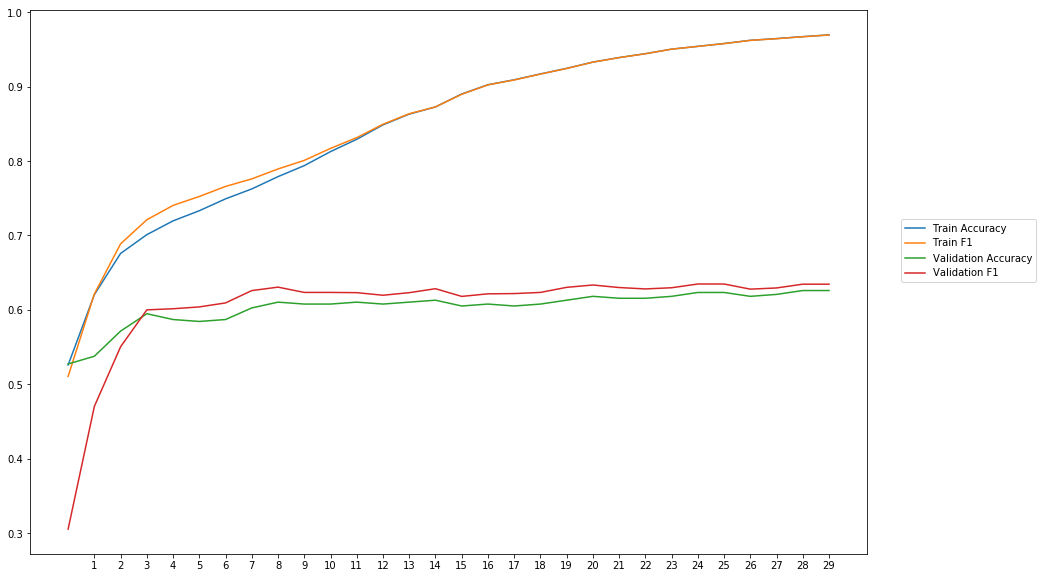

Average Accuracy: 60.35%
Average Precision: 59.75%
Average Recall: 62.20%
Average F1: 60.57%

-----Fold 2--------


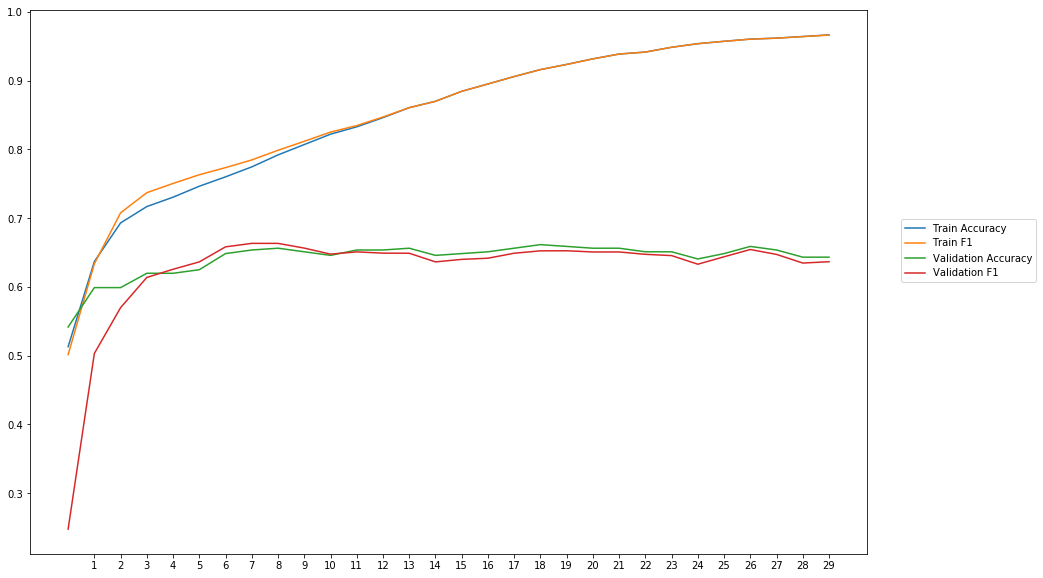

Average Accuracy: 64.16%
Average Precision: 64.76%
Average Recall: 61.59%
Average F1: 62.50%

-----Fold 3--------


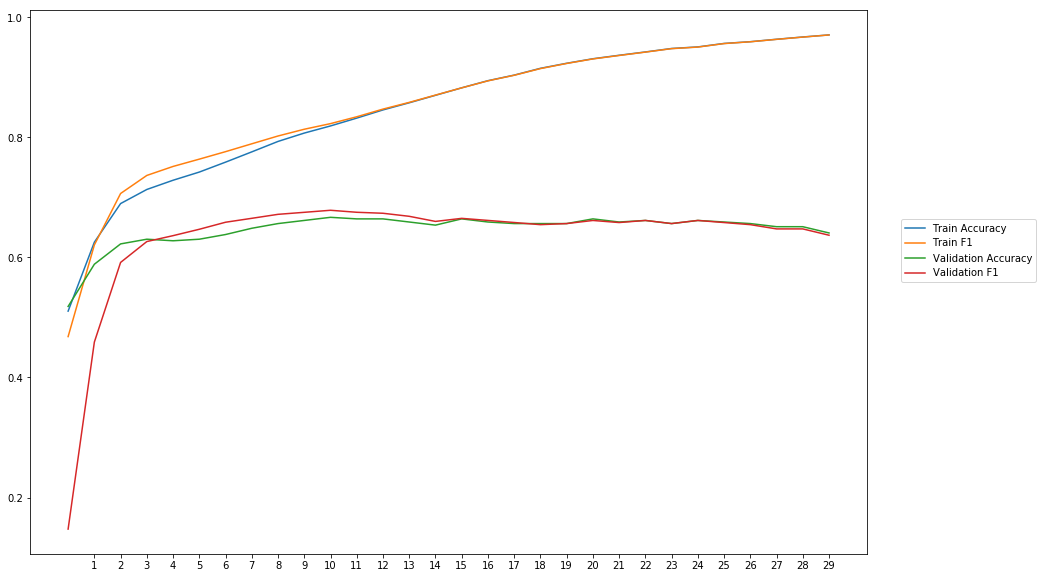

Average Accuracy: 64.60%
Average Precision: 64.60%
Average Recall: 63.65%
Average F1: 63.23%

-----Fold 4--------


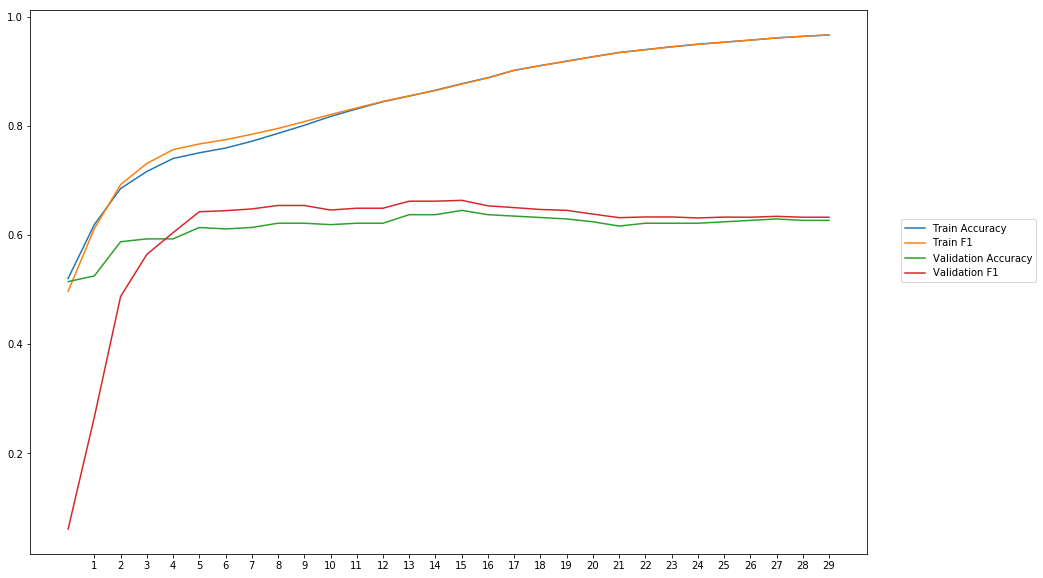

Average Accuracy: 61.48%
Average Precision: 61.91%
Average Recall: 62.50%
Average F1: 60.27%

-----Fold 5--------


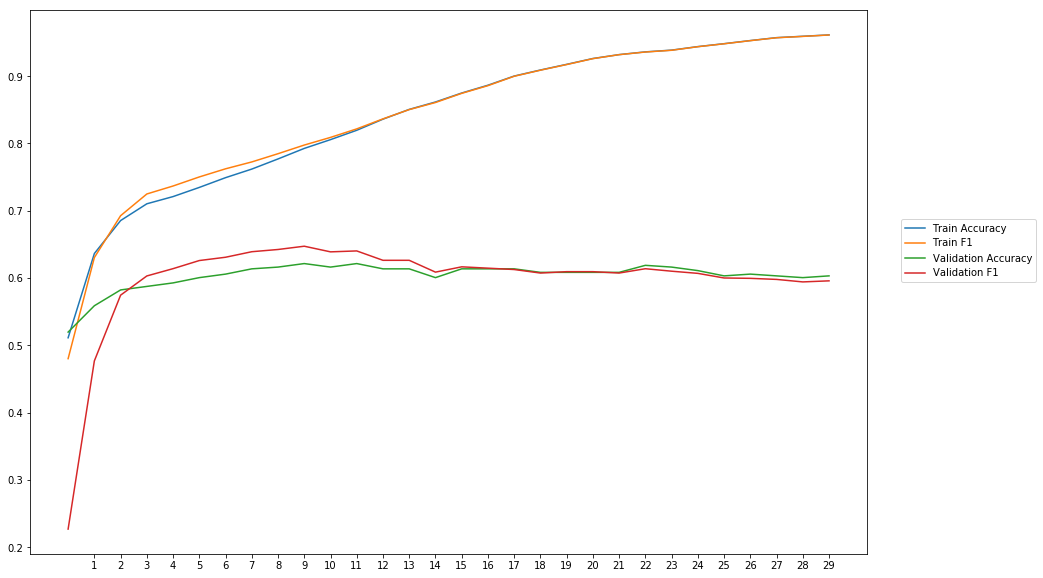

Average Accuracy: 60.33%
Average Precision: 60.11%
Average Recall: 60.47%
Average F1: 59.72%

-----Fold 6--------


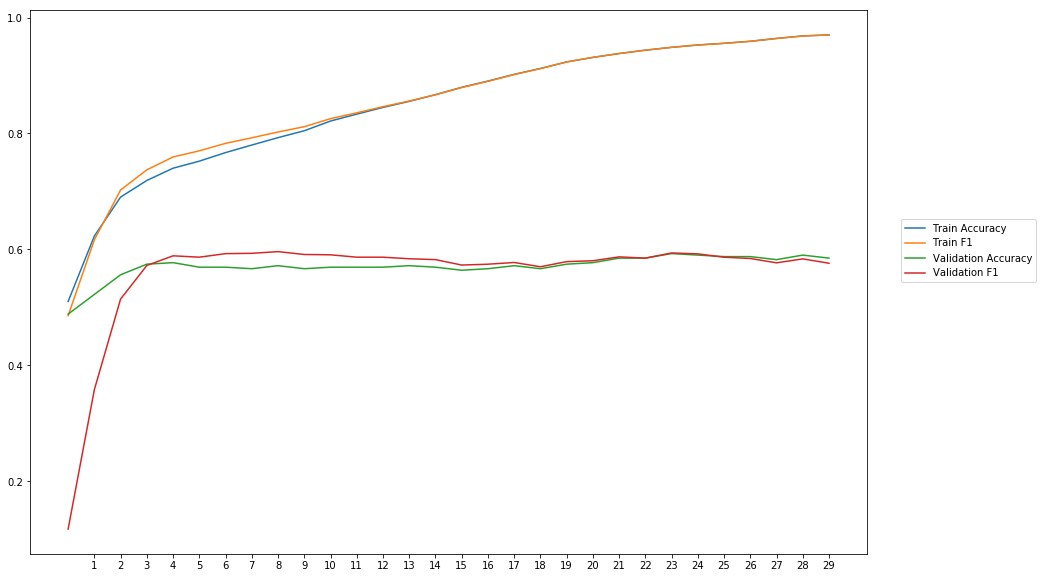

Average Accuracy: 57.05%
Average Precision: 56.57%
Average Recall: 56.44%
Average F1: 55.86%

-----Fold 7--------


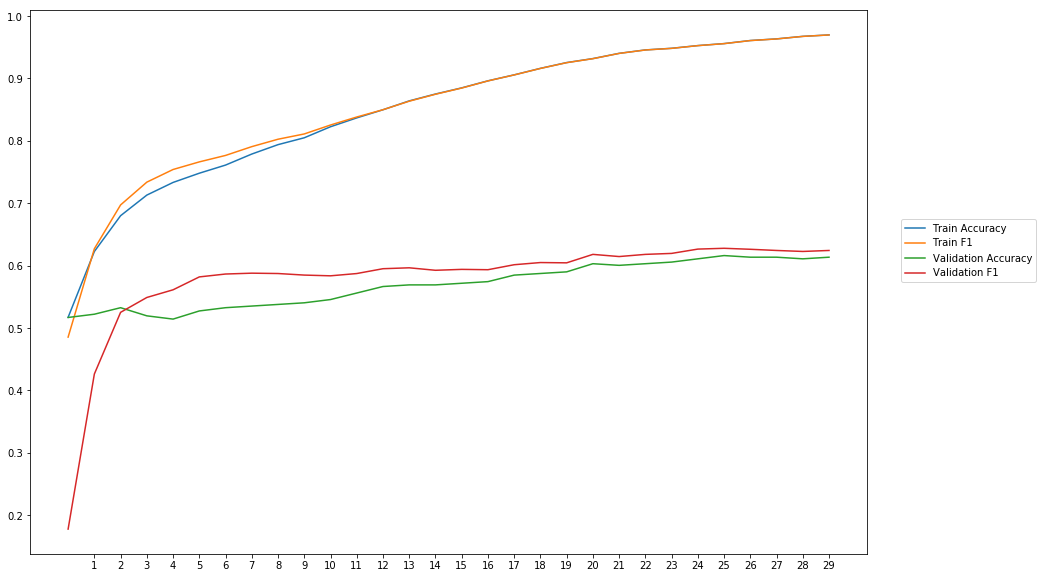

Average Accuracy: 56.95%
Average Precision: 56.50%
Average Recall: 60.87%
Average F1: 57.82%

-----Fold 8--------


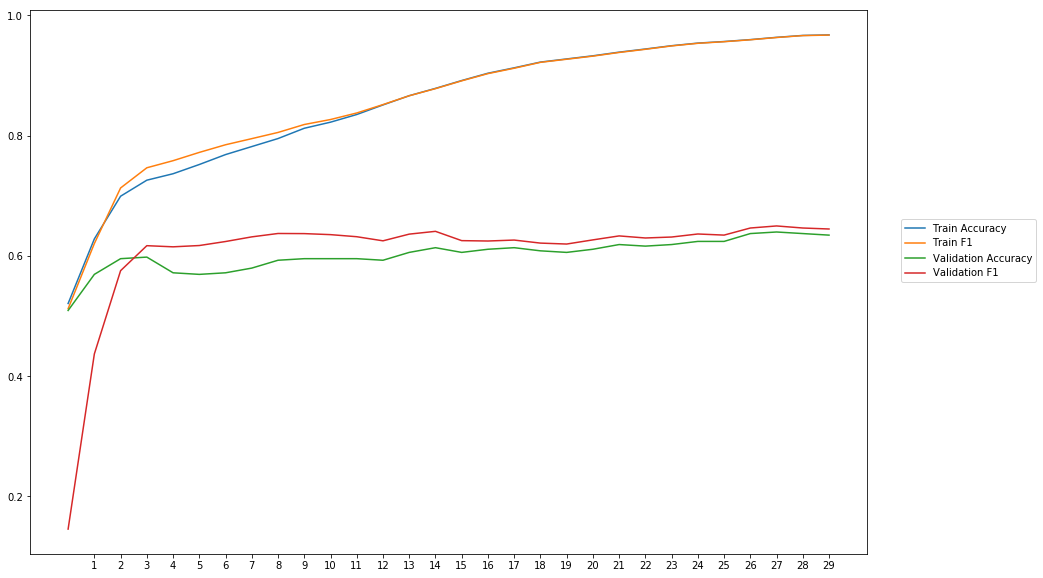

Average Accuracy: 60.20%
Average Precision: 59.45%
Average Recall: 63.93%
Average F1: 60.67%

-----Fold 9--------


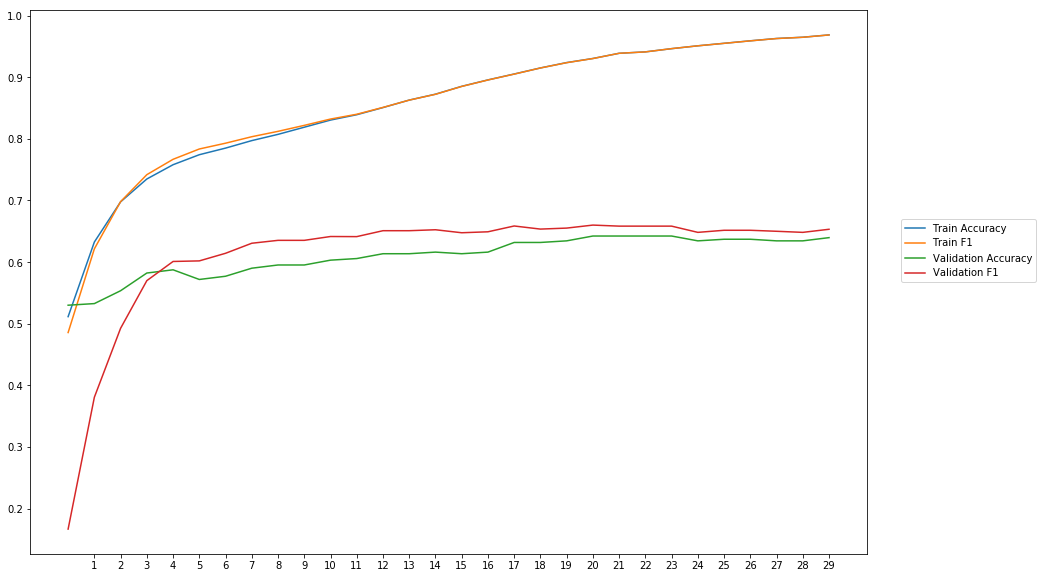

Average Accuracy: 60.94%
Average Precision: 60.38%
Average Recall: 64.64%
Average F1: 61.23%

-----Fold 10--------


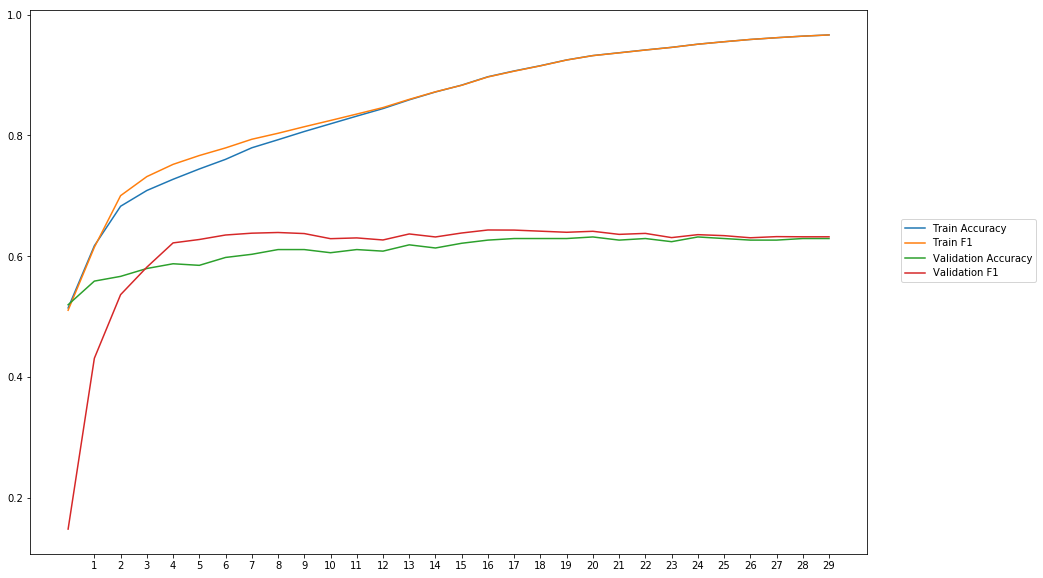

Average Accuracy: 60.99%
Average Precision: 60.67%
Average Recall: 62.67%
Average F1: 60.67%

-------Overallresults-------


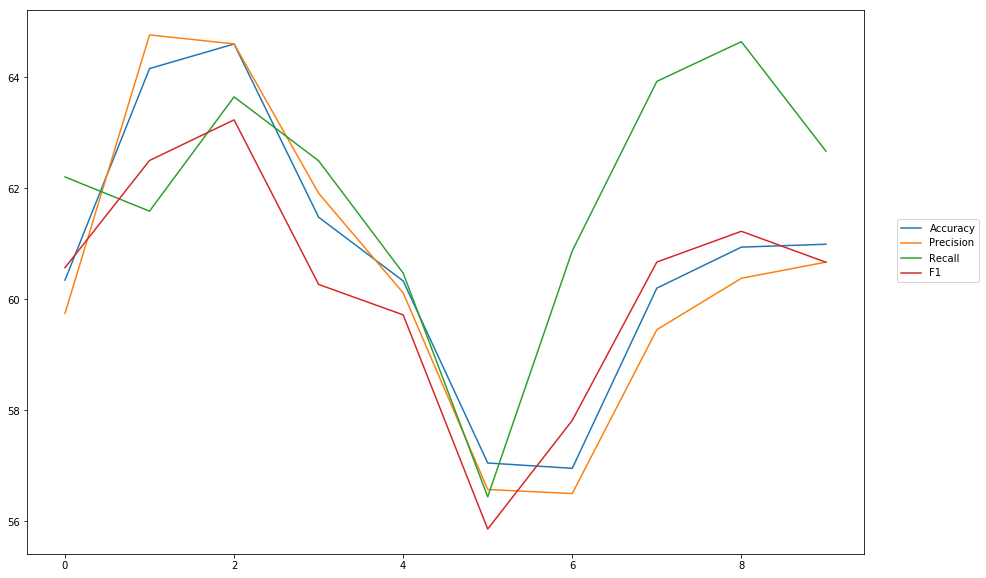

Accuracy: Mean = 60.71% (+/- 2.36%), Max = 64.60%, Min =  56.95%
Precision: Mean = 60.47% (+/- 2.65%), Max = 64.76%, Min =  56.50%
Recall: Mean = 61.90% (+/- 2.21%), Max = 64.64%, Min =  56.44%
F1: Mean = 60.25% (+/- 2.02%), Max = 63.23%, Min =  55.86%


In [43]:
cross_val(model_7, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'EmbeddingOnData_skip_50_3')

## Skip Dim 100, window 3

In [44]:
EMBEDDING_DIM=100

word_vectors_8 = skipmodel_100_3.wv

embedding_matrix_8 = np.zeros((len(word_index)+1, EMBEDDING_DIM))

for word, i in word_index.items():
    try:
        embedding_vector = word_vectors_8[word]
        embedding_matrix_8[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

In [45]:
wv_layer_8 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix_8],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)
#Input Layer
comment_input_8 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float32')

#Embedding Layer
embedded_sequences_8 = wv_layer_8(comment_input_8)

#First Dense Layer
x_8 = Dense(600, activation='relu')(embedded_sequences_8)

x_8 = Flatten()(x_8)

#Output (Dense) Layer
preds_8 = Dense(2, activation='softmax')(x_8)

# build the model
model_8 = Model(inputs=[comment_input_8], outputs=preds_8)


-----Fold 1--------


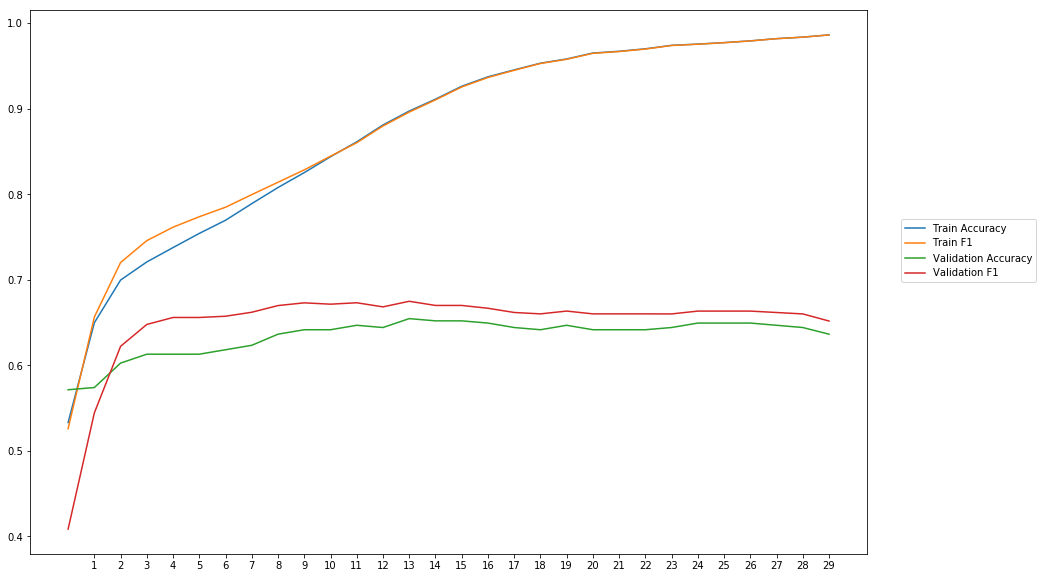

Average Accuracy: 63.41%
Average Precision: 62.09%
Average Recall: 68.85%
Average F1: 64.93%

-----Fold 2--------


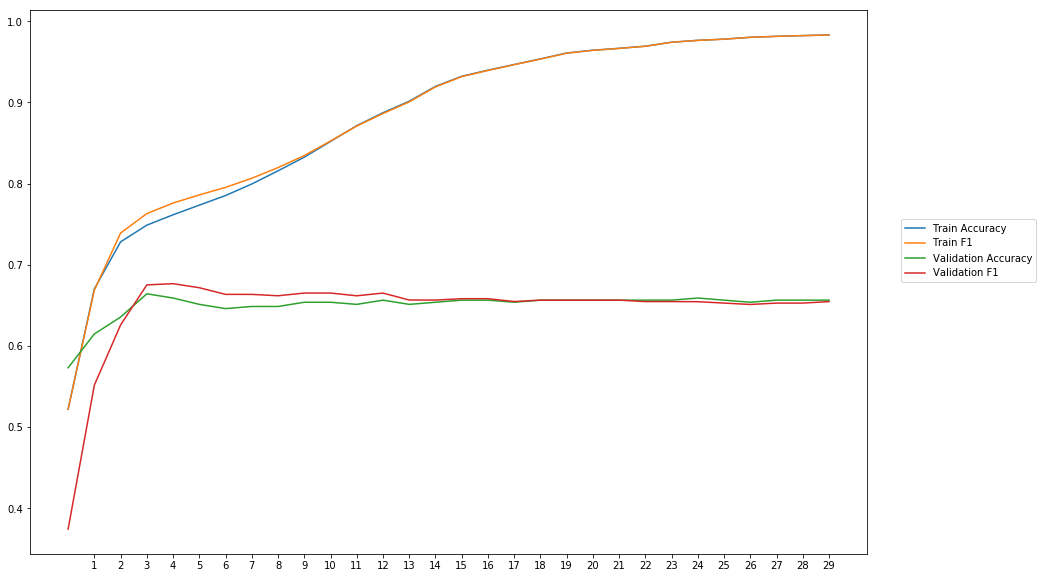

Average Accuracy: 65.00%
Average Precision: 64.89%
Average Recall: 64.99%
Average F1: 64.51%

-----Fold 3--------


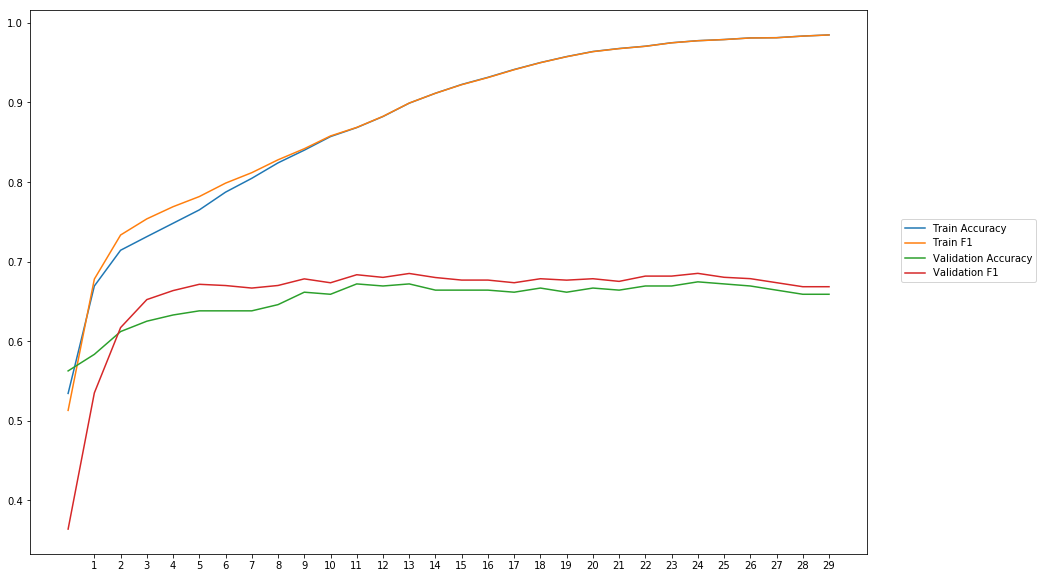

Average Accuracy: 65.19%
Average Precision: 64.07%
Average Recall: 68.55%
Average F1: 65.80%

-----Fold 4--------


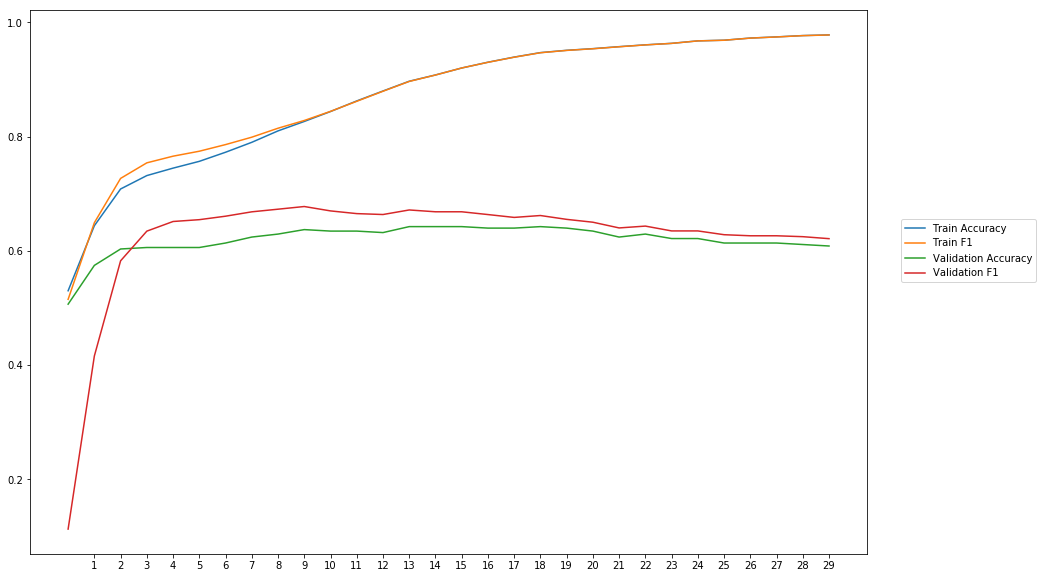

Average Accuracy: 61.95%
Average Precision: 60.83%
Average Recall: 66.32%
Average F1: 62.35%

-----Fold 5--------


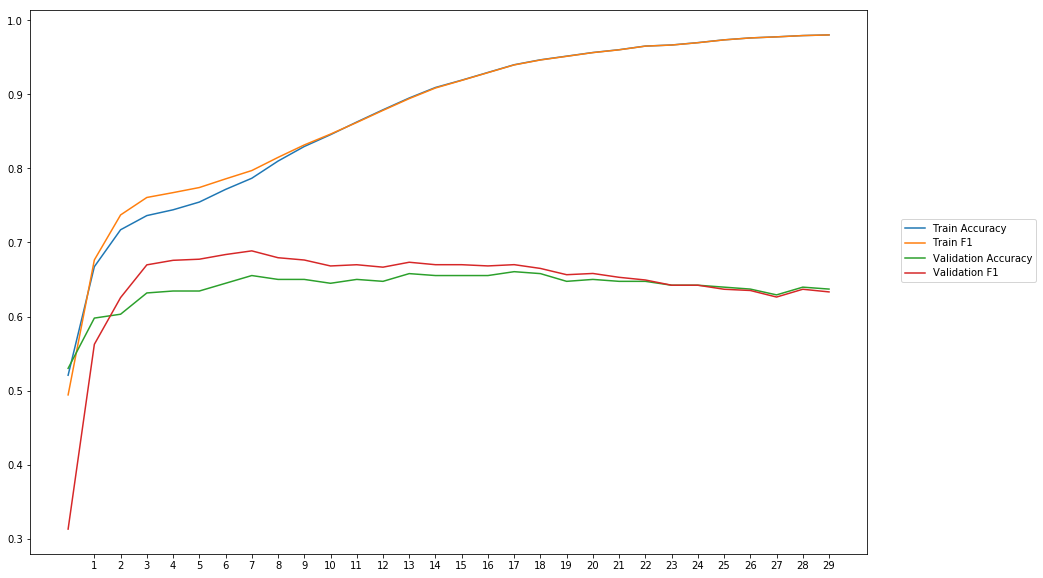

Average Accuracy: 63.93%
Average Precision: 62.95%
Average Recall: 67.05%
Average F1: 64.48%

-----Fold 6--------


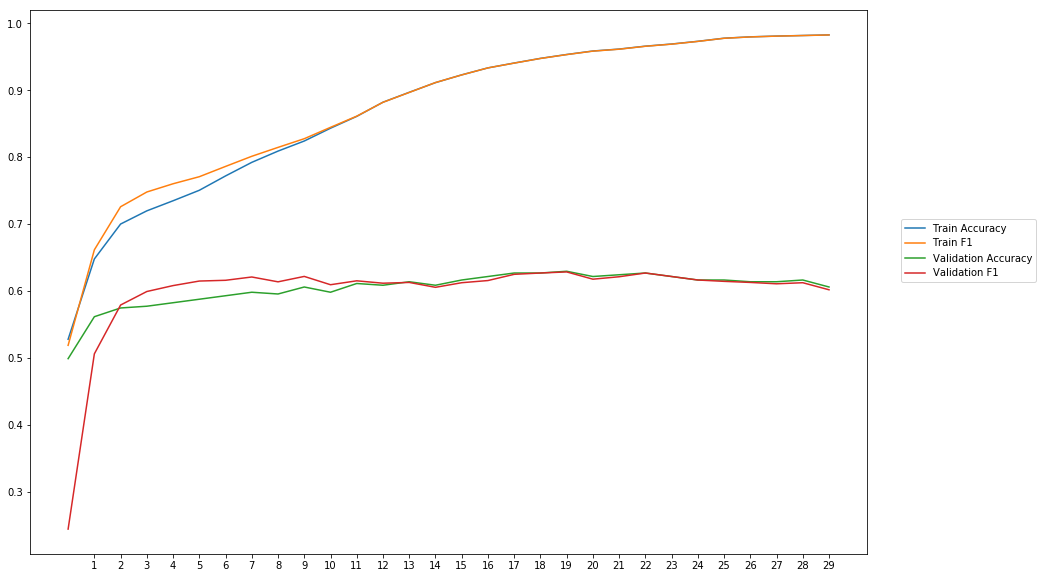

Average Accuracy: 60.36%
Average Precision: 60.07%
Average Recall: 60.21%
Average F1: 59.79%

-----Fold 7--------


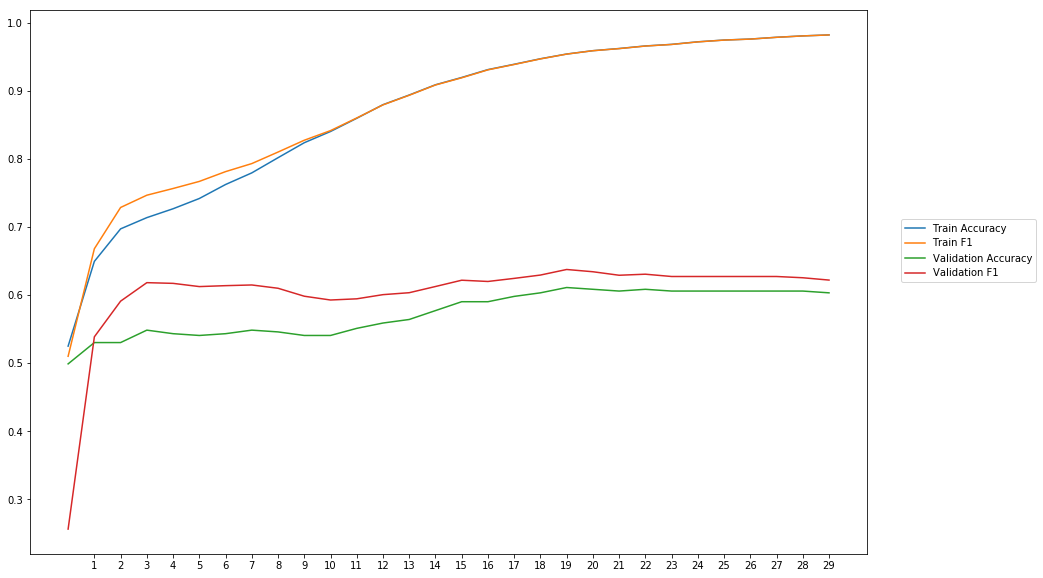

Average Accuracy: 57.37%
Average Precision: 56.19%
Average Recall: 66.06%
Average F1: 60.27%

-----Fold 8--------


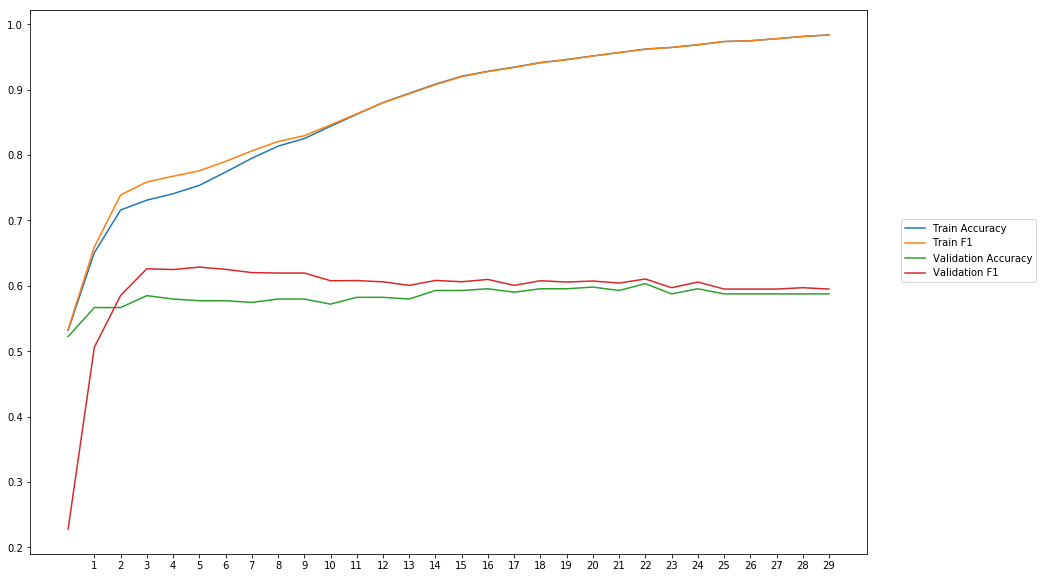

Average Accuracy: 58.33%
Average Precision: 57.75%
Average Recall: 61.97%
Average F1: 59.14%

-----Fold 9--------


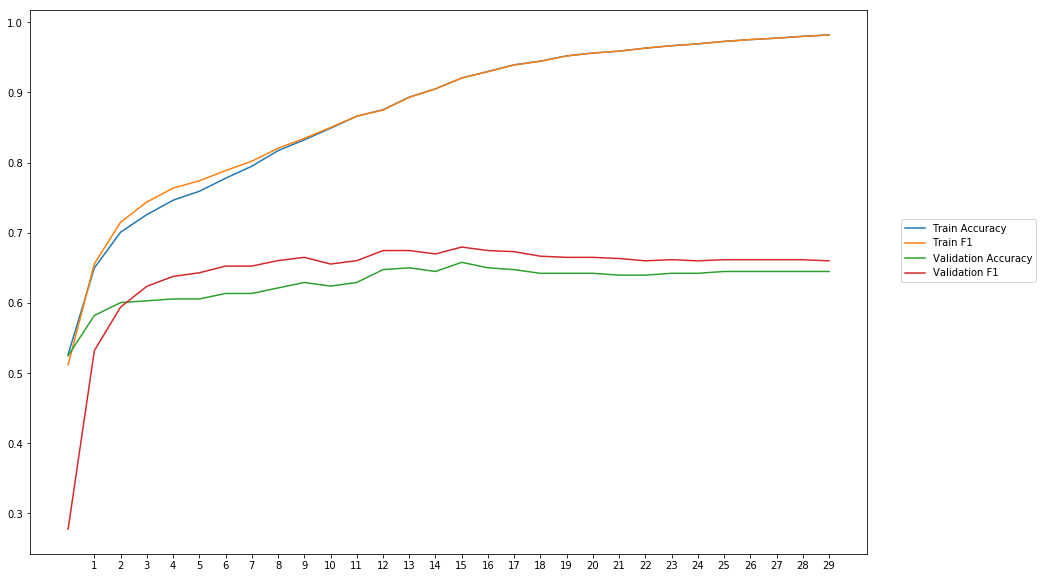

Average Accuracy: 62.89%
Average Precision: 61.45%
Average Recall: 68.27%
Average F1: 64.17%

-----Fold 10--------


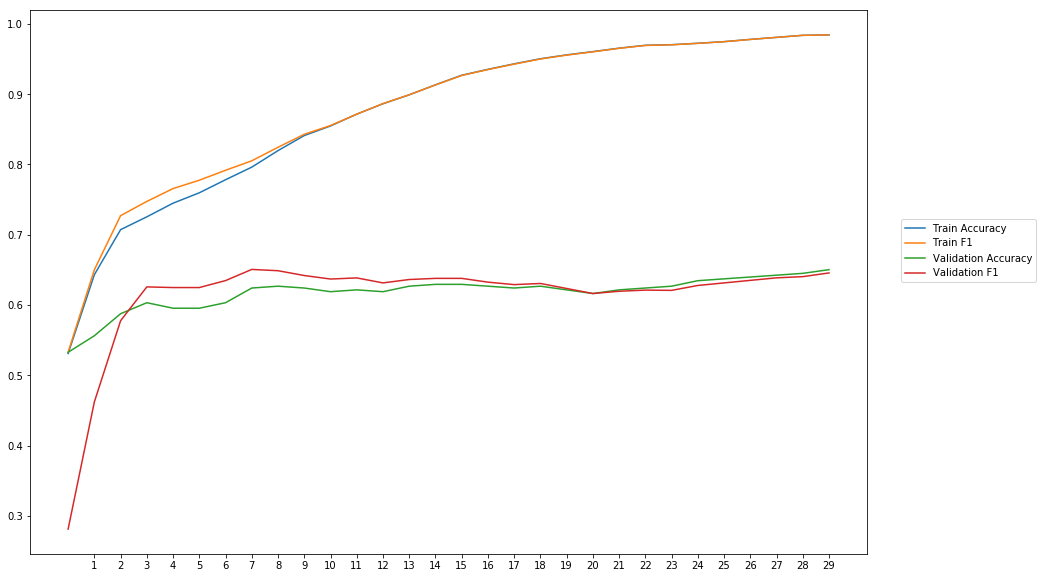

Average Accuracy: 61.76%
Average Precision: 61.56%
Average Recall: 62.18%
Average F1: 61.33%

-------Overallresults-------


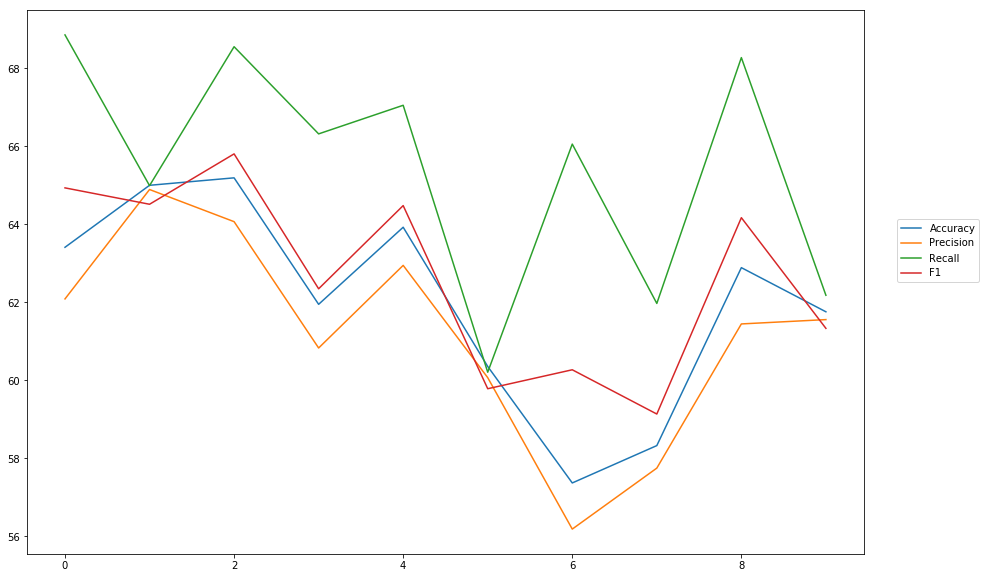

Accuracy: Mean = 62.02% (+/- 2.52%), Max = 65.19%, Min =  57.37%
Precision: Mean = 61.18% (+/- 2.54%), Max = 64.89%, Min =  56.19%
Recall: Mean = 65.45% (+/- 2.89%), Max = 68.85%, Min =  60.21%
F1: Mean = 62.68% (+/- 2.29%), Max = 65.80%, Min =  59.14%


In [46]:
cross_val(model_8, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'EmbeddingOnData_skip_100_3')

## Skipgram Dim 300, window 3

In [18]:
EMBEDDING_DIM=300

word_vectors_9 = skipmodel_300_3.wv

embedding_matrix_9 = np.zeros((len(word_index)+1, EMBEDDING_DIM))

for word, i in word_index.items():
    try:
        embedding_vector = word_vectors_9[word]
        embedding_matrix_9[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

In [19]:
wv_layer_9 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix_9],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)
#Input Layer
comment_input_9 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float32')

#Embedding Layer
embedded_sequences_9 = wv_layer_9(comment_input_9)

#First Dense Layer
x_9 = Dense(600, activation='relu')(embedded_sequences_9)

x_9 = Flatten()(x_9)

#Output (Dense) Layer
preds_9 = Dense(2, activation='softmax')(x_9)

# build the model
model_9 = Model(inputs=[comment_input_9], outputs=preds_9)


-----Fold 1--------


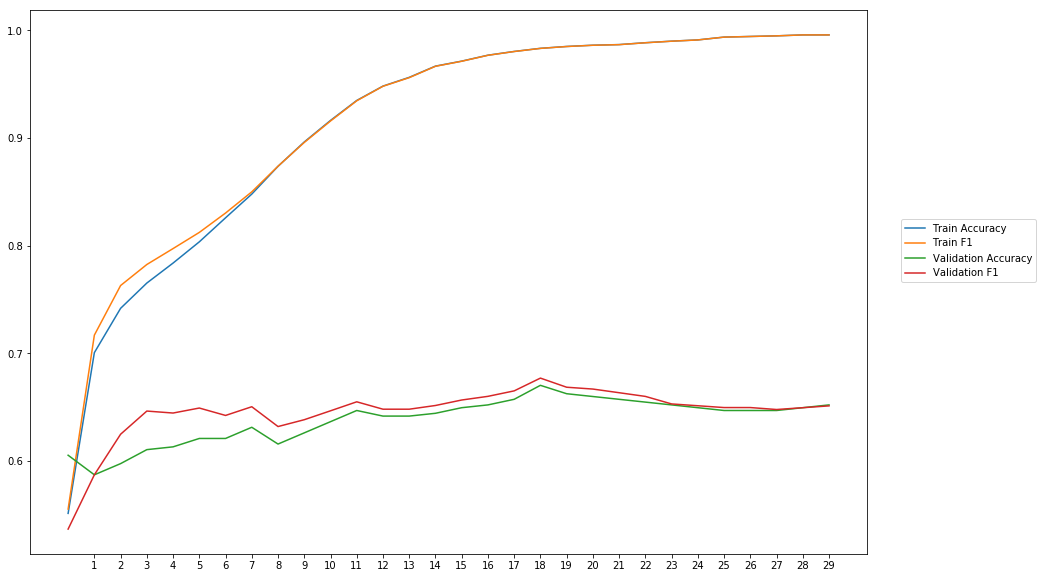

Average Accuracy: 63.81%
Average Precision: 63.16%
Average Recall: 66.25%
Average F1: 64.55%

-----Fold 2--------


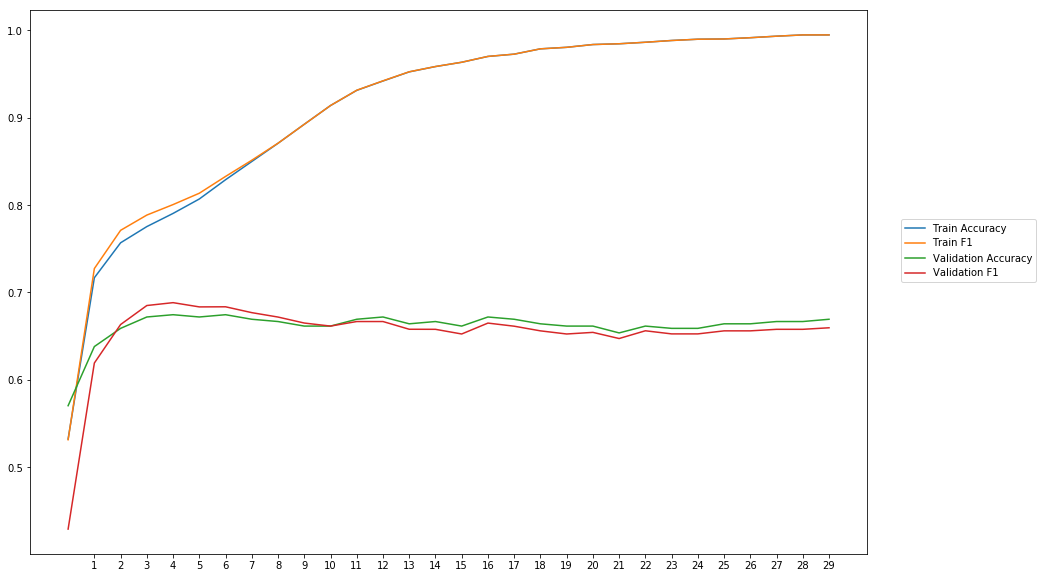

Average Accuracy: 66.15%
Average Precision: 66.30%
Average Recall: 64.85%
Average F1: 65.37%

-----Fold 3--------


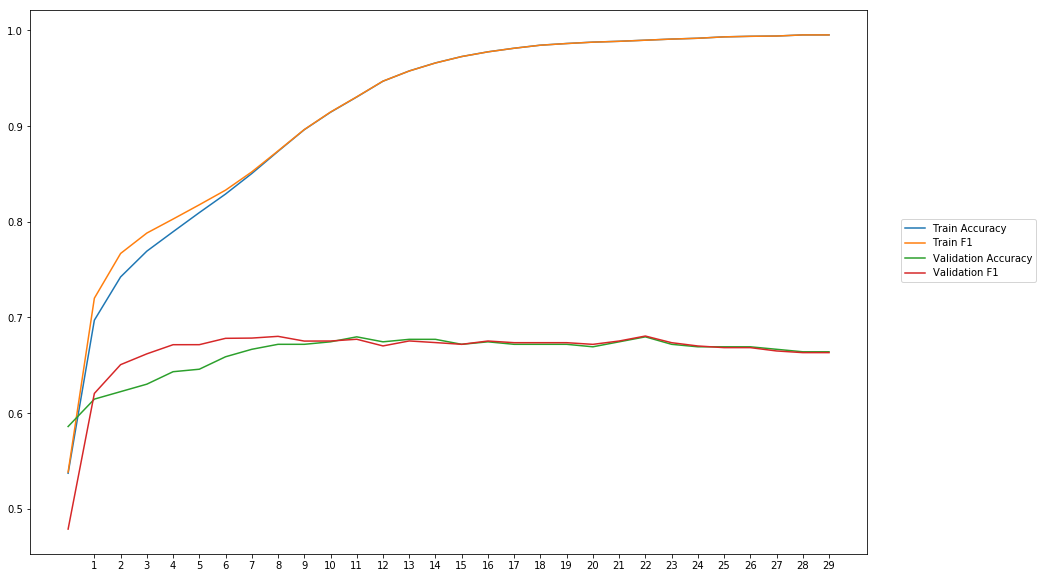

Average Accuracy: 66.18%
Average Precision: 65.65%
Average Recall: 67.43%
Average F1: 66.35%

-----Fold 4--------


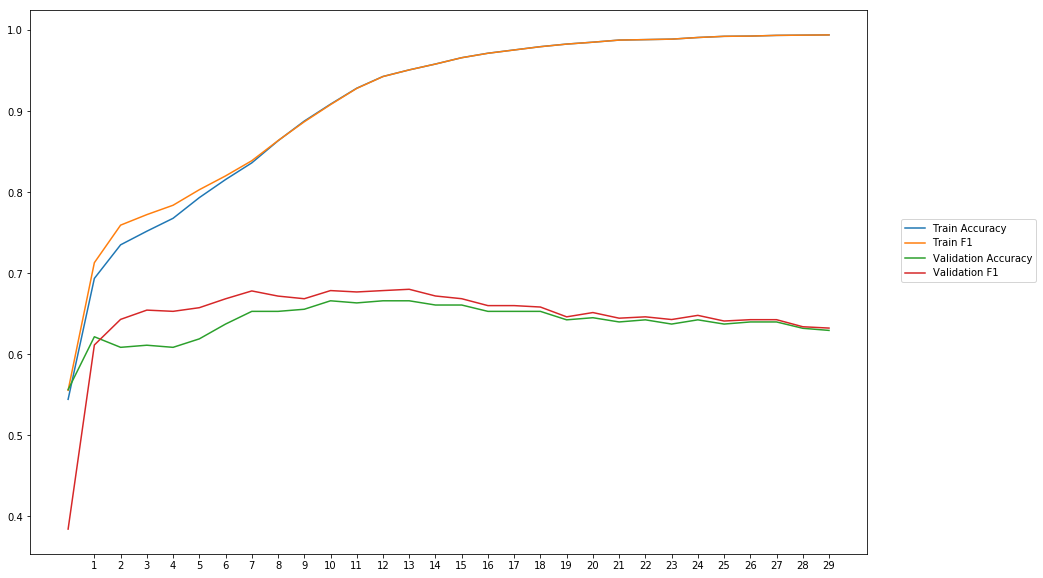

Average Accuracy: 63.96%
Average Precision: 63.15%
Average Recall: 66.89%
Average F1: 64.63%

-----Fold 5--------


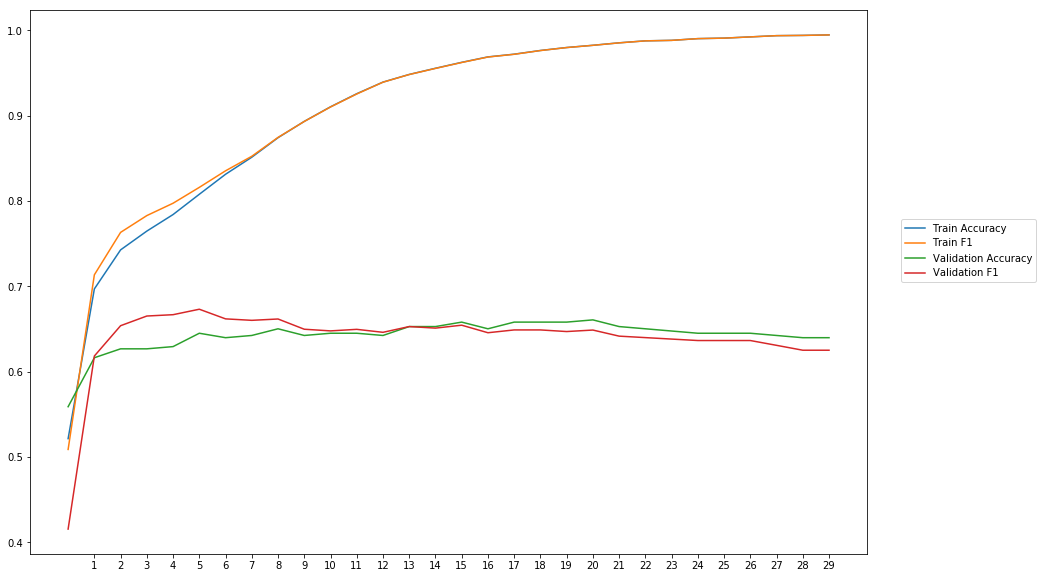

Average Accuracy: 64.21%
Average Precision: 64.20%
Average Recall: 64.19%
Average F1: 63.91%

-----Fold 6--------


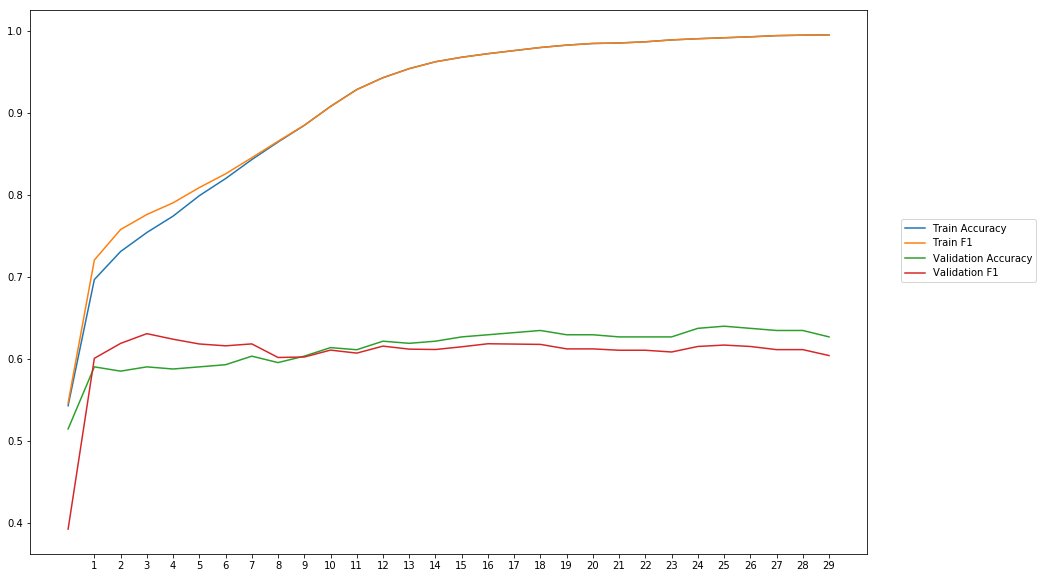

Average Accuracy: 61.36%
Average Precision: 61.72%
Average Recall: 59.90%
Average F1: 60.57%

-----Fold 7--------


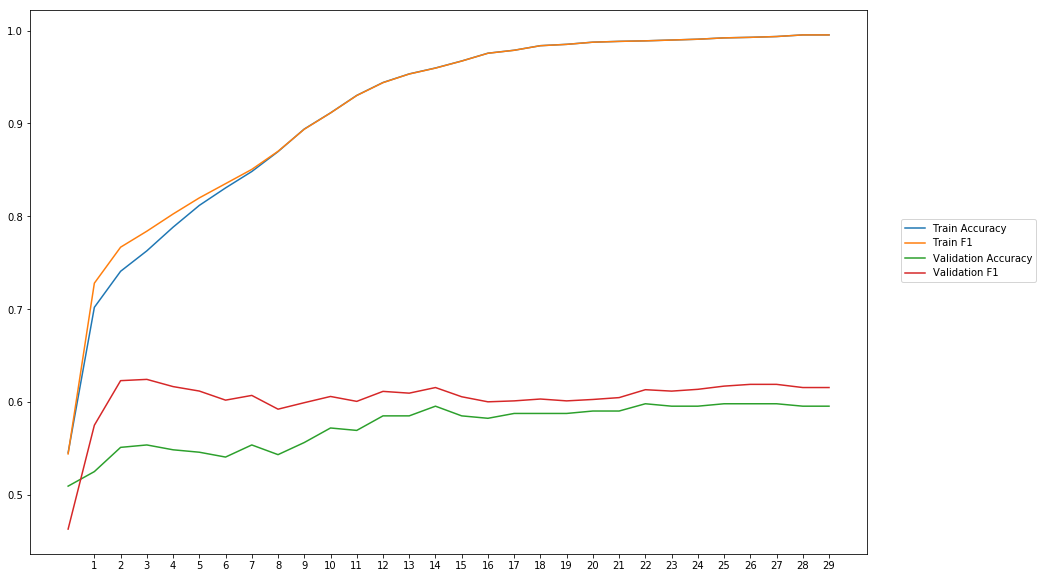

Average Accuracy: 57.38%
Average Precision: 56.40%
Average Recall: 65.17%
Average F1: 60.32%

-----Fold 8--------


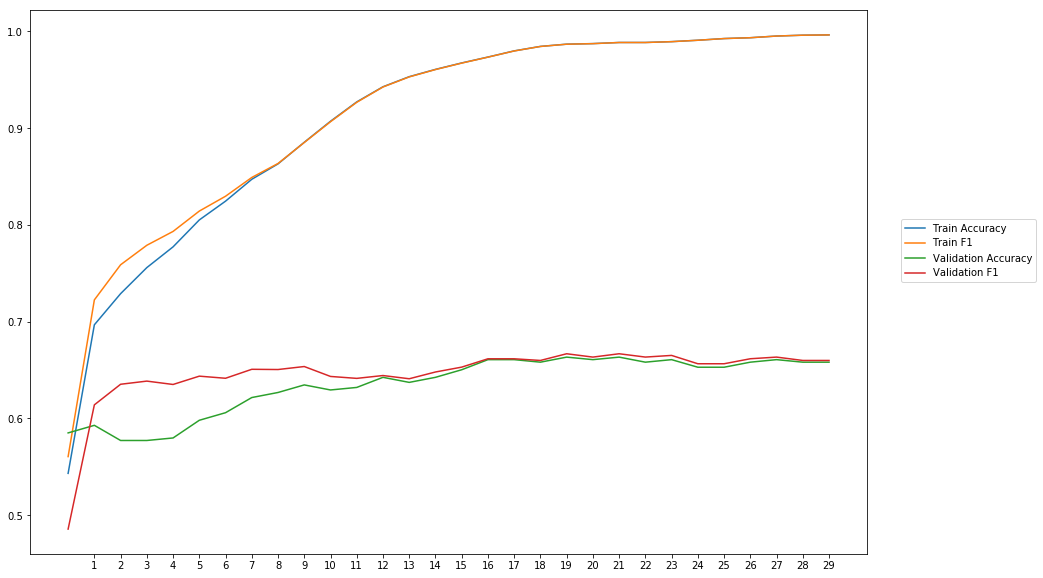

Average Accuracy: 63.52%
Average Precision: 62.83%
Average Recall: 67.02%
Average F1: 64.60%

-----Fold 9--------


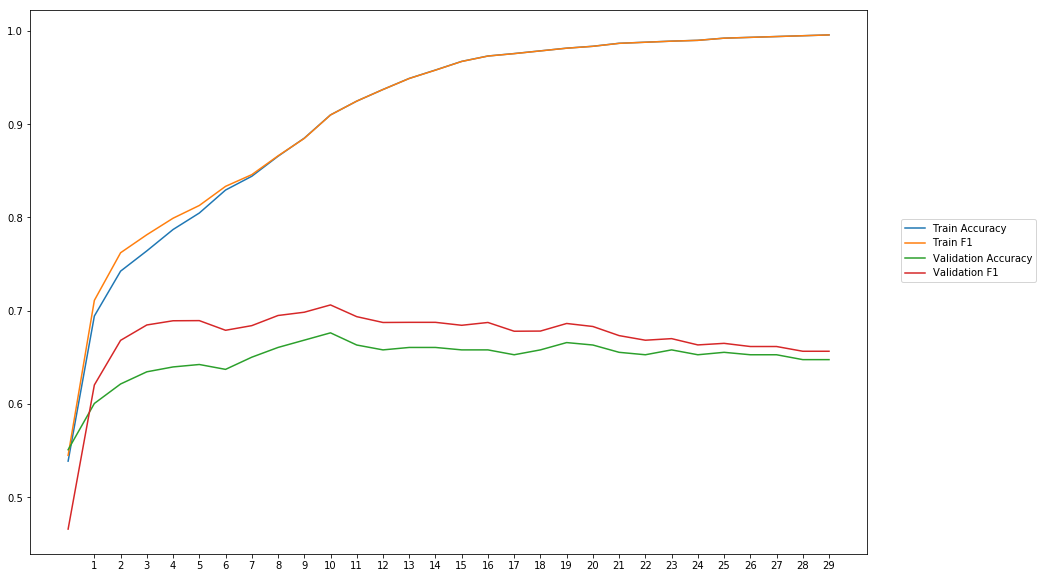

Average Accuracy: 64.85%
Average Precision: 62.83%
Average Recall: 72.27%
Average F1: 67.03%

-----Fold 10--------


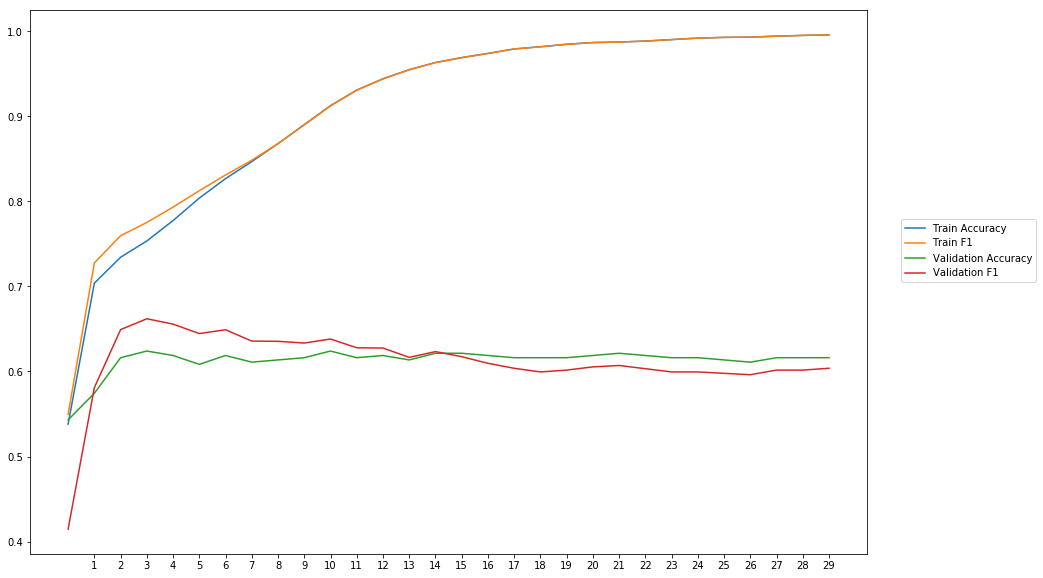

Average Accuracy: 61.31%
Average Precision: 61.16%
Average Recall: 61.68%
Average F1: 61.14%

-------Overallresults-------


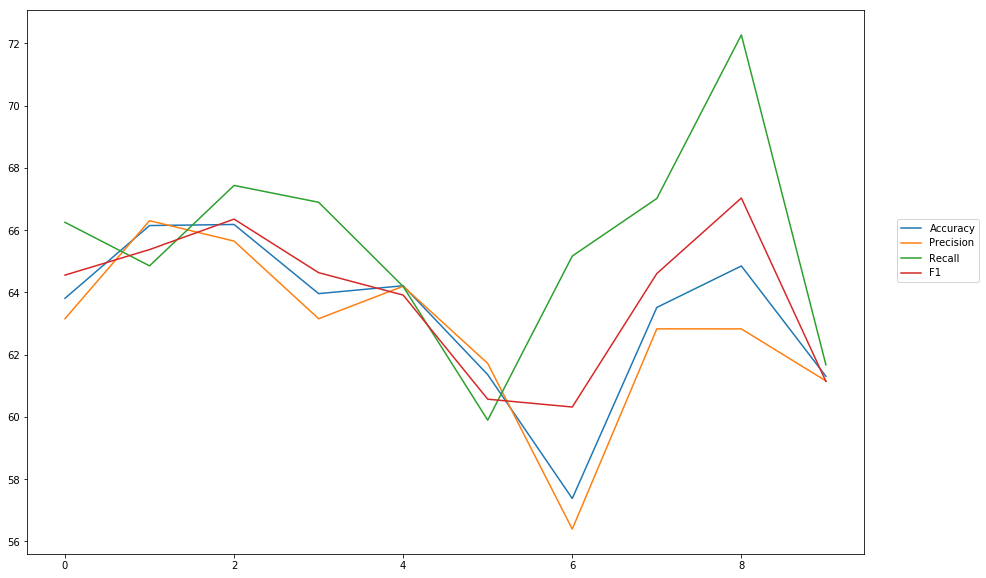

Accuracy: Mean = 63.27% (+/- 2.51%), Max = 66.18%, Min =  57.38%
Precision: Mean = 62.74% (+/- 2.60%), Max = 66.30%, Min =  56.40%
Recall: Mean = 65.56% (+/- 3.20%), Max = 72.27%, Min =  59.90%
F1: Mean = 63.85% (+/- 2.26%), Max = 67.03%, Min =  60.32%


In [49]:
cross_val(model_9, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'EmbeddingOnData_skip_300_3')

## Skipgram Dim 50, window 5

In [50]:
EMBEDDING_DIM=50

word_vectors_10 = skipmodel_50_5.wv

embedding_matrix_10 = np.zeros((len(word_index)+1, EMBEDDING_DIM))

for word, i in word_index.items():
    try:
        embedding_vector = word_vectors_10[word]
        embedding_matrix_10[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

In [51]:
wv_layer_10 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix_10],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)
#Input Layer
comment_input_10 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float32')

#Embedding Layer
embedded_sequences_10 = wv_layer_10(comment_input_10)

#First Dense Layer
x_10 = Dense(600, activation='relu')(embedded_sequences_10)

x_10 = Flatten()(x_10)

#Output (Dense) Layer
preds_10 = Dense(2, activation='softmax')(x_10)

# build the model
model_10 = Model(inputs=[comment_input_10], outputs=preds_10)


-----Fold 1--------


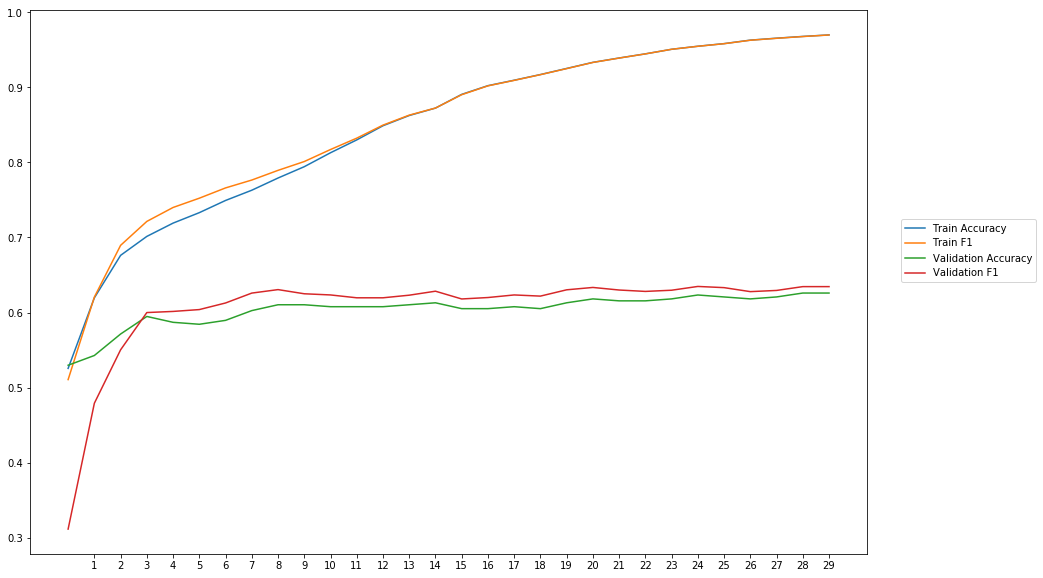

Average Accuracy: 60.36%
Average Precision: 59.78%
Average Recall: 62.26%
Average F1: 60.62%

-----Fold 2--------


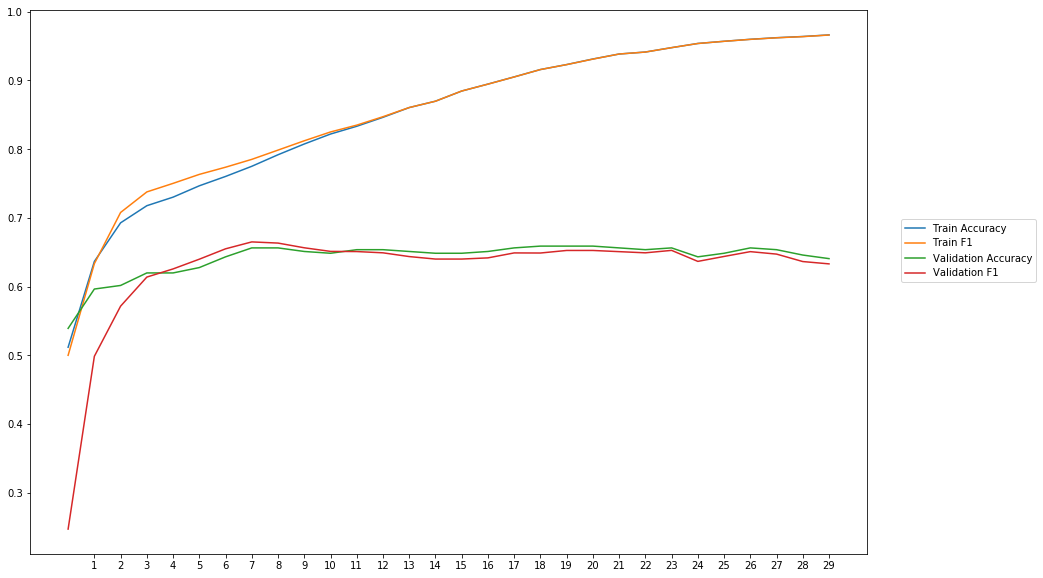

Average Accuracy: 64.18%
Average Precision: 64.74%
Average Recall: 61.61%
Average F1: 62.52%

-----Fold 3--------


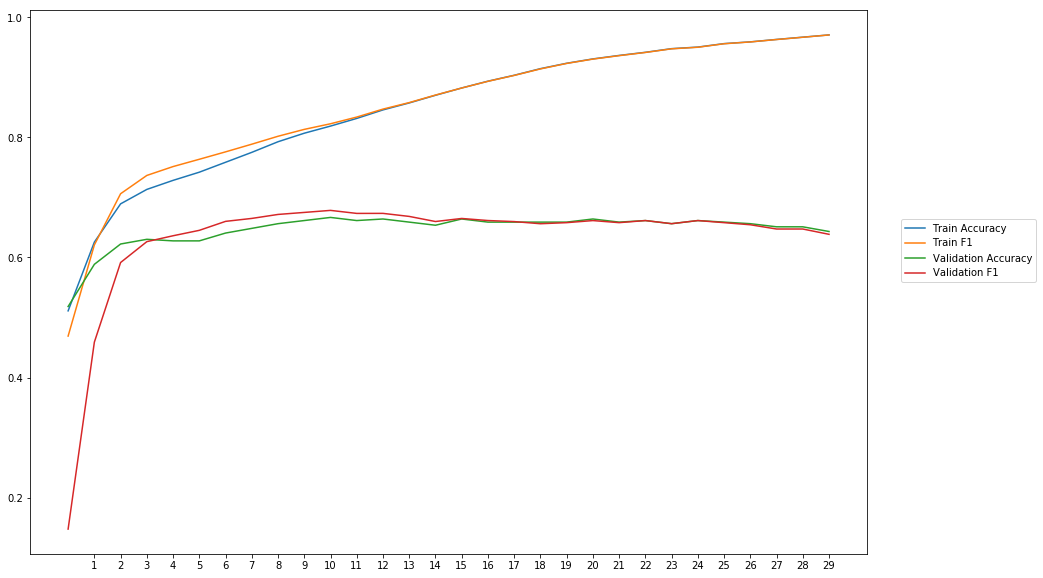

Average Accuracy: 64.63%
Average Precision: 64.64%
Average Recall: 63.65%
Average F1: 63.25%

-----Fold 4--------


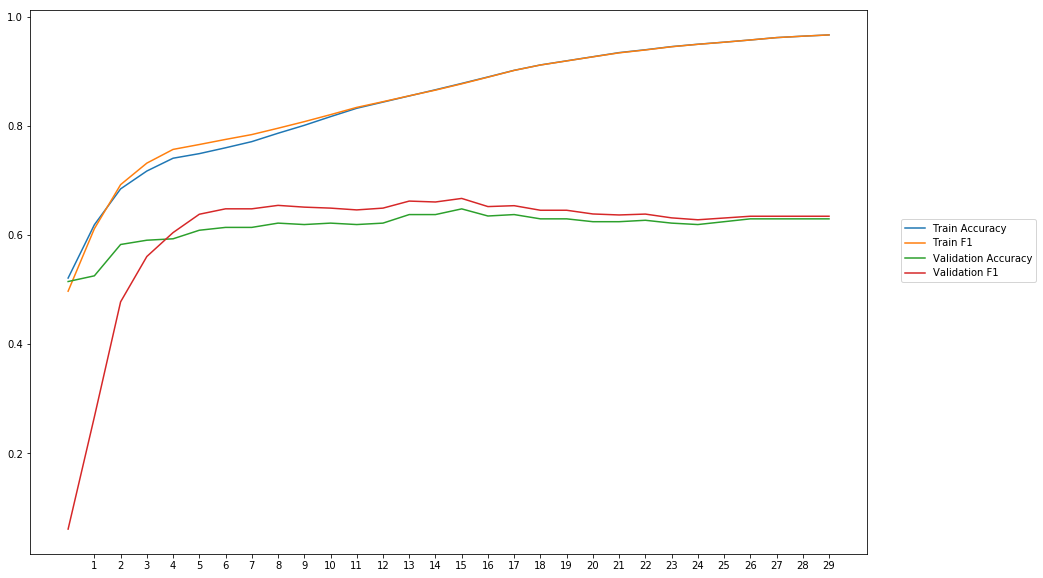

Average Accuracy: 61.50%
Average Precision: 61.94%
Average Recall: 62.41%
Average F1: 60.24%

-----Fold 5--------


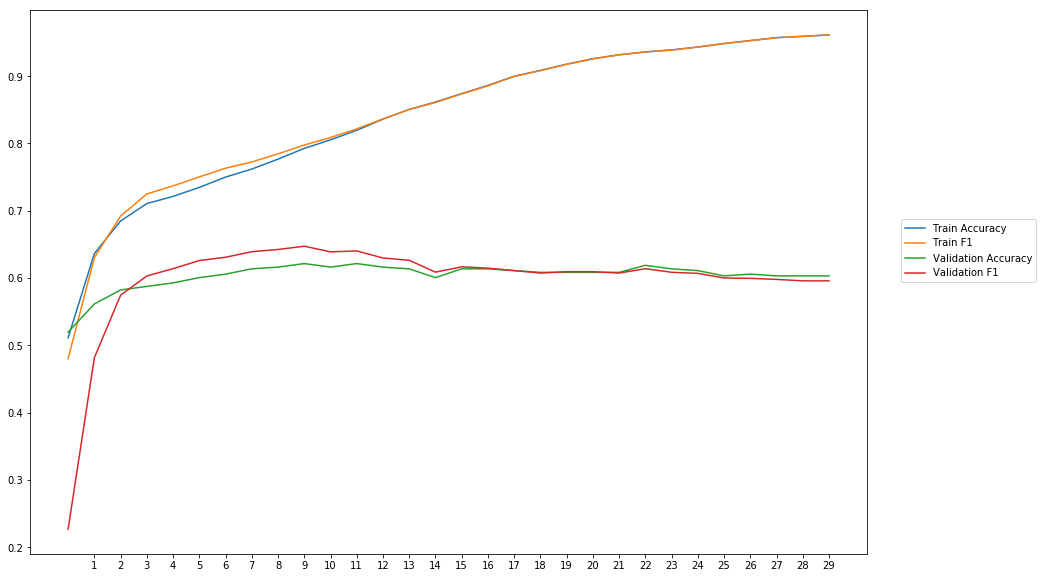

Average Accuracy: 60.34%
Average Precision: 60.12%
Average Recall: 60.51%
Average F1: 59.74%

-----Fold 6--------


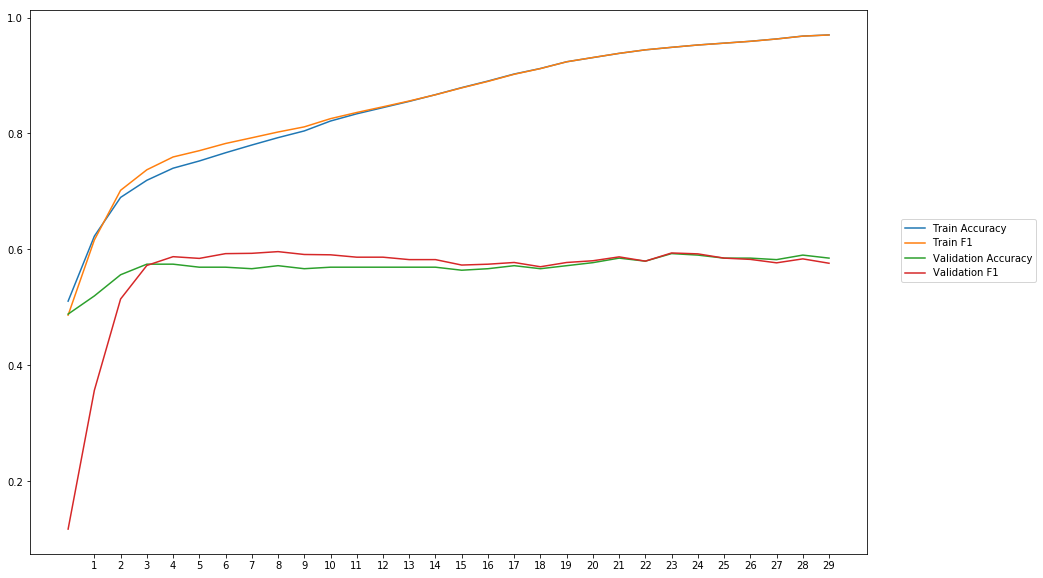

Average Accuracy: 56.98%
Average Precision: 56.49%
Average Recall: 56.40%
Average F1: 55.80%

-----Fold 7--------


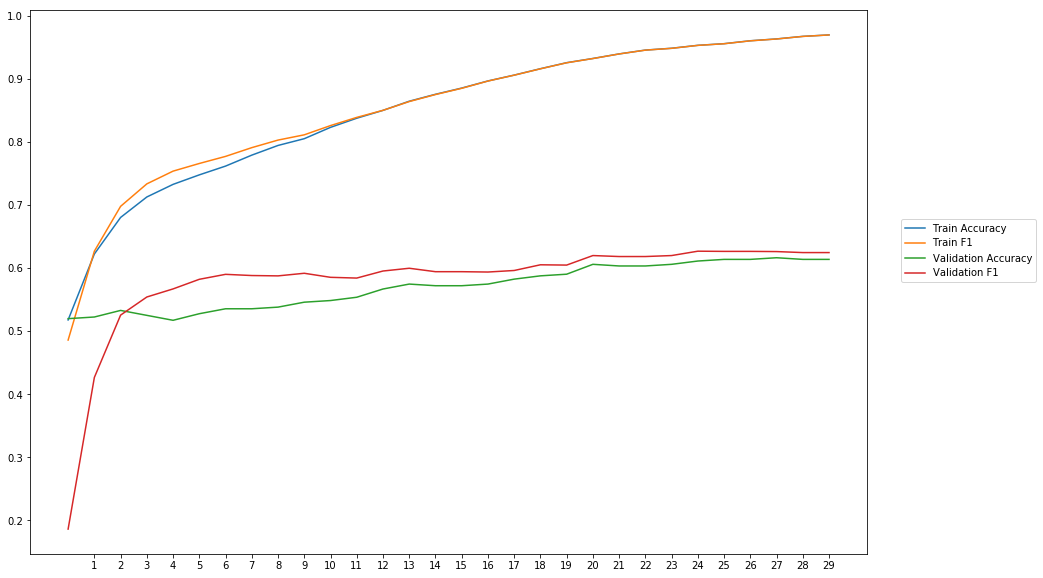

Average Accuracy: 57.06%
Average Precision: 56.63%
Average Recall: 60.96%
Average F1: 57.92%

-----Fold 8--------


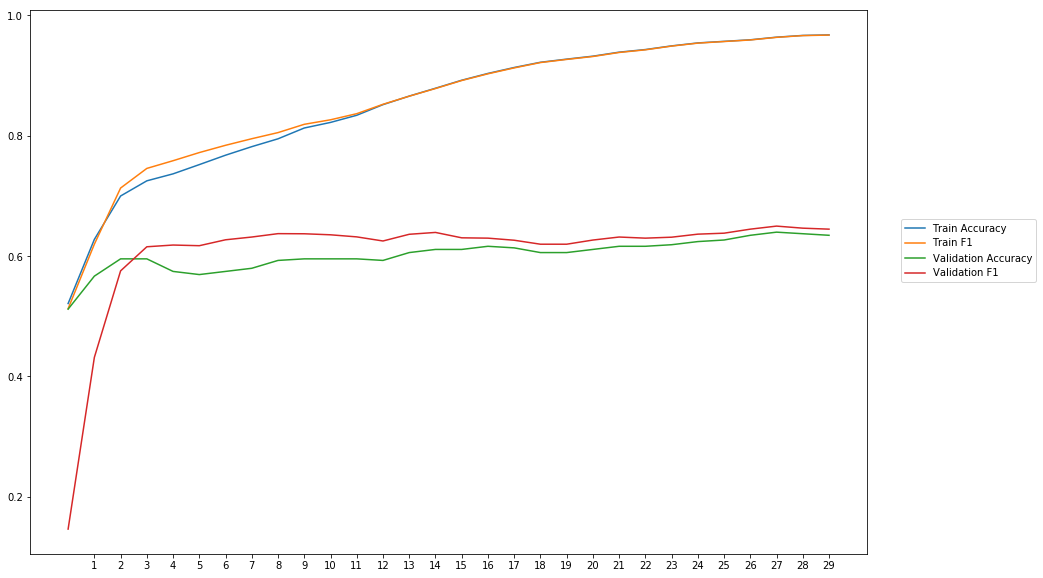

Average Accuracy: 60.22%
Average Precision: 59.51%
Average Recall: 64.00%
Average F1: 60.70%

-----Fold 9--------


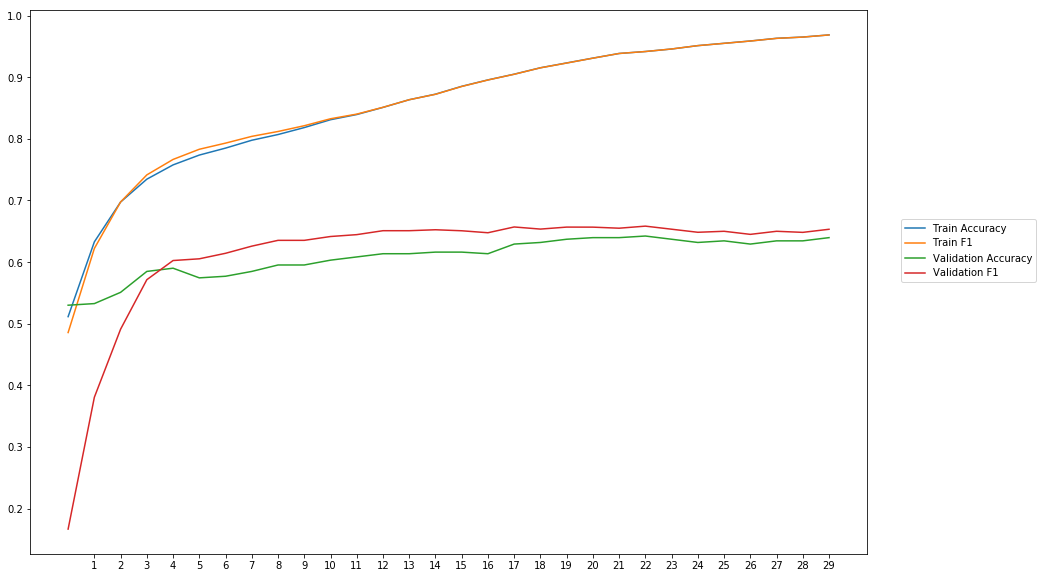

Average Accuracy: 60.87%
Average Precision: 60.30%
Average Recall: 64.62%
Average F1: 61.18%

-----Fold 10--------


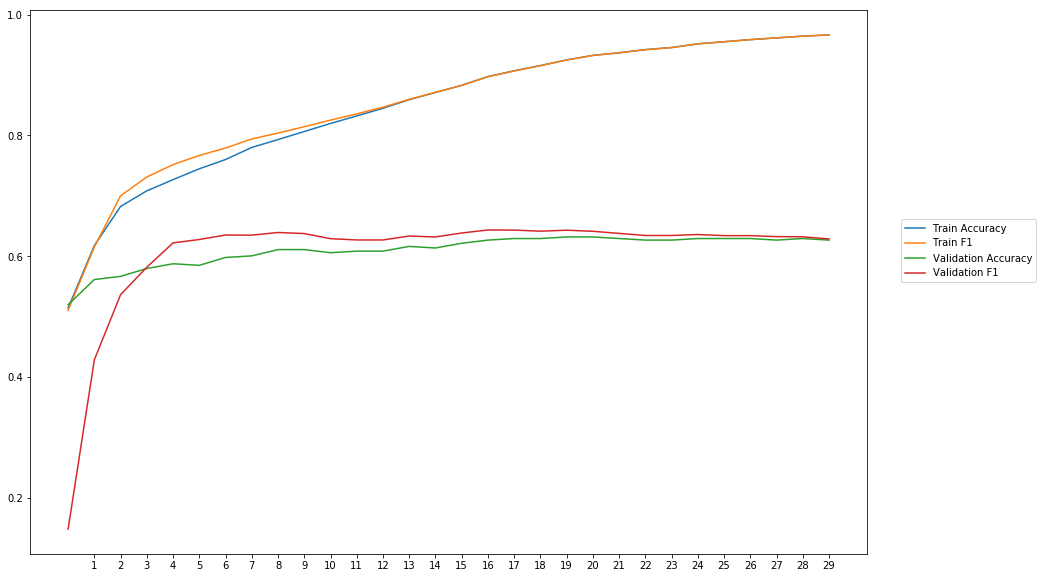

Average Accuracy: 60.98%
Average Precision: 60.68%
Average Recall: 62.64%
Average F1: 60.64%

-------Overallresults-------


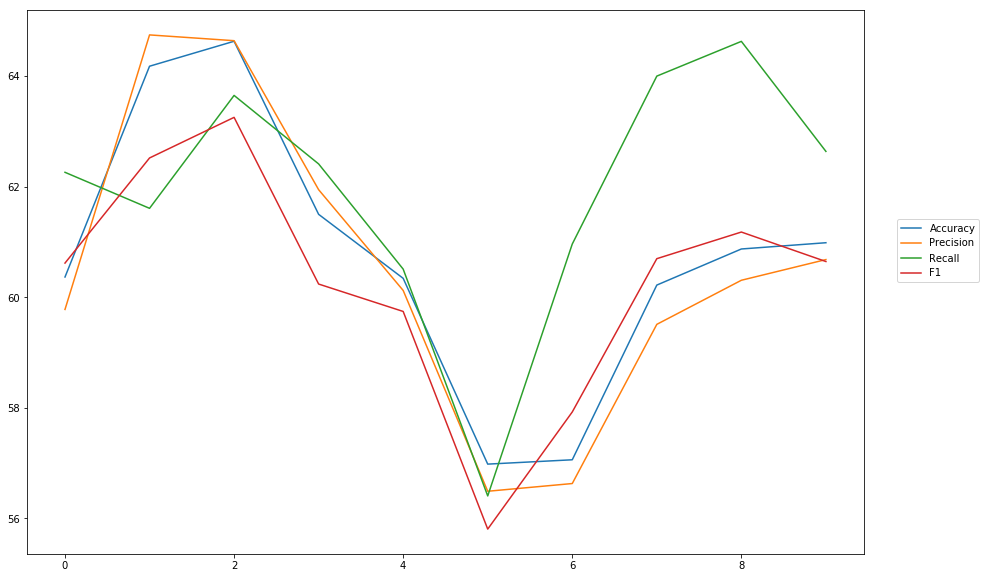

Accuracy: Mean = 60.71% (+/- 2.36%), Max = 64.63%, Min =  56.98%
Precision: Mean = 60.48% (+/- 2.65%), Max = 64.74%, Min =  56.49%
Recall: Mean = 61.90% (+/- 2.21%), Max = 64.62%, Min =  56.40%
F1: Mean = 60.26% (+/- 2.02%), Max = 63.25%, Min =  55.80%


In [52]:
cross_val(model_10, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'EmbeddingOnData_skip_50_5')

## Skipgram Dim 100, window 5

In [53]:
EMBEDDING_DIM=100

word_vectors_11 = skipmodel_100_5.wv

embedding_matrix_11 = np.zeros((len(word_index)+1, EMBEDDING_DIM))

for word, i in word_index.items():
    try:
        embedding_vector = word_vectors_11[word]
        embedding_matrix_11[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

In [54]:
wv_layer_11 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix_11],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)
#Input Layer
comment_input_11 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float32')

#Embedding Layer
embedded_sequences_11 = wv_layer_11(comment_input_11)

#First Dense Layer
x_11 = Dense(600, activation='relu')(embedded_sequences_11)

x_11 = Flatten()(x_11)

#Output (Dense) Layer
preds_11 = Dense(2, activation='softmax')(x_11)

# build the model
model_11 = Model(inputs=[comment_input_11], outputs=preds_11)


-----Fold 1--------


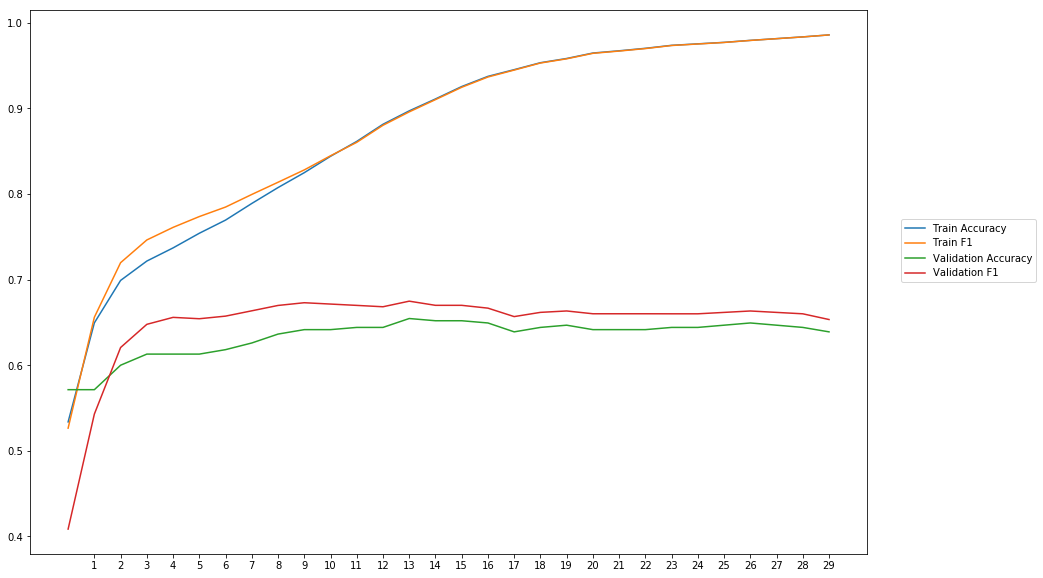

Average Accuracy: 63.37%
Average Precision: 62.05%
Average Recall: 68.80%
Average F1: 64.89%

-----Fold 2--------


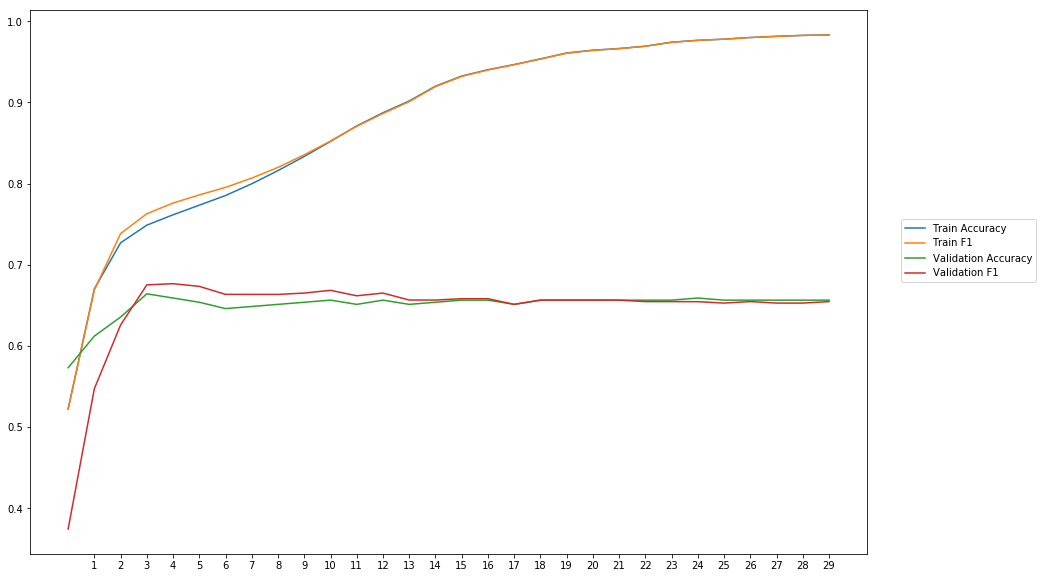

Average Accuracy: 65.02%
Average Precision: 64.91%
Average Recall: 64.99%
Average F1: 64.52%

-----Fold 3--------


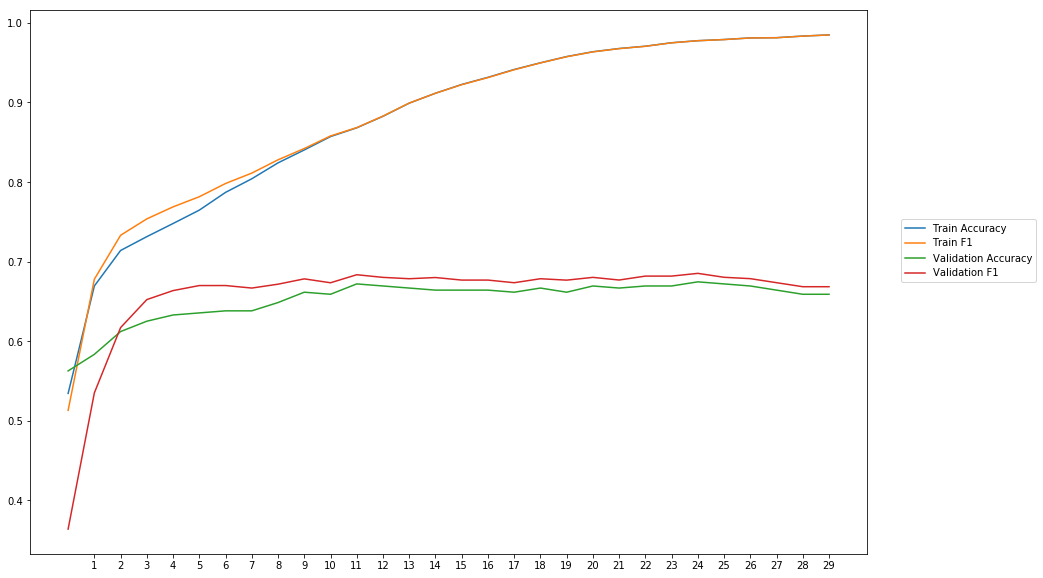

Average Accuracy: 65.19%
Average Precision: 64.08%
Average Recall: 68.52%
Average F1: 65.79%

-----Fold 4--------


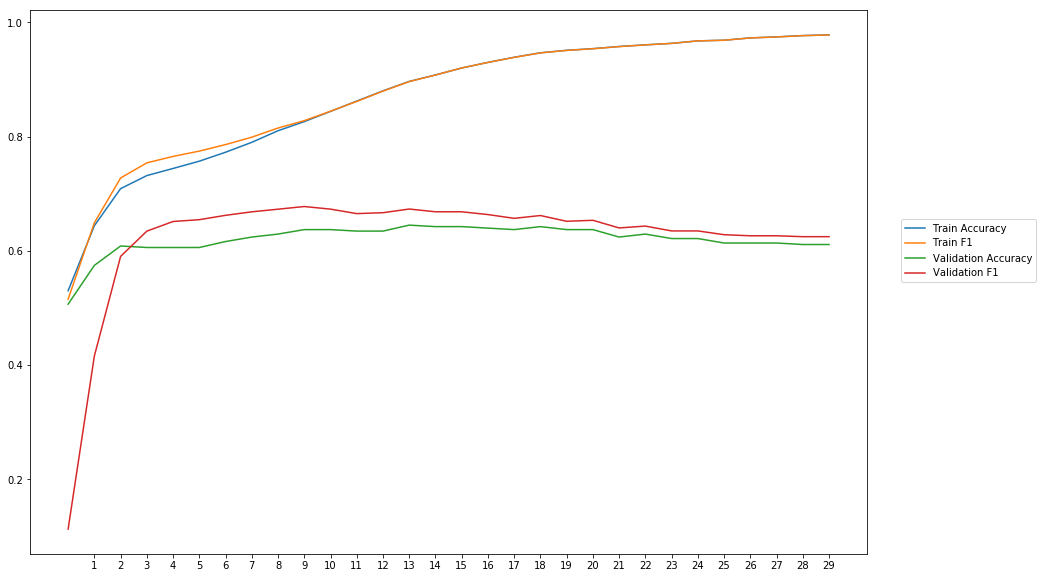

Average Accuracy: 62.00%
Average Precision: 60.87%
Average Recall: 66.40%
Average F1: 62.41%

-----Fold 5--------


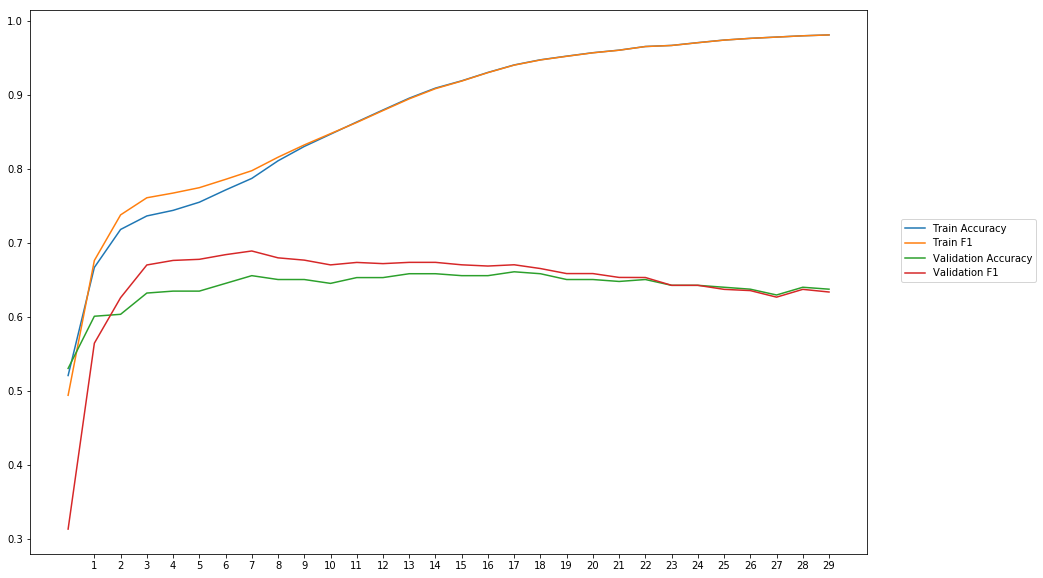

Average Accuracy: 63.99%
Average Precision: 63.00%
Average Recall: 67.14%
Average F1: 64.55%

-----Fold 6--------


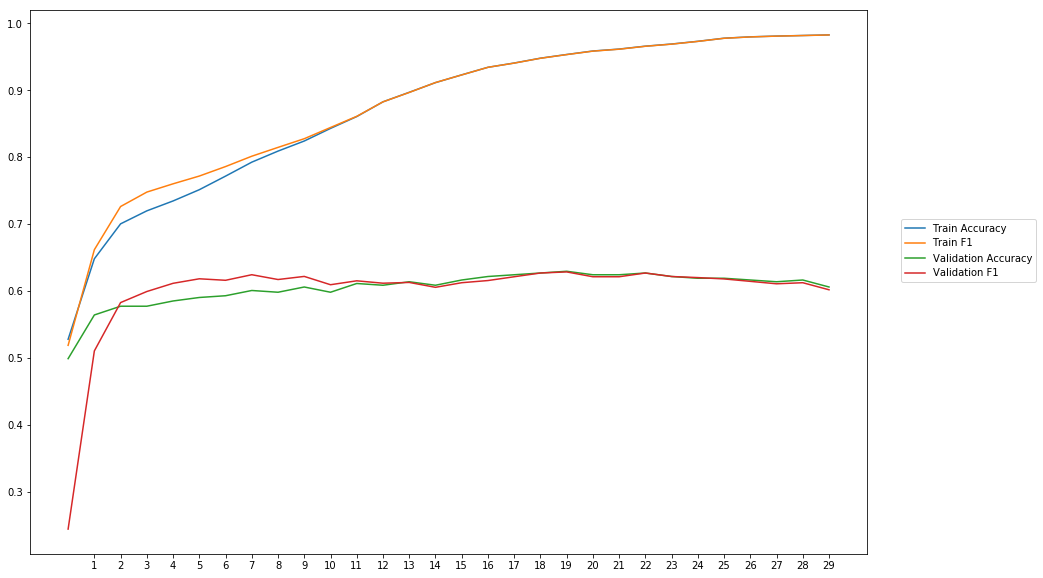

Average Accuracy: 60.44%
Average Precision: 60.14%
Average Recall: 60.35%
Average F1: 59.89%

-----Fold 7--------


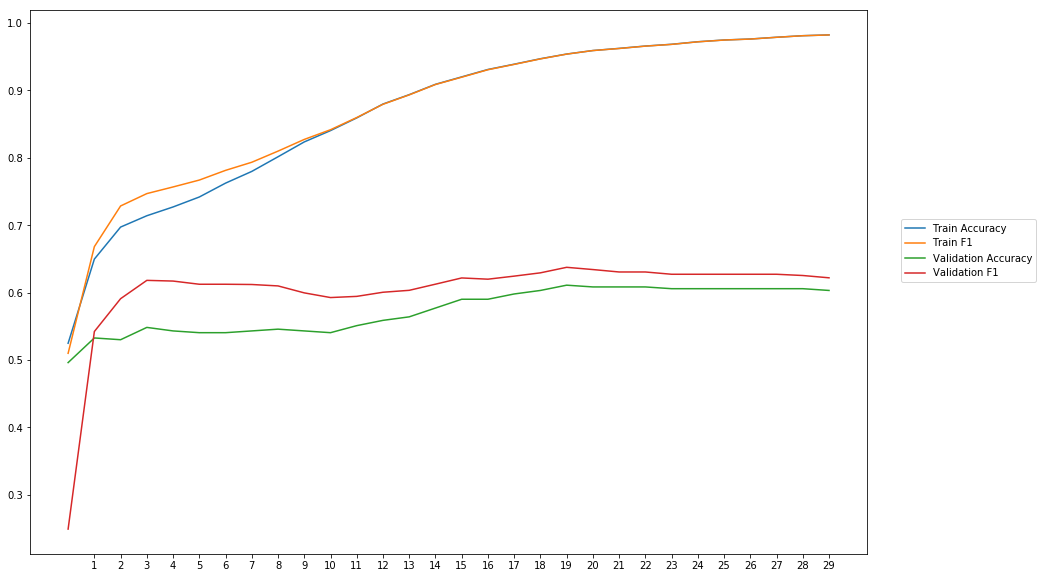

Average Accuracy: 57.36%
Average Precision: 56.17%
Average Recall: 66.06%
Average F1: 60.26%

-----Fold 8--------


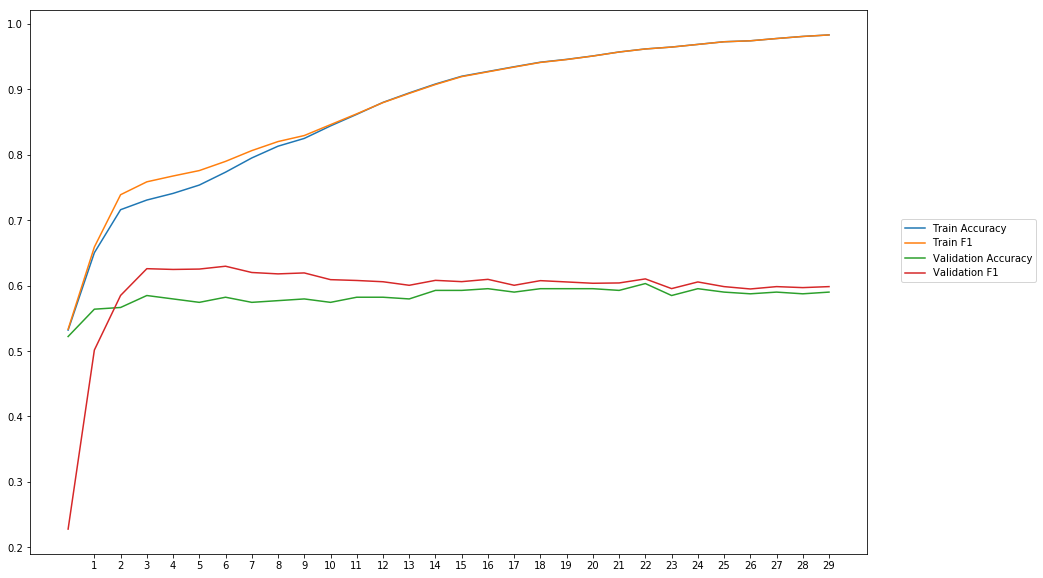

Average Accuracy: 58.34%
Average Precision: 57.75%
Average Recall: 61.99%
Average F1: 59.15%

-----Fold 9--------


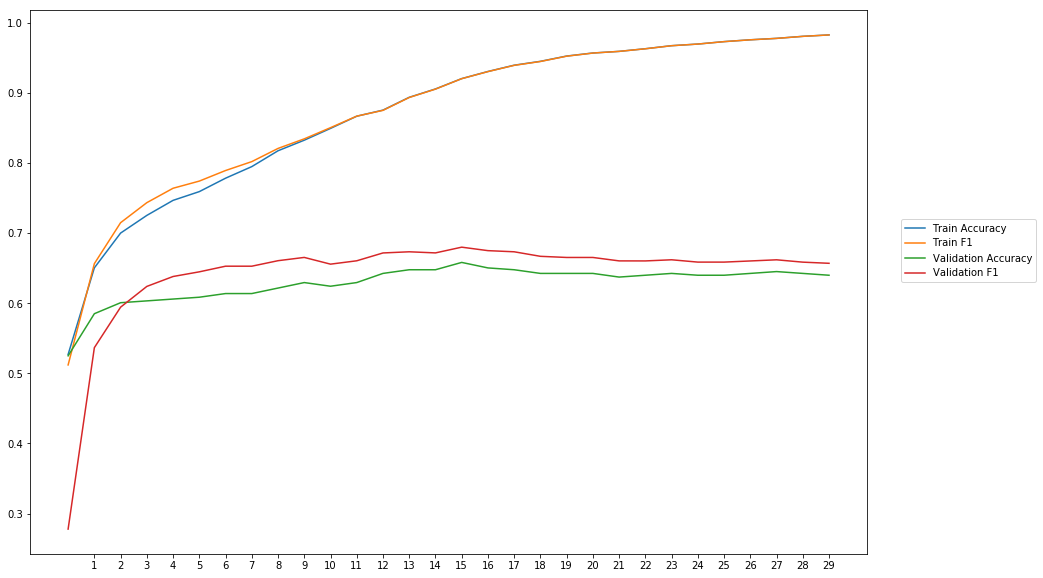

Average Accuracy: 62.82%
Average Precision: 61.37%
Average Recall: 68.25%
Average F1: 64.12%

-----Fold 10--------


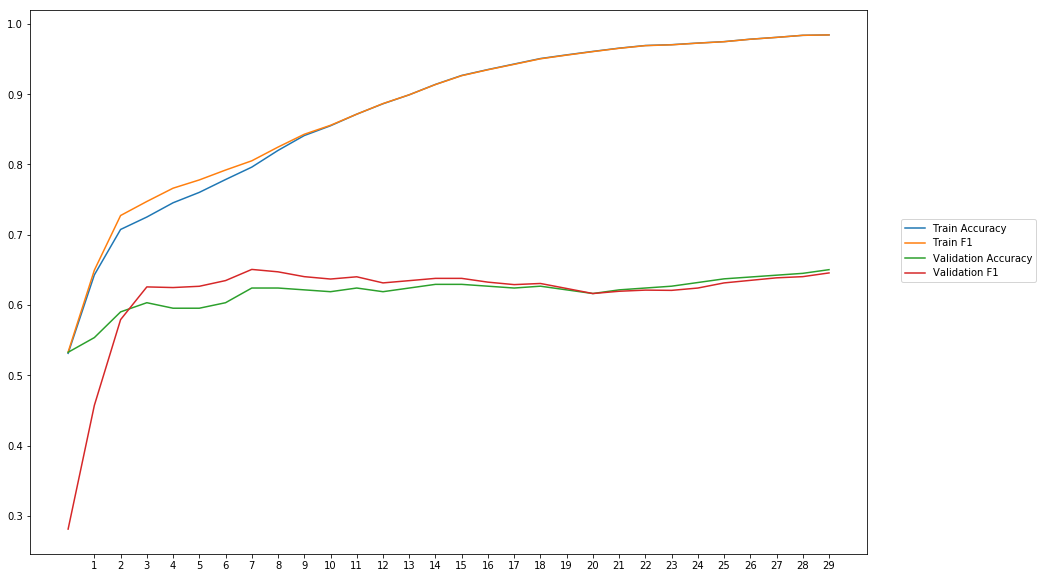

Average Accuracy: 61.73%
Average Precision: 61.53%
Average Recall: 62.16%
Average F1: 61.31%

-------Overallresults-------


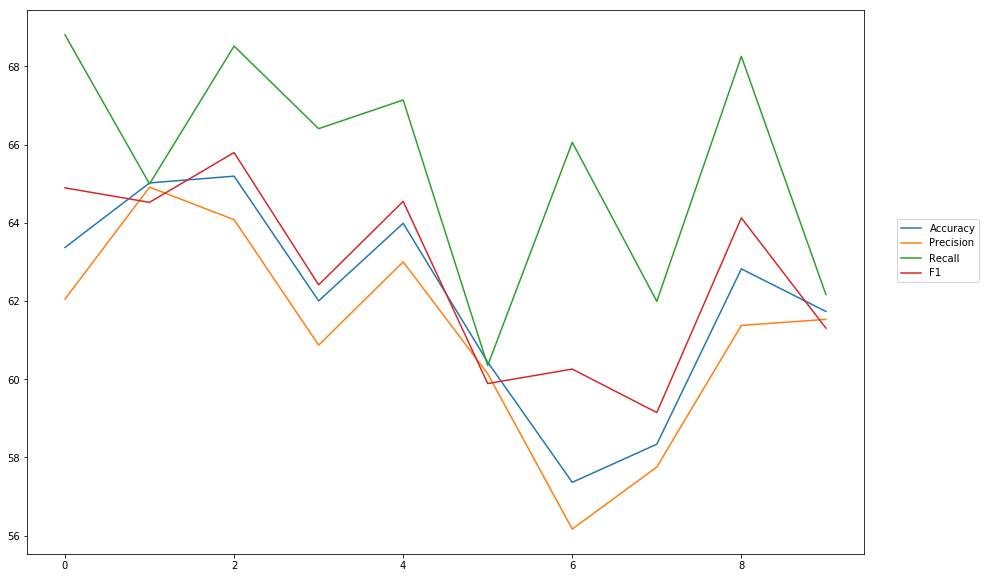

Accuracy: Mean = 62.03% (+/- 2.51%), Max = 65.19%, Min =  57.36%
Precision: Mean = 61.19% (+/- 2.54%), Max = 64.91%, Min =  56.17%
Recall: Mean = 65.47% (+/- 2.86%), Max = 68.80%, Min =  60.35%
F1: Mean = 62.69% (+/- 2.27%), Max = 65.79%, Min =  59.15%


In [55]:
cross_val(model_11, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'EmbeddingOnData_skip_100_5')

## Skipgram Dim 300, window 5

In [20]:
EMBEDDING_DIM=300

word_vectors_12 = skipmodel_300_5.wv

embedding_matrix_12 = np.zeros((len(word_index)+1, EMBEDDING_DIM))

for word, i in word_index.items():
    try:
        embedding_vector = word_vectors_12[word]
        embedding_matrix_12[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

In [21]:
wv_layer_12 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix_12],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)
#Input Layer
comment_input_12 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float32')

#Embedding Layer
embedded_sequences_12 = wv_layer_12(comment_input_12)

#First Dense Layer
x_12 = Dense(600, activation='relu')(embedded_sequences_12)

x_12 = Flatten()(x_12)

#Output (Dense) Layer
preds_12 = Dense(2, activation='softmax')(x_12)

# build the model
model_12 = Model(inputs=[comment_input_12], outputs=preds_12)


-----Fold 1--------


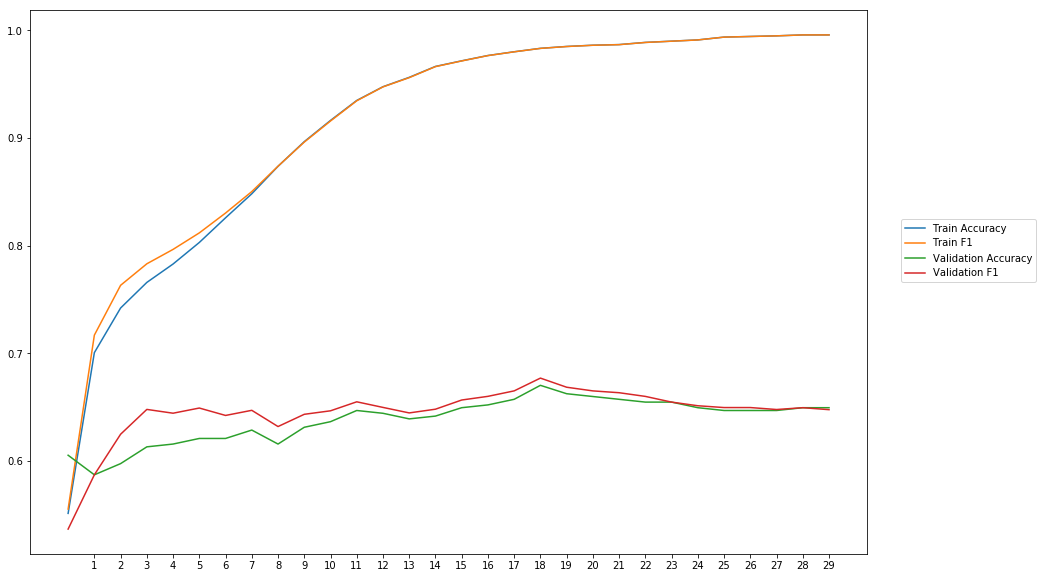

Average Accuracy: 63.83%
Average Precision: 63.19%
Average Recall: 66.16%
Average F1: 64.54%

-----Fold 2--------


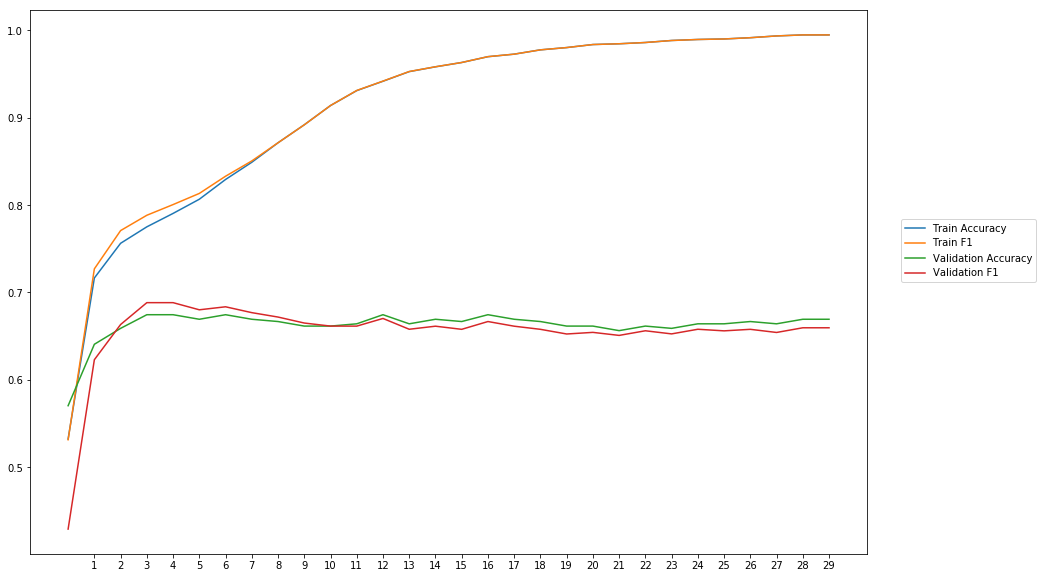

Average Accuracy: 66.22%
Average Precision: 66.39%
Average Recall: 64.92%
Average F1: 65.45%

-----Fold 3--------


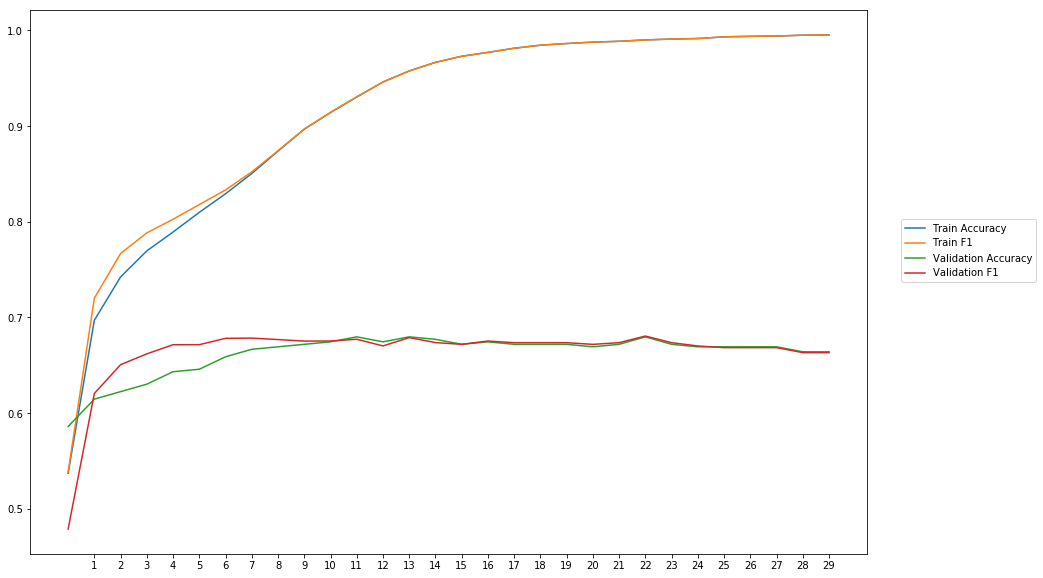

Average Accuracy: 66.18%
Average Precision: 65.64%
Average Recall: 67.45%
Average F1: 66.36%

-----Fold 4--------


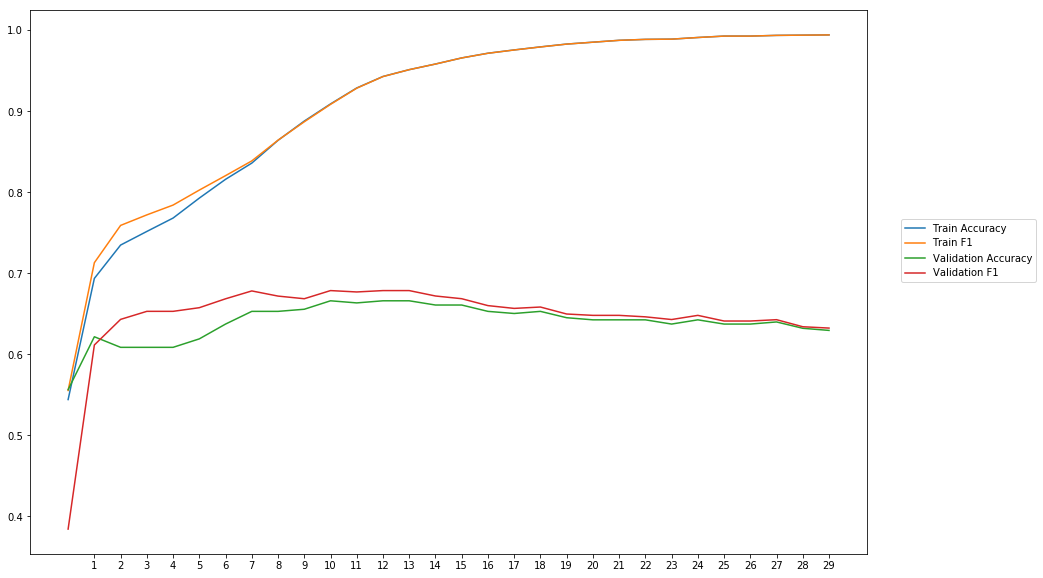

Average Accuracy: 63.94%
Average Precision: 63.14%
Average Recall: 66.88%
Average F1: 64.62%

-----Fold 5--------


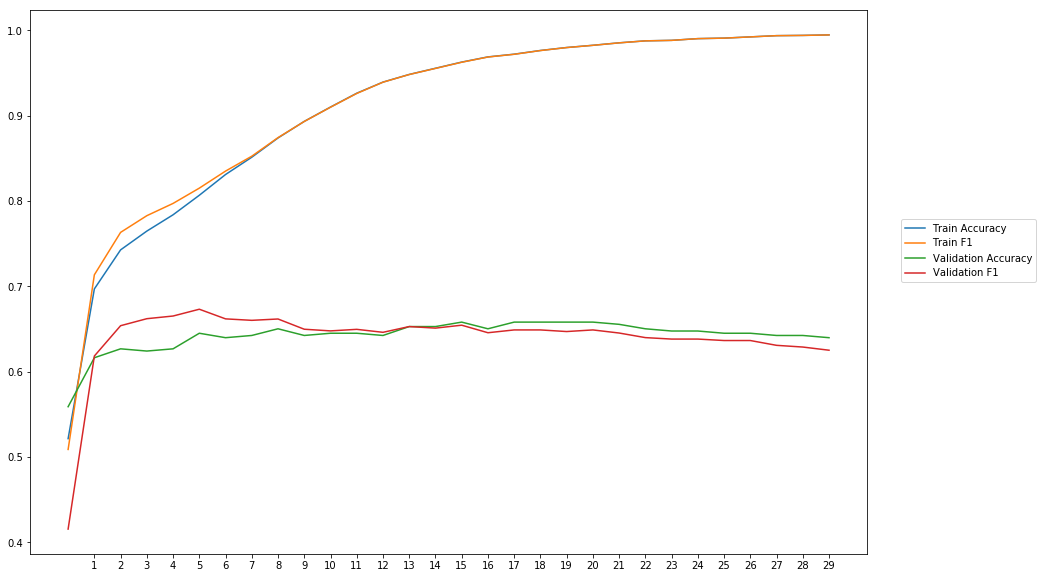

Average Accuracy: 64.21%
Average Precision: 64.19%
Average Recall: 64.22%
Average F1: 63.93%

-----Fold 6--------


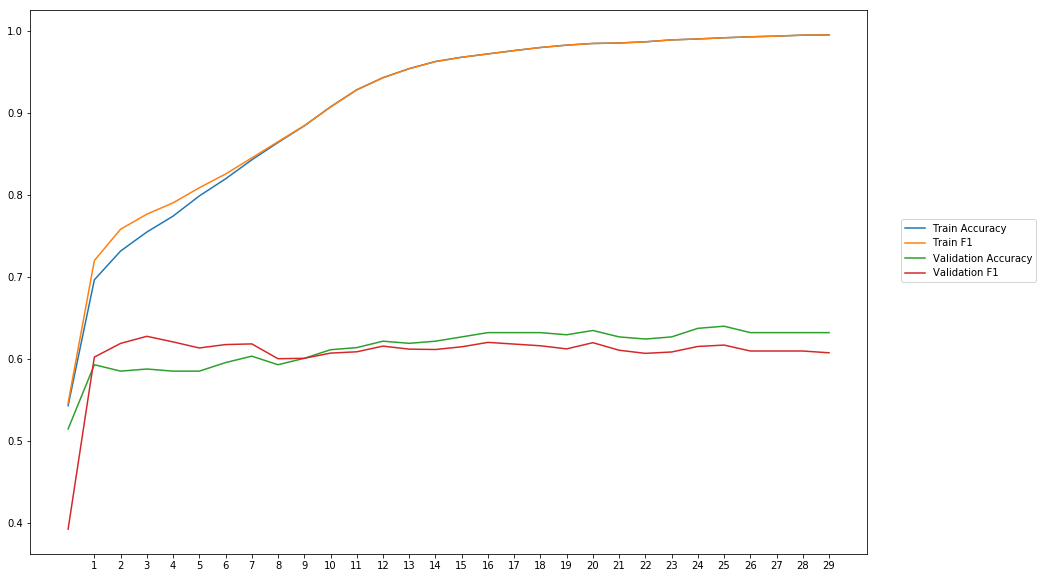

Average Accuracy: 61.31%
Average Precision: 61.68%
Average Recall: 59.83%
Average F1: 60.52%

-----Fold 7--------


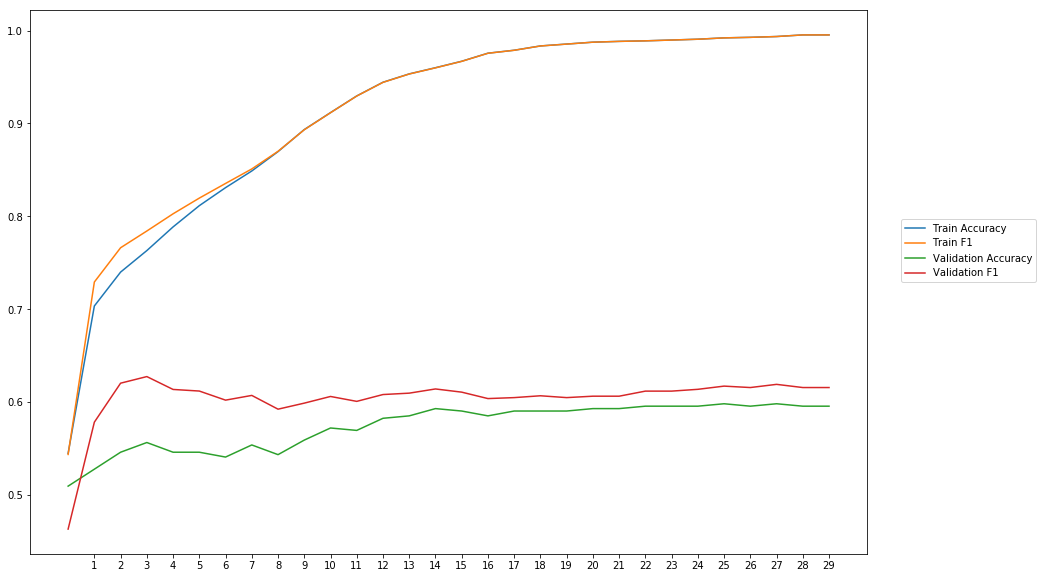

Average Accuracy: 57.42%
Average Precision: 56.43%
Average Recall: 65.24%
Average F1: 60.37%

-----Fold 8--------


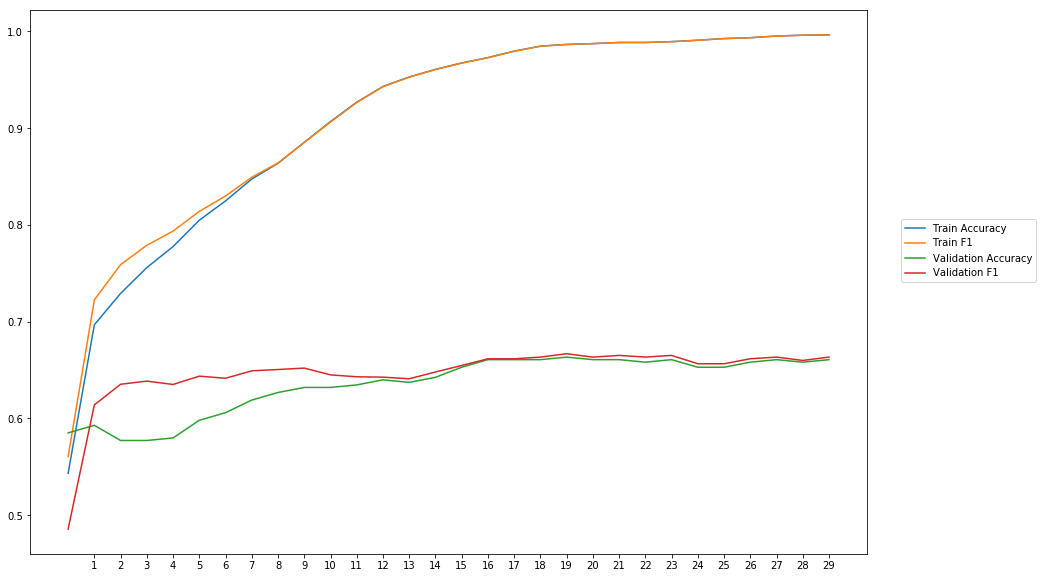

Average Accuracy: 63.52%
Average Precision: 62.83%
Average Recall: 67.05%
Average F1: 64.62%

-----Fold 9--------


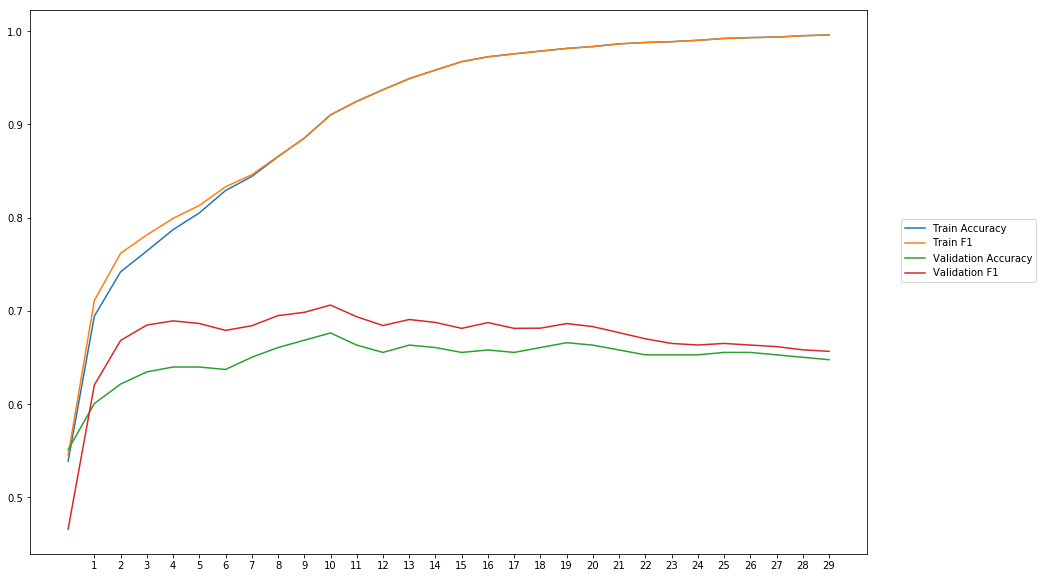

Average Accuracy: 64.86%
Average Precision: 62.83%
Average Recall: 72.29%
Average F1: 67.04%

-----Fold 10--------


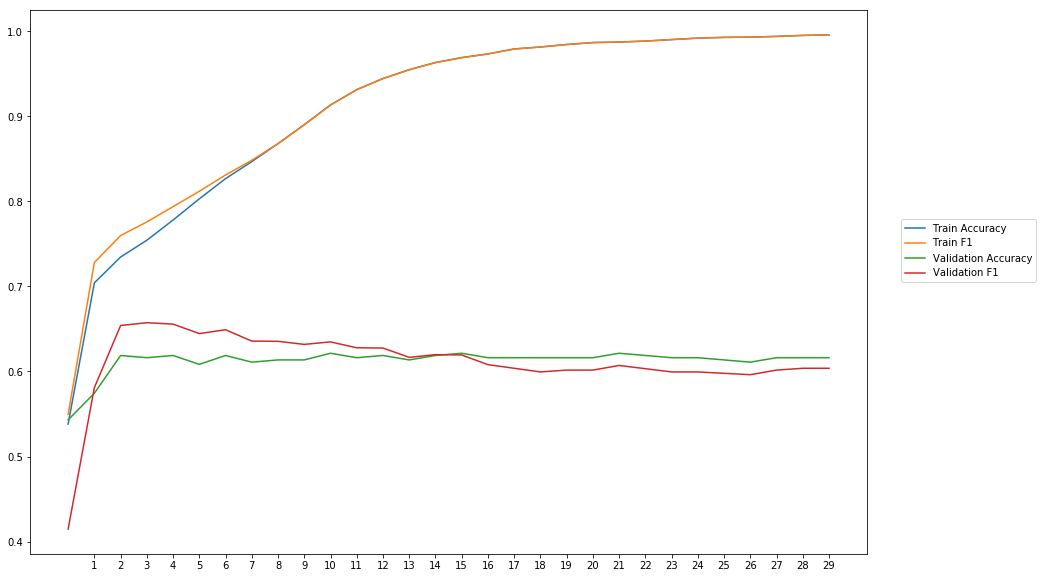

Average Accuracy: 61.24%
Average Precision: 61.08%
Average Recall: 61.69%
Average F1: 61.11%

-------Overallresults-------


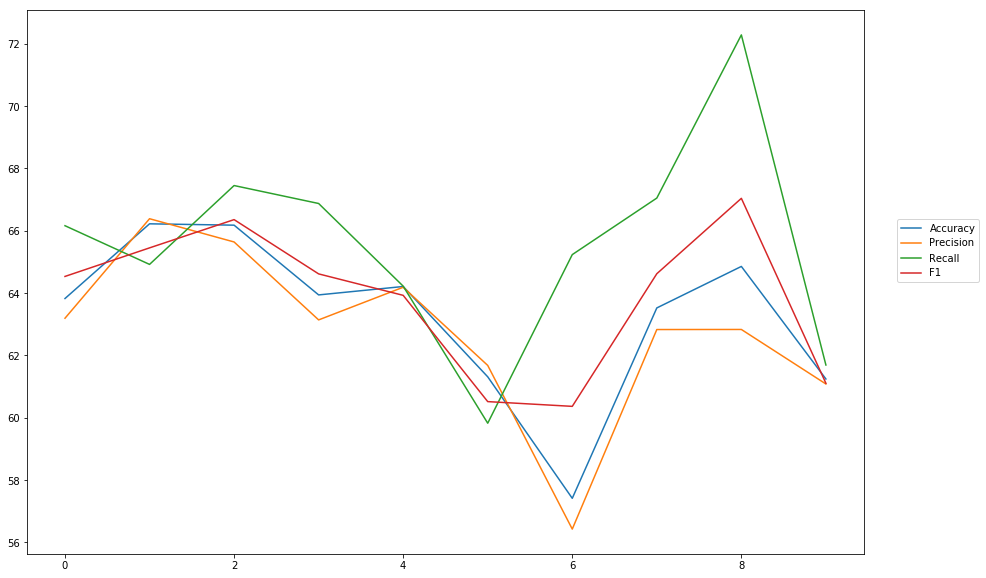

Accuracy: Mean = 63.27% (+/- 2.52%), Max = 66.22%, Min =  57.42%
Precision: Mean = 62.74% (+/- 2.61%), Max = 66.39%, Min =  56.43%
Recall: Mean = 65.57% (+/- 3.21%), Max = 72.29%, Min =  59.83%
F1: Mean = 63.85% (+/- 2.27%), Max = 67.04%, Min =  60.37%


In [58]:
cross_val(model_12, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'EmbeddingOnData_skip_300_5')

# Addition

## CBOW, 400 Dim, window 3

In [22]:
cbowmodel_400_5= Word2Vec(embeddingbasis, min_count = 1, size = 400, window = 5)

In [23]:
EMBEDDING_DIM=400

word_vectors_13 = cbowmodel_400_5.wv

embedding_matrix_13 = np.zeros((len(word_index)+1, EMBEDDING_DIM))

for word, i in word_index.items():
    try:
        embedding_vector = word_vectors_13[word]
        embedding_matrix_13[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

In [24]:
wv_layer_13 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix_13],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)
#Input Layer
comment_input_13 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float32')

#Embedding Layer
embedded_sequences_13 = wv_layer_13(comment_input_13)

#First Dense Layer
x_13 = Dense(600, activation='relu')(embedded_sequences_13)

x_13 = Flatten()(x_13)

#Output (Dense) Layer
preds_13 = Dense(2, activation='softmax')(x_13)

# build the model
model_13 = Model(inputs=[comment_input_13], outputs=preds_13)


-----Fold 1--------


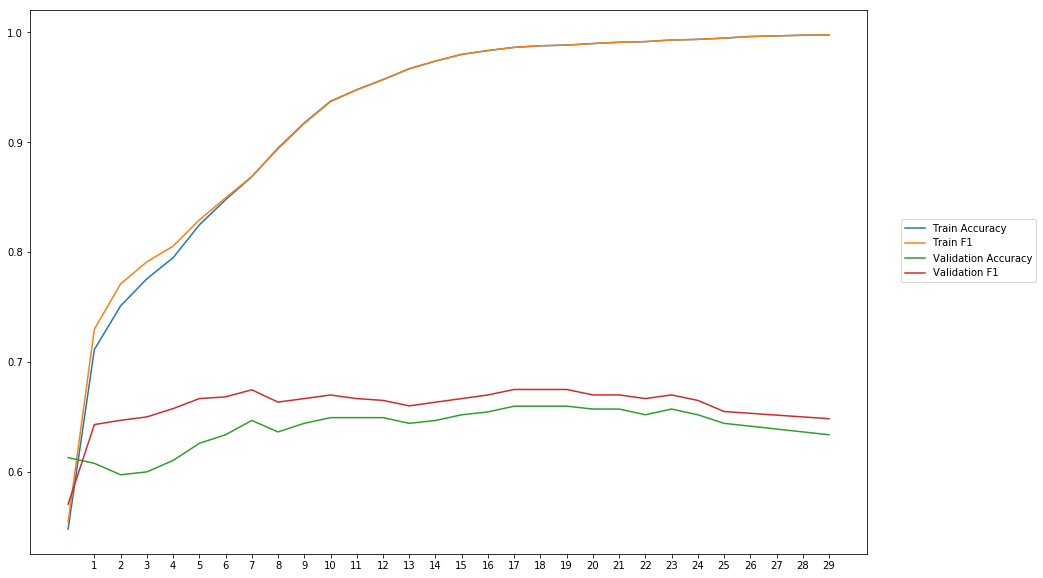

Average Accuracy: 64.03%
Average Precision: 62.55%
Average Recall: 70.05%
Average F1: 65.98%

-----Fold 2--------


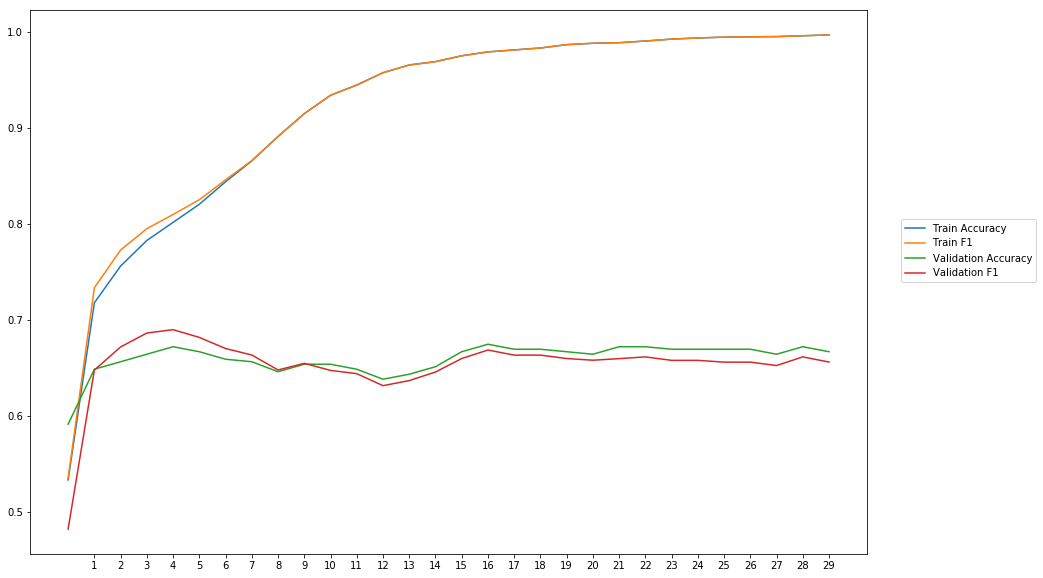

Average Accuracy: 65.94%
Average Precision: 66.12%
Average Recall: 64.82%
Average F1: 65.29%

-----Fold 3--------


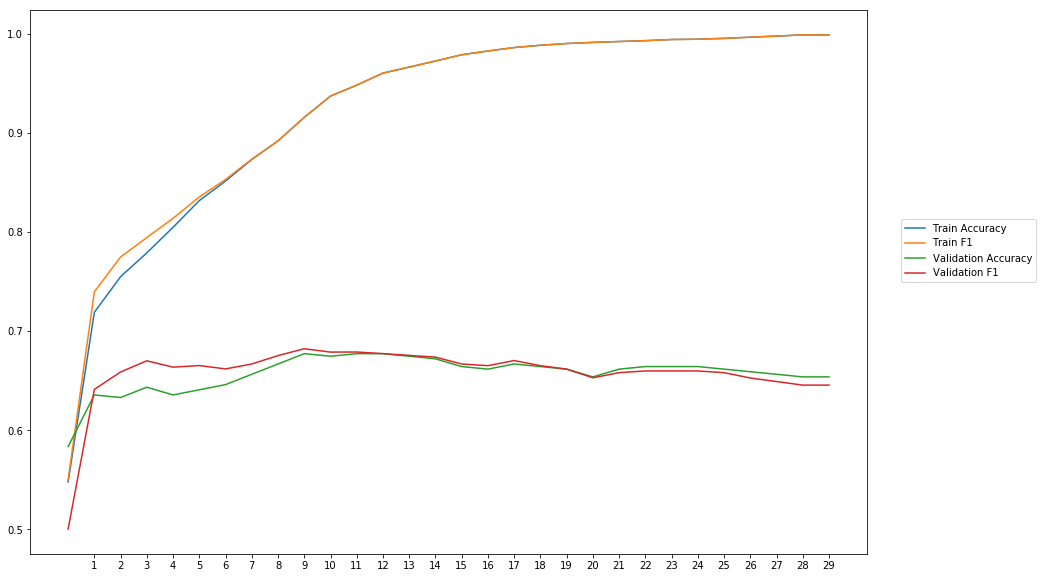

Average Accuracy: 65.67%
Average Precision: 65.19%
Average Recall: 66.65%
Average F1: 65.78%

-----Fold 4--------


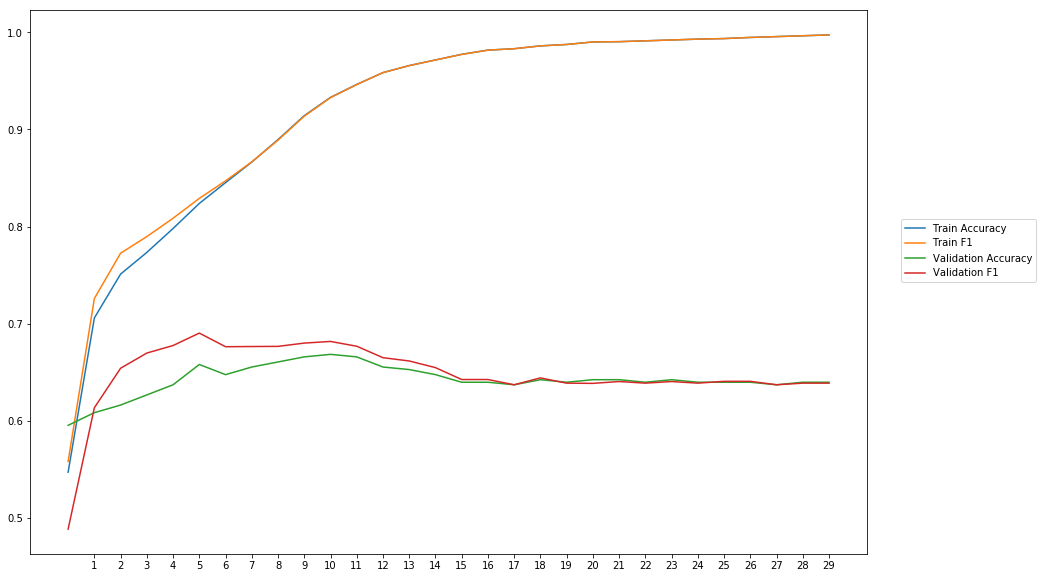

Average Accuracy: 64.20%
Average Precision: 63.55%
Average Recall: 66.60%
Average F1: 64.80%

-----Fold 5--------


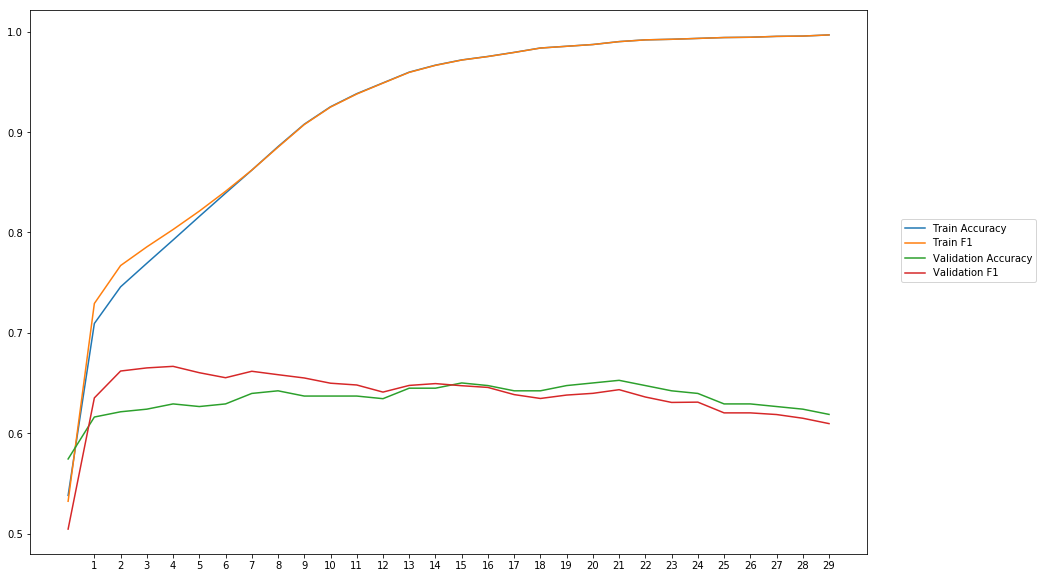

Average Accuracy: 63.43%
Average Precision: 63.05%
Average Recall: 64.89%
Average F1: 63.77%

-----Fold 6--------


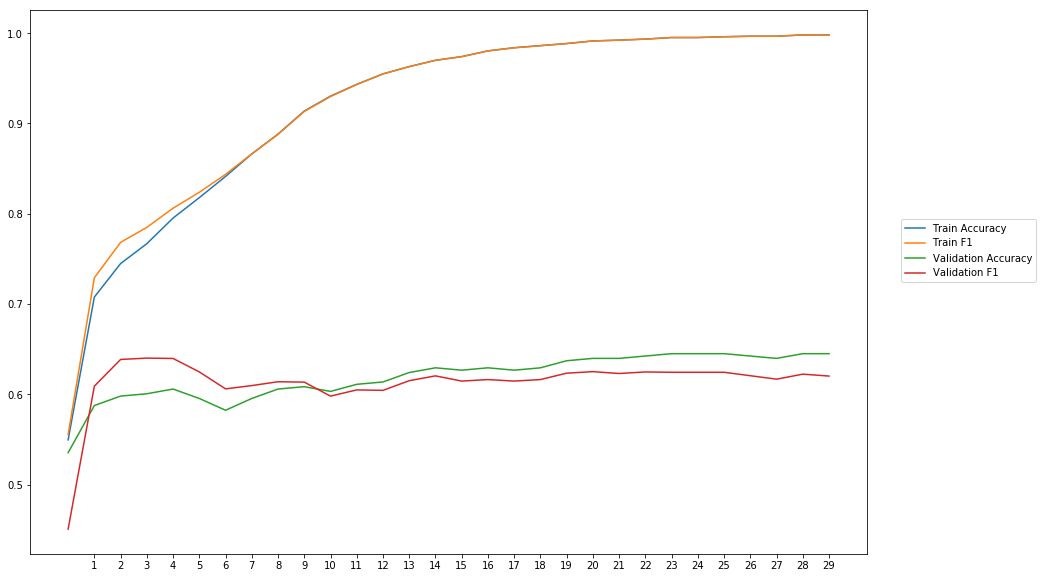

Average Accuracy: 61.91%
Average Precision: 62.28%
Average Recall: 60.80%
Average F1: 61.32%

-----Fold 7--------


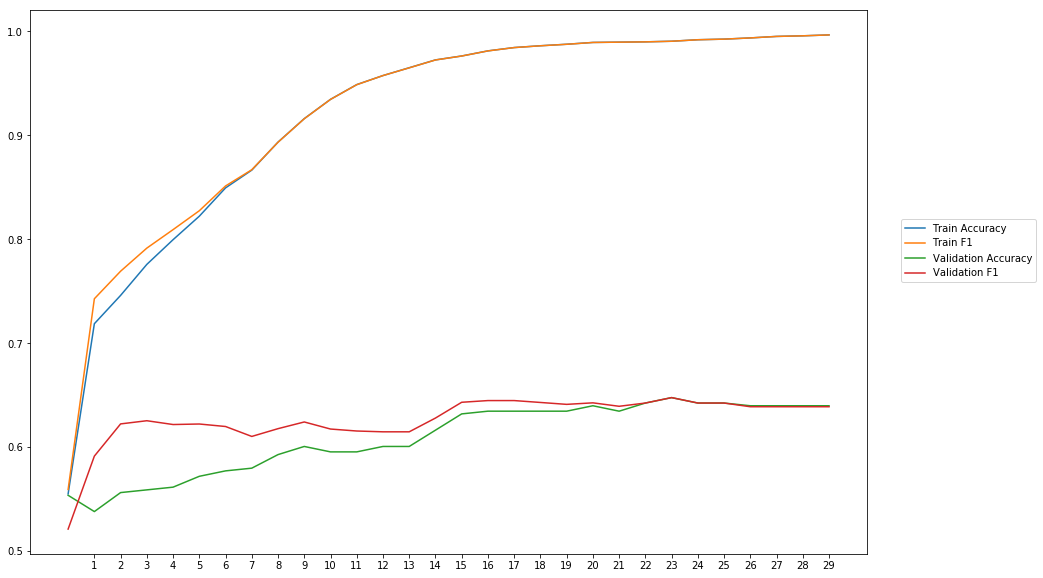

Average Accuracy: 60.91%
Average Precision: 60.16%
Average Recall: 65.69%
Average F1: 62.64%

-----Fold 8--------


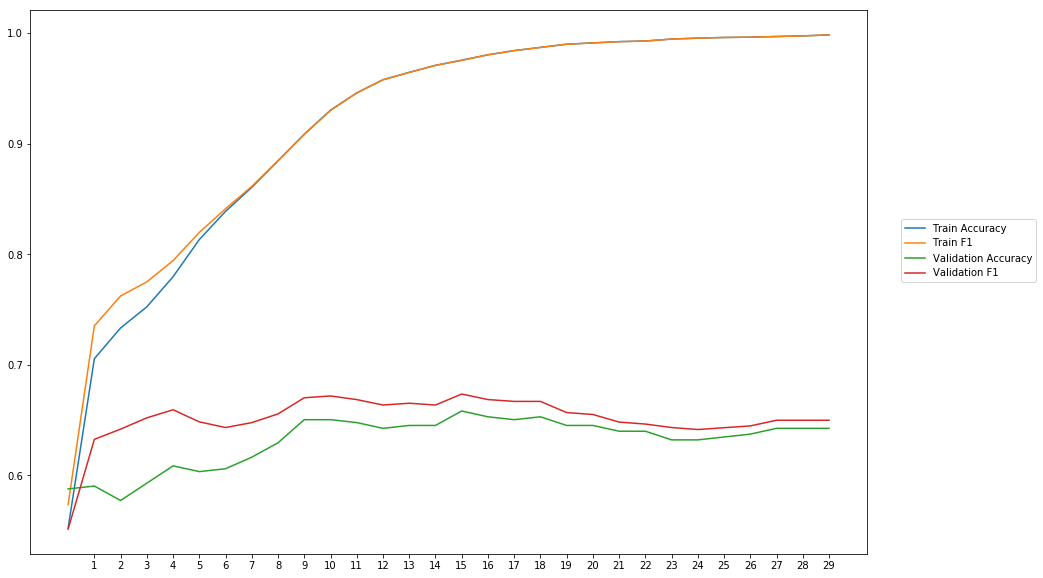

Average Accuracy: 63.12%
Average Precision: 61.77%
Average Recall: 69.13%
Average F1: 65.11%

-----Fold 9--------


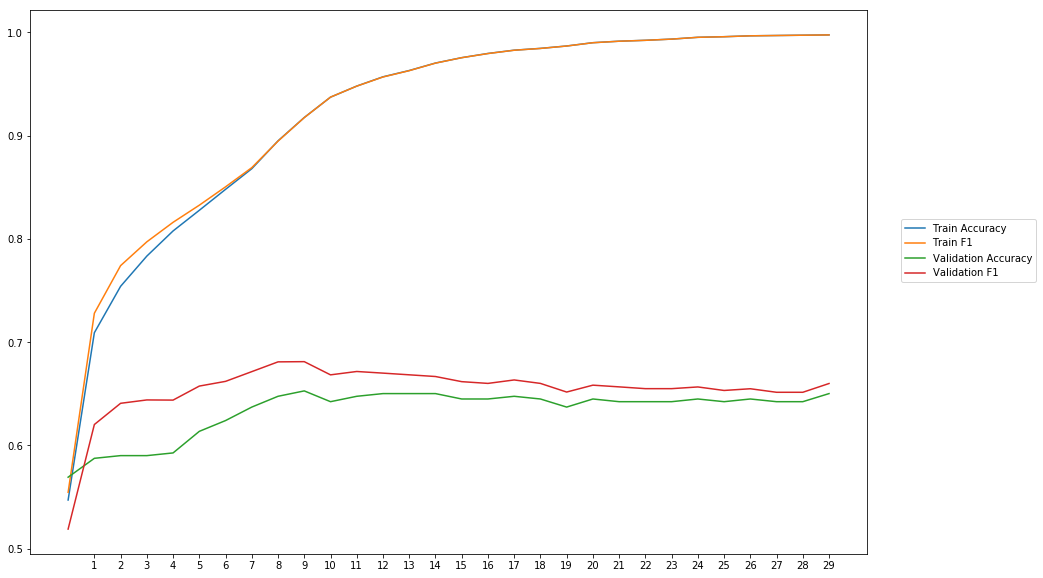

Average Accuracy: 63.34%
Average Precision: 61.85%
Average Recall: 69.62%
Average F1: 65.38%

-----Fold 10--------


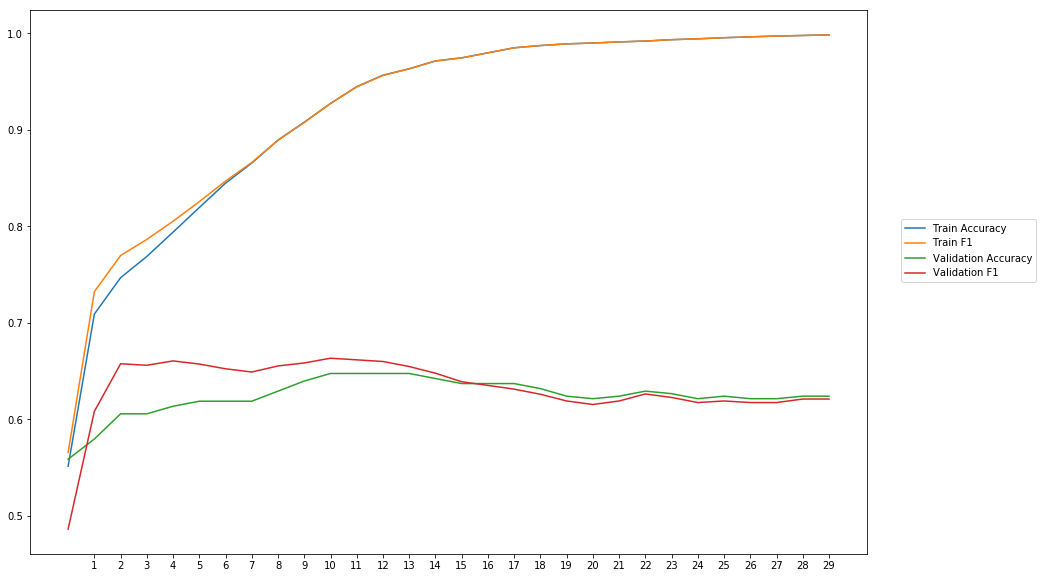

Average Accuracy: 62.42%
Average Precision: 61.75%
Average Recall: 65.27%
Average F1: 63.25%

-------Overallresults-------


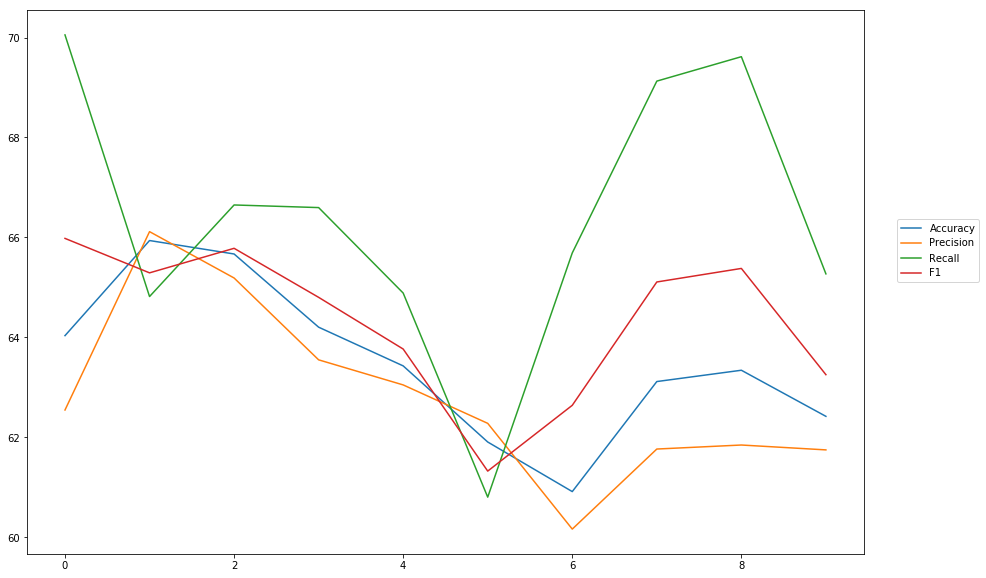

Accuracy: Mean = 63.50% (+/- 1.48%), Max = 65.94%, Min =  60.91%
Precision: Mean = 62.83% (+/- 1.66%), Max = 66.12%, Min =  60.16%
Recall: Mean = 66.35% (+/- 2.63%), Max = 70.05%, Min =  60.80%
F1: Mean = 64.33% (+/- 1.45%), Max = 65.98%, Min =  61.32%


In [63]:
cross_val(model_13, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'EmbeddingOnData_cbow_400_5')

## CBOW Dim 500, window 5

In [65]:
cbowmodel_500_5= Word2Vec(embeddingbasis, min_count = 1, size = 500, window = 5)

In [66]:
EMBEDDING_DIM=500

word_vectors_14 = cbowmodel_500_5.wv

embedding_matrix_14 = np.zeros((len(word_index)+1, EMBEDDING_DIM))

for word, i in word_index.items():
    try:
        embedding_vector = word_vectors_14[word]
        embedding_matrix_14[i] = embedding_vector   
    except:
        # words not found in embeddings will be zero
        pass

In [67]:
wv_layer_14 = Embedding(len(word_index)+1,
                 EMBEDDING_DIM,
                 weights=[embedding_matrix_14],
                 input_length=MAX_SEQUENCE_LENGTH,
                 trainable=True)
#Input Layer
comment_input_14 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='float32')

#Embedding Layer
embedded_sequences_14 = wv_layer_14(comment_input_14)

#First Dense Layer
x_14 = Dense(600, activation='relu')(embedded_sequences_14)

x_14 = Flatten()(x_14)

#Output (Dense) Layer
preds_14 = Dense(2, activation='softmax')(x_14)

# build the model
model_14 = Model(inputs=[comment_input_14], outputs=preds_14)


-----Fold 1--------


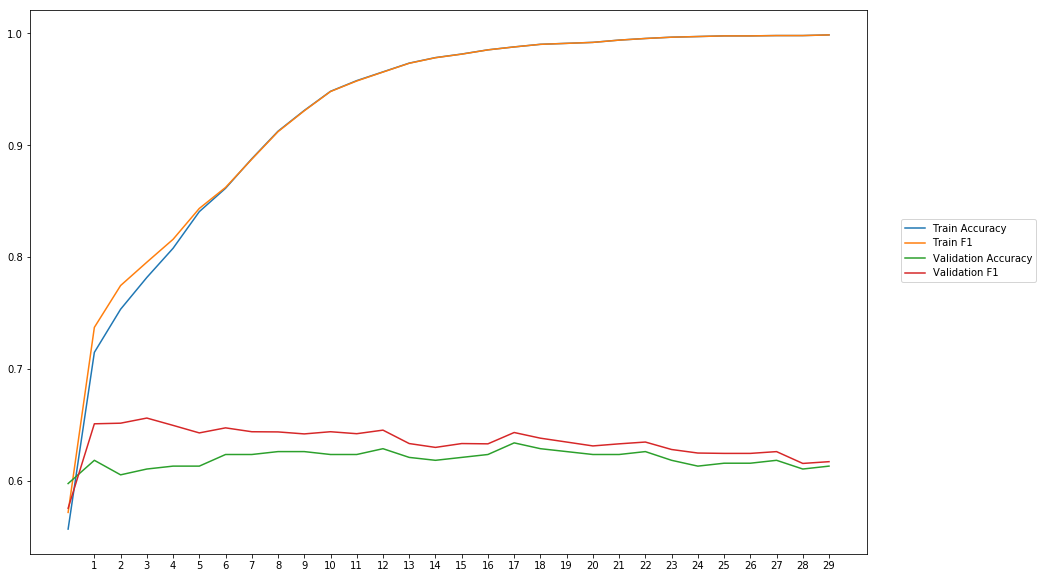

Average Accuracy: 61.93%
Average Precision: 60.89%
Average Recall: 66.39%
Average F1: 63.45%

-----Fold 2--------


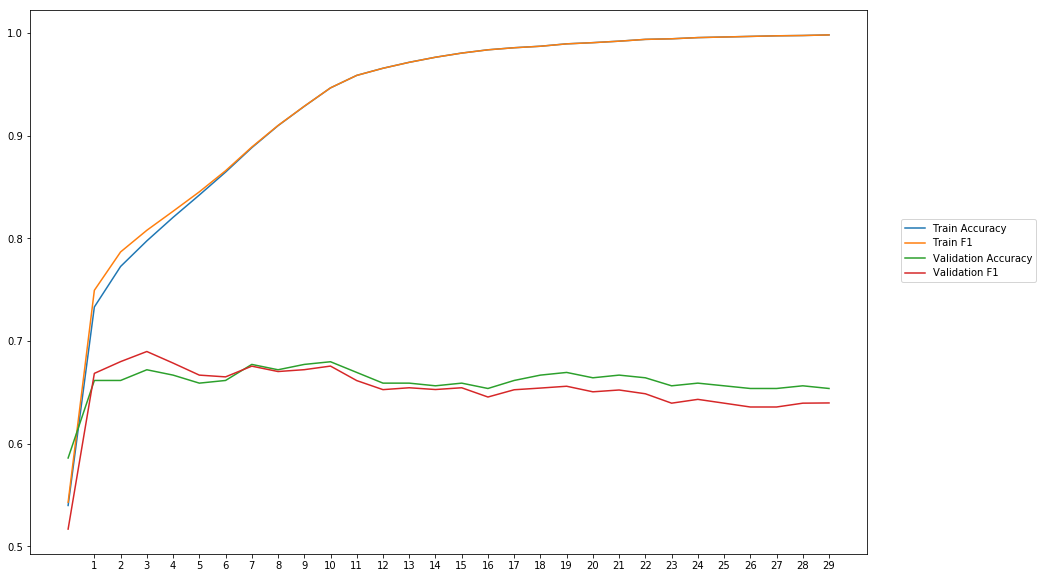

Average Accuracy: 66.03%
Average Precision: 66.38%
Average Recall: 64.28%
Average F1: 65.21%

-----Fold 3--------


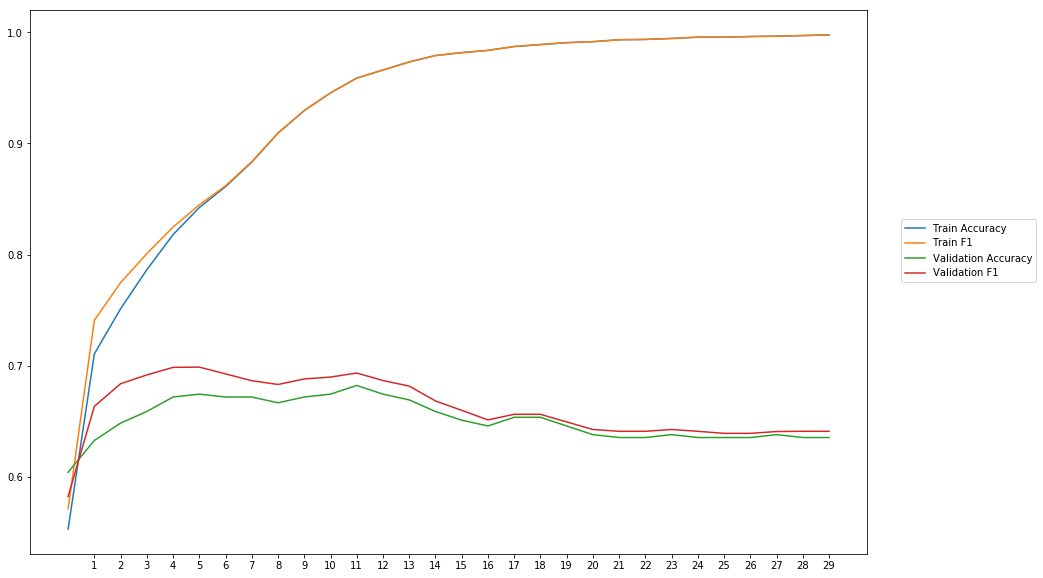

Average Accuracy: 65.15%
Average Precision: 63.84%
Average Recall: 68.97%
Average F1: 66.24%

-----Fold 4--------


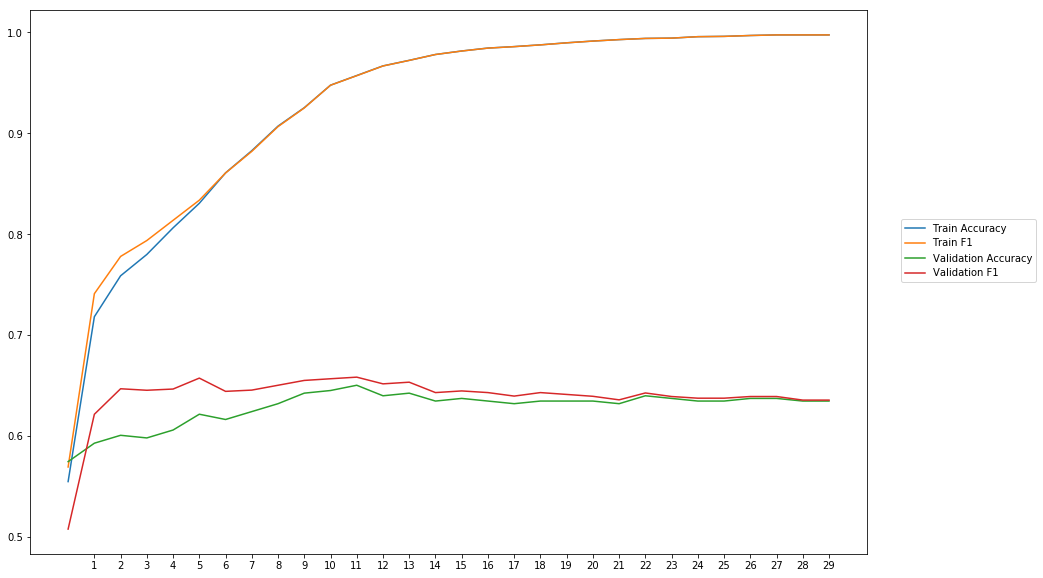

Average Accuracy: 62.82%
Average Precision: 61.99%
Average Recall: 66.23%
Average F1: 63.90%

-----Fold 5--------


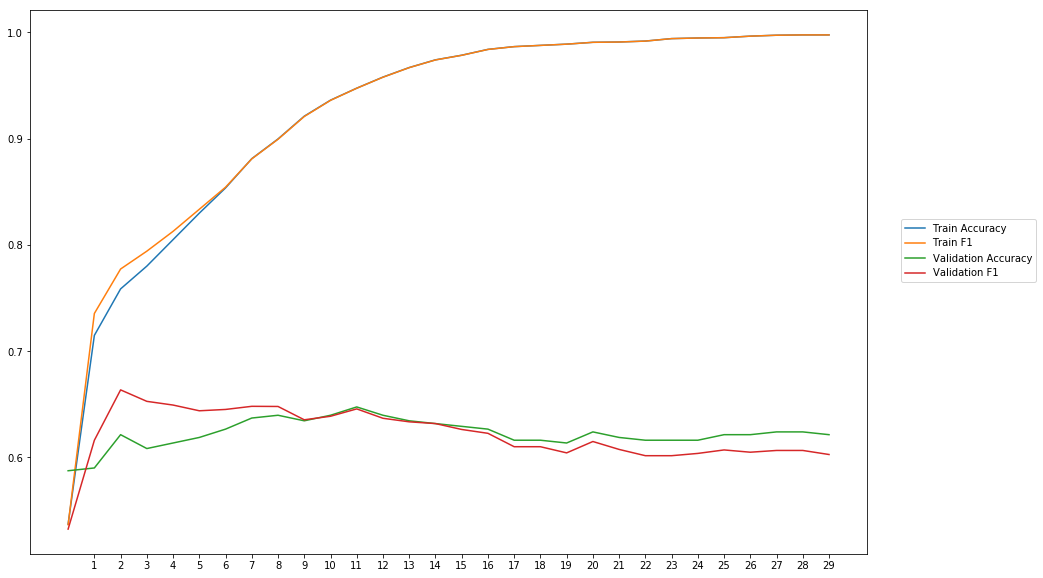

Average Accuracy: 62.25%
Average Precision: 62.19%
Average Recall: 62.50%
Average F1: 62.17%

-----Fold 6--------


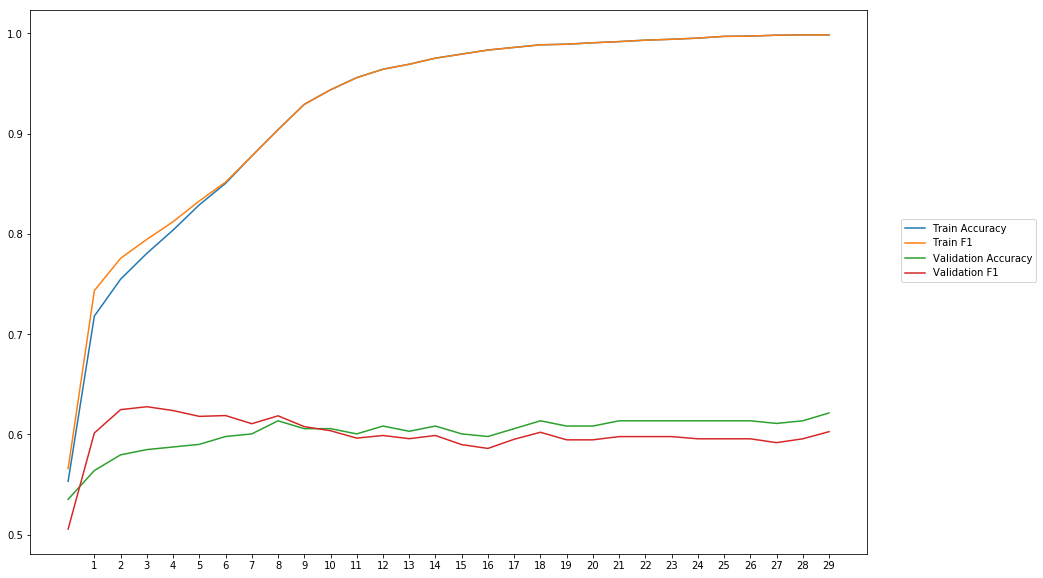

Average Accuracy: 60.16%
Average Precision: 60.24%
Average Recall: 59.95%
Average F1: 59.94%

-----Fold 7--------


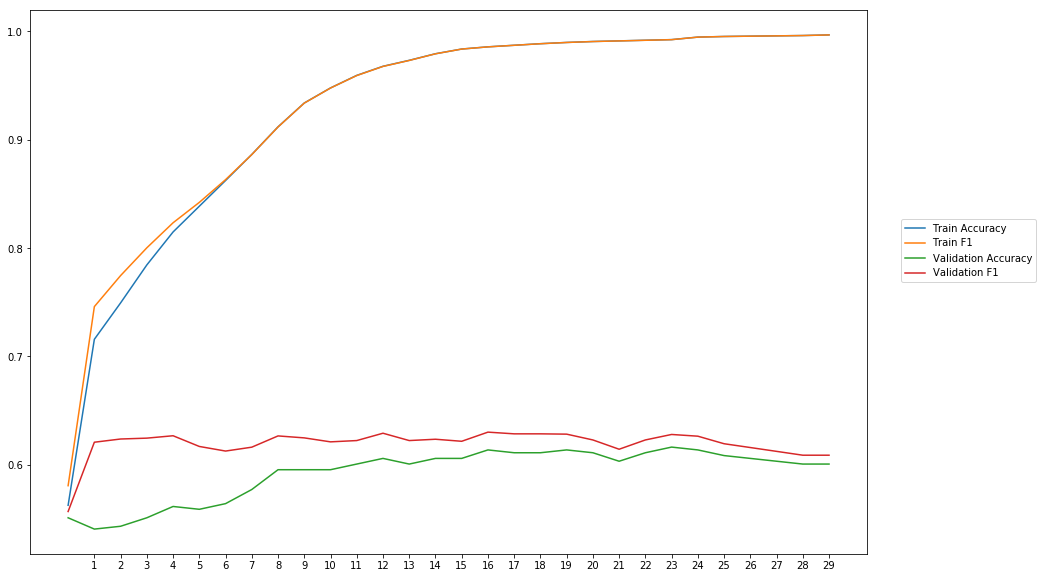

Average Accuracy: 59.24%
Average Precision: 58.19%
Average Recall: 66.54%
Average F1: 61.94%

-----Fold 8--------


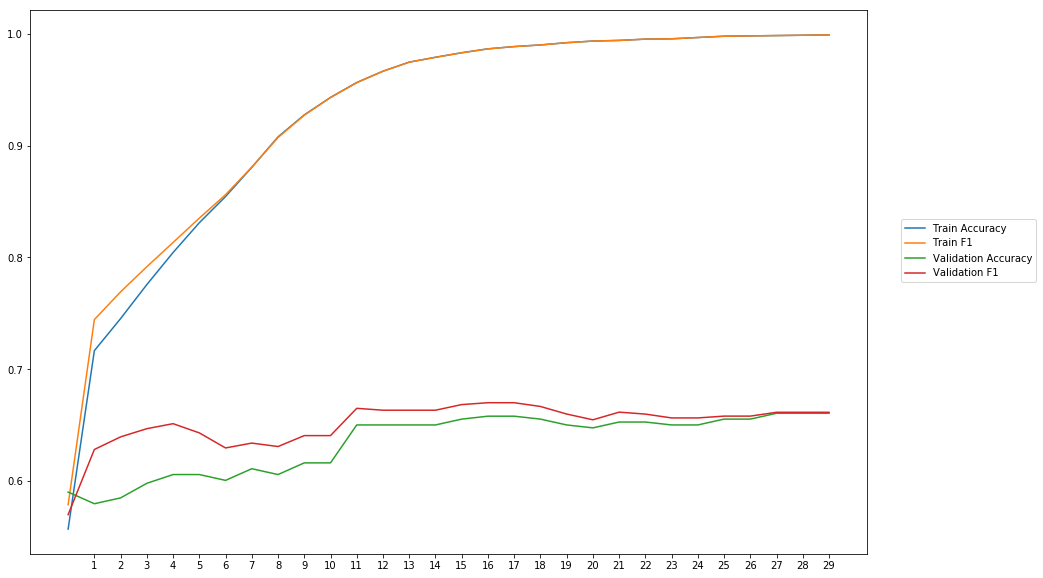

Average Accuracy: 63.46%
Average Precision: 62.35%
Average Recall: 68.36%
Average F1: 65.11%

-----Fold 9--------


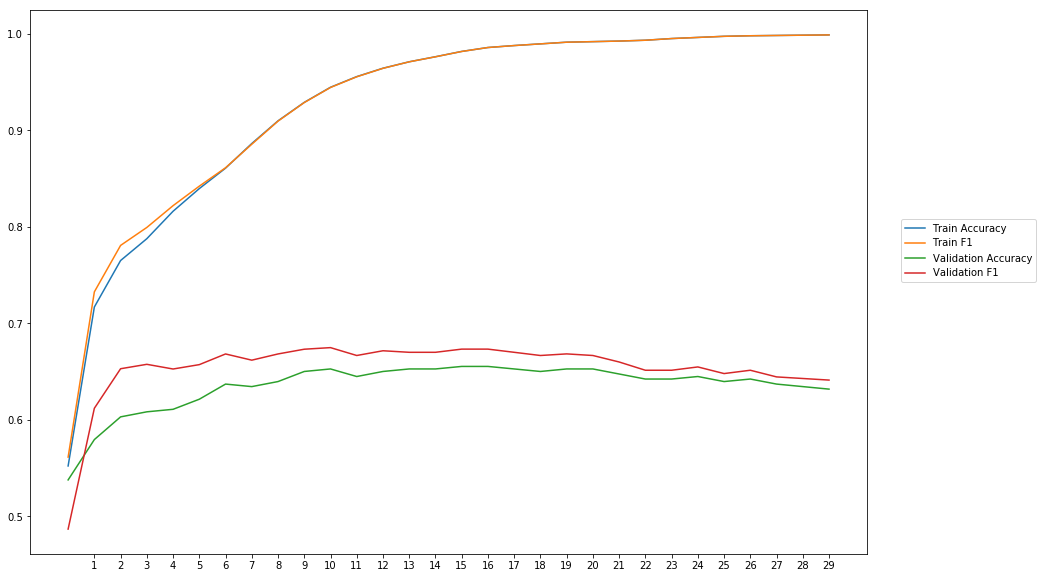

Average Accuracy: 63.52%
Average Precision: 62.05%
Average Recall: 69.27%
Average F1: 65.36%

-----Fold 10--------


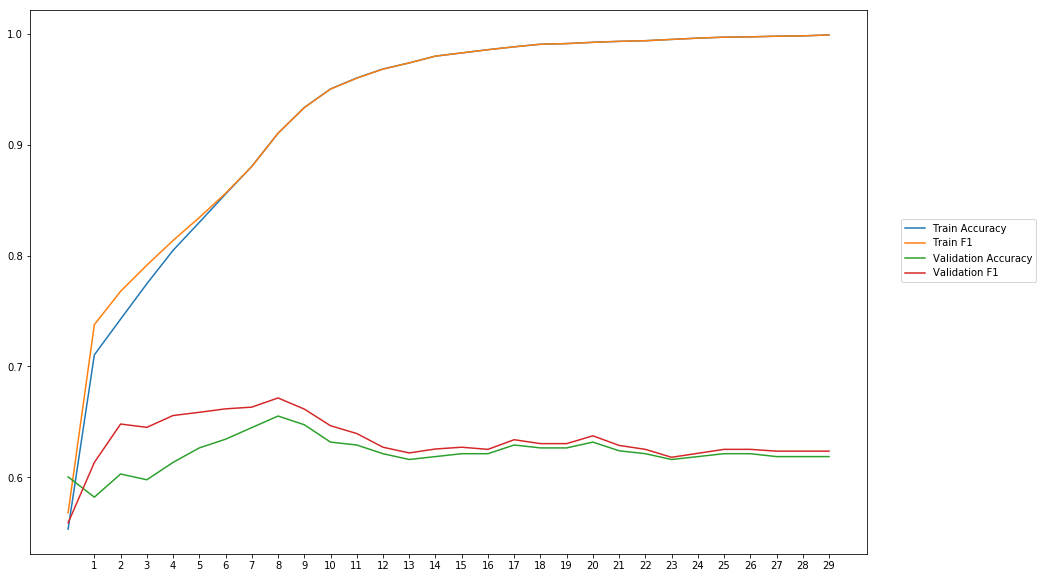

Average Accuracy: 62.20%
Average Precision: 61.38%
Average Recall: 65.65%
Average F1: 63.34%

-------Overallresults-------


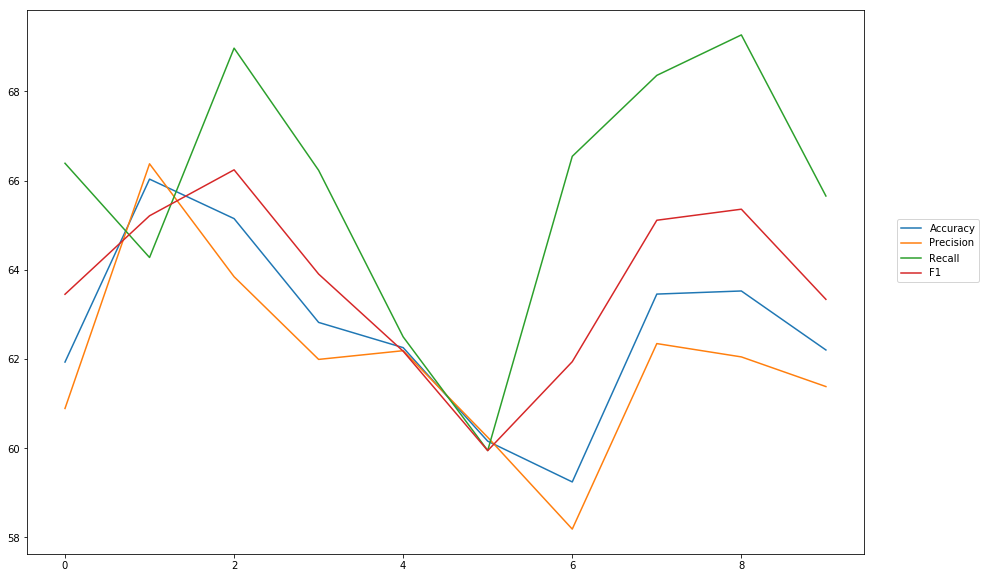

Accuracy: Mean = 62.68% (+/- 1.94%), Max = 66.03%, Min =  59.24%
Precision: Mean = 61.95% (+/- 2.05%), Max = 66.38%, Min =  58.19%
Recall: Mean = 65.81% (+/- 2.78%), Max = 69.27%, Min =  59.95%
F1: Mean = 63.67% (+/- 1.82%), Max = 66.24%, Min =  59.94%


In [68]:
cross_val(model_14, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, softmax, outputpath, 'EmbeddingOnData_cbow_500_5')

# Test the best model with heldout test data set

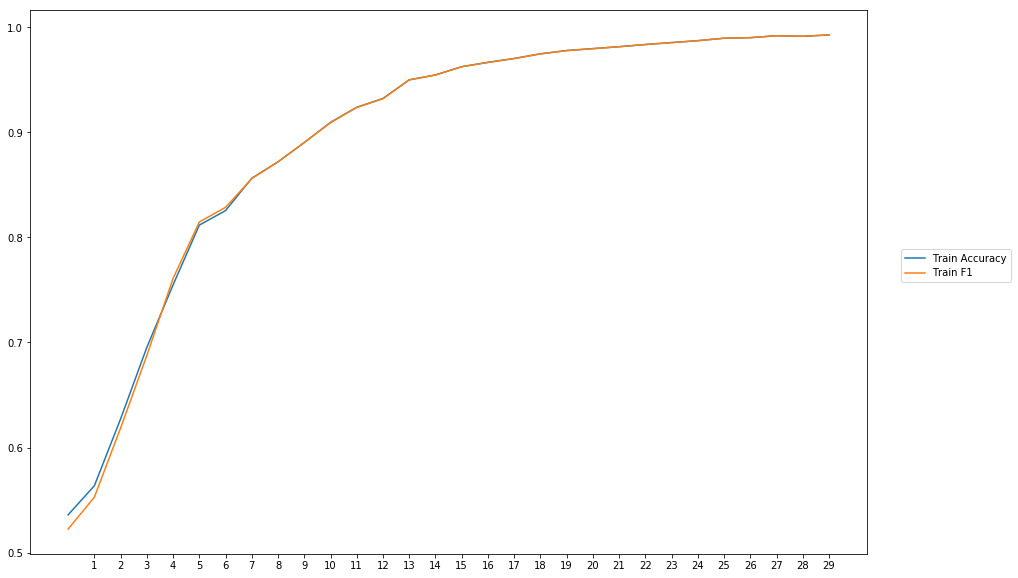


-----Test Scores----
Loss: 0.6564818742323895
Accuracy: 61.98979591836735
Precision: 51.7808219036217
Recall: 60.771704160523576
F1: 55.917154778675915


In [29]:
train_evaluate_final_model(model_13, NUM_EPOCHS, BATCH_SIZE, optimizer, lossfunction, train_data, train_labels, test_data, test_labels, softmax, outputpath, 'final_EmbeddingOnDataset_CBWO_400_5')